In [257]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [258]:
#Read in the csv file and convert to a Pandas dataframe
marathon_df_2022 = pd.read_csv("Data/race_results_2022.csv")
marathon_df_2023 = pd.read_csv("Data/race_results_2023.csv")
marathon_df_2024 = pd.read_csv("Data/race_results_2024.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [259]:
marathon_df_2022.head(3)

Race Type     Gender   Bib                                  Name  \
0  10KM RUN  #1_Female  6081  91fc9155-bcbf-4ea9-b2e3-e52f43b7d74b   
1  10KM RUN  #1_Female  5134  3f5d289c-52df-4d0a-a9f6-3748ca45772a   
2  10KM RUN  #1_Female  5685  db4ae93d-9e73-4cb2-a6dd-ea8369453190   

     Nationality Flag      Gun Time       Rank Gender Rank     Chip Time  \
0  [img:flags/SA.gif]  00:42:59.556  46 / 2293     1 / 762  00:42:57.505   
1  [img:flags/CZ.gif]  00:43:28.175  53 / 2293     2 / 762  00:43:24.774   
2  [img:flags/SA.gif]  00:44:00.251  55 / 2293     3 / 762  00:43:56.317   

  Speed (Km/Hr) Pace (min/km) Distance Covered  
0    13.9 Km/Hr   4:17 min/km            10 KM  
1    13.8 Km/Hr   4:20 min/km            10 KM  
2    13.6 Km/Hr   4:23 min/km            10 KM

In [260]:
marathon_df_2022.shape

(6419, 12)

In [261]:
marathon_df_2023.head(3)

Race Type     Gender  Bib                                  Name  \
0  Marathon Elite  #1_Female   26  0cefd5b0-94be-40ee-85c5-7b0868e17dcc   
1  Marathon Elite  #1_Female   27  f9a7159b-e872-4c4f-a898-afeb4c7653af   
2  Marathon Elite  #1_Female   30  60f511ac-0b98-490b-9a20-8a6bcc0d9204   

                                    Nationality Flag Nationality Code Rank  \
0  [img:https://timit.pro/events/graphics/flags/p...              ETH   1.   
1  [img:https://timit.pro/events/graphics/flags/p...              ETH   2.   
2  [img:https://timit.pro/events/graphics/flags/p...              ETH   3.   

  Gun Time Chip Time         Pace       Speed  
0  2:24:30   2:24:29  3:24 min/km  17.6 Km/Hr  
1  2:24:59   2:24:58  3:26 min/km  17.5 Km/Hr  
2  2:26:18   2:26:16  3:27 min/km  17.4 Km/Hr

In [262]:
marathon_df_2023['Nationality Flag'][0]

'[img:https://timit.pro/events/graphics/flags/png/et_black.png]'

In [263]:
marathon_df_2024.head(3)

Race Type  Gender  Bib                                  Name  \
0  MARATHON ELITE  Female   51  00ae6b0d-017d-4497-803f-92378d801c62   
1  MARATHON ELITE  Female   59  81b83bbc-7e22-4219-a351-5b1ed8b19609   
2  MARATHON ELITE  Female   64  8c70c7c1-f933-4f81-adbc-d02dc01348e6   

     Nationality Flag      Gun Time     Rank Gender Rank     Chip Time  \
0  [img:flags/ET.gif]  02:27:19.582  10 / 18       1 / 9  02:27:19.582   
1  [img:flags/ET.gif]  02:27:48.422  11 / 18       2 / 9  02:27:48.022   
2  [img:flags/ET.gif]  02:28:44.035  12 / 18       3 / 9  02:28:43.357   

  Speed (Km/Hr) Pace (min/km)  
0    17.1 Km/Hr   3:29 min/km  
1    17.1 Km/Hr   3:30 min/km  
2    17.0 Km/Hr   3:31 min/km

In [264]:
marathon_df_2022.shape, marathon_df_2023.shape, marathon_df_2024.shape

((6419, 12), (11371, 11), (15297, 11))

**Note:**
- Your gun/clock time is the time on the official race clock from the moment the race started (when the gun went off) to when you crossed over the finish line.
- Your net/chip time is the time from when you personally cross the starting line to when you cross the finish.

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [265]:
marathon_df_2022.columns 

Index(['Race Type', 'Gender', 'Bib', 'Name', 'Nationality Flag', 'Gun Time',
       'Rank', 'Gender Rank', 'Chip Time', 'Speed (Km/Hr)', 'Pace (min/km)',
       'Distance Covered'],
      dtype='object')

In [266]:
marathon_df_2023.columns 

Index(['Race Type', 'Gender', 'Bib', 'Name', 'Nationality Flag',
       'Nationality Code', 'Rank', 'Gun Time', 'Chip Time', 'Pace', 'Speed'],
      dtype='object')

In [267]:
marathon_df_2024.columns 

Index(['Race Type', 'Gender', 'Bib', 'Name', 'Nationality Flag', 'Gun Time',
       'Rank', 'Gender Rank', 'Chip Time', 'Speed (Km/Hr)', 'Pace (min/km)'],
      dtype='object')

In [268]:
marathon_df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6419 entries, 0 to 6418
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Race Type         6419 non-null   object
 1   Gender            6419 non-null   object
 2   Bib               6419 non-null   int64 
 3   Name              6419 non-null   object
 4   Nationality Flag  6108 non-null   object
 5   Gun Time          6419 non-null   object
 6   Rank              6419 non-null   object
 7   Gender Rank       6419 non-null   object
 8   Chip Time         6249 non-null   object
 9   Speed (Km/Hr)     6249 non-null   object
 10  Pace (min/km)     6249 non-null   object
 11  Distance Covered  6419 non-null   object
dtypes: int64(1), object(11)
memory usage: 601.9+ KB


In [269]:
marathon_df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11371 entries, 0 to 11370
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Race Type         11371 non-null  object
 1   Gender            11371 non-null  object
 2   Bib               11371 non-null  int64 
 3   Name              11371 non-null  object
 4   Nationality Flag  11320 non-null  object
 5   Nationality Code  11320 non-null  object
 6   Rank              11371 non-null  object
 7   Gun Time          11371 non-null  object
 8   Chip Time         11188 non-null  object
 9   Pace              11371 non-null  object
 10  Speed             11371 non-null  object
dtypes: int64(1), object(10)
memory usage: 977.3+ KB


In [270]:
marathon_df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15297 entries, 0 to 15296
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Race Type         15297 non-null  object
 1   Gender            15297 non-null  object
 2   Bib               15297 non-null  int64 
 3   Name              15297 non-null  object
 4   Nationality Flag  14657 non-null  object
 5   Gun Time          14859 non-null  object
 6   Rank              15297 non-null  object
 7   Gender Rank       15297 non-null  object
 8   Chip Time         14859 non-null  object
 9   Speed (Km/Hr)     14859 non-null  object
 10  Pace (min/km)     14859 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.3+ MB


In [271]:
marathon_df_2022.describe(include='number')

Bib
count   6419.000000
mean    7398.201589
std     4002.726108
min        1.000000
25%     3664.500000
50%     7308.000000
75%    11142.500000
max    14400.000000

In [272]:
marathon_df_2022.describe(include='object')

Race Type   Gender                                  Name  \
count       6419     6419                                  6419   
unique         6       12                                  6419   
top     10KM RUN  #2_Male  91fc9155-bcbf-4ea9-b2e3-e52f43b7d74b   
freq        2381     1585                                     1   

          Nationality Flag             Gun Time  Rank Gender Rank  \
count                 6108                 6419  6419        6419   
unique                  85                 6238  6052        6049   
top     [img:flags/SA.gif]  [22526.31|hh:mm:ss]     -           -   
freq                  3453                  103   368         368   

           Chip Time Speed (Km/Hr) Pace (min/km) Distance Covered  
count           6249          6249          6249             6419  
unique          6245           182           814               12  
top     00:48:27.714     6.1 Km/Hr   6:52 min/km            10 KM  
freq               2           121            29             2368

In [273]:
marathon_df_2023.describe(include='object')

Race Type    Gender                                  Name  \
count      11371     11371                                 11371   
unique         6        12                                 11371   
top         4 km  #10_Male  0cefd5b0-94be-40ee-85c5-7b0868e17dcc   
freq        4498      3075                                     1   

                                         Nationality Flag Nationality Code  \
count                                               11320            11320   
unique                                                103              103   
top     [img:https://timit.pro/events/graphics/flags/p...              KSA   
freq                                                 6693             6693   

         Rank Gun Time Chip Time          Pace      Speed  
count   11371    11371     11188         11371      11371  
unique   3072     6416      6326           844        170  
top         -      DNF     56:41  10:58 min/km  5.4 Km/Hr  
freq      248      178        12            40        262

In [274]:
marathon_df_2024.describe(include='object')

Race Type Gender                                  Name  \
count         15297  15297                                 15297   
unique            6      2                                 15297   
top     4KM FUN RUN   Male  00ae6b0d-017d-4497-803f-92378d801c62   
freq           6155   9686                                     1   

          Nationality Flag      Gun Time   Rank Gender Rank     Chip Time  \
count                14657         14859  15297       15297         14859   
unique                 108         14793  14862       14853         14843   
top     [img:flags/SA.gif]  05:21:51.903    DNF         DNF  05:21:51.903   
freq                  8927             3    406         406             3   

       Speed (Km/Hr) Pace (min/km)  
count          14859         14859  
unique           179          1264  
top        4.6 Km/Hr   7:30 min/km  
freq             268            44

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

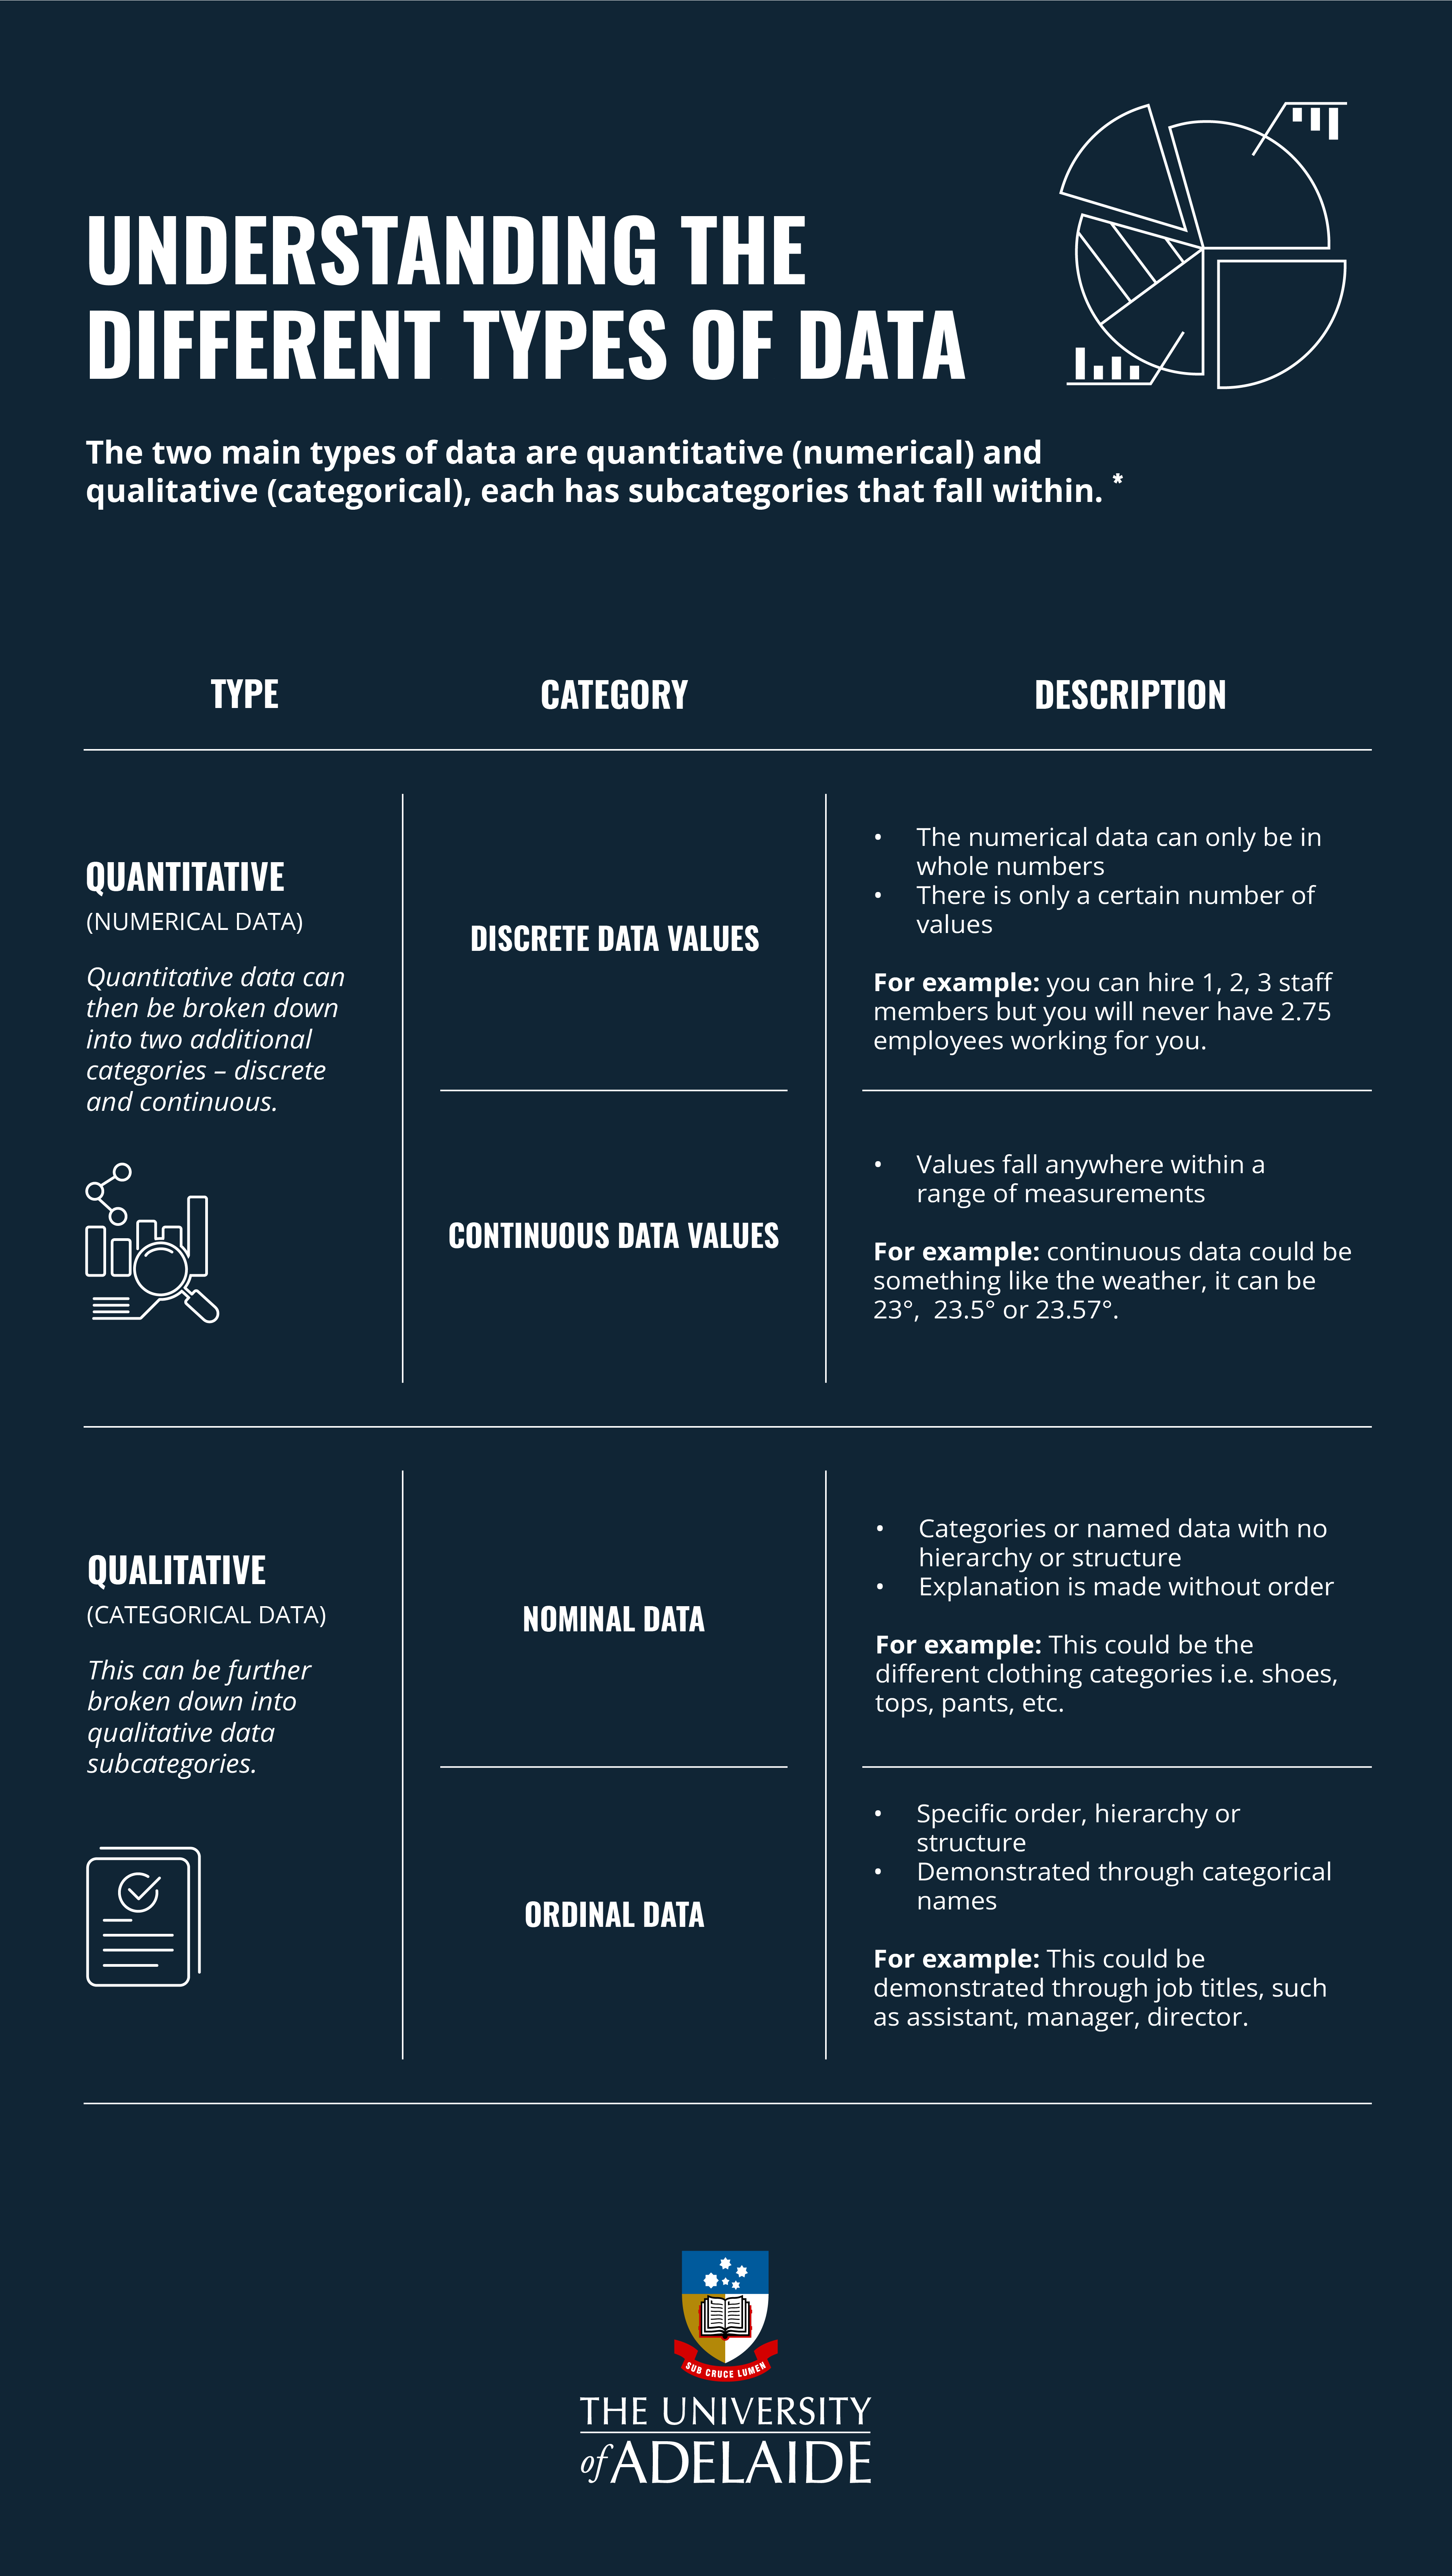

In [275]:
marathon_df_2022.head()

Race Type     Gender   Bib                                  Name  \
0  10KM RUN  #1_Female  6081  91fc9155-bcbf-4ea9-b2e3-e52f43b7d74b   
1  10KM RUN  #1_Female  5134  3f5d289c-52df-4d0a-a9f6-3748ca45772a   
2  10KM RUN  #1_Female  5685  db4ae93d-9e73-4cb2-a6dd-ea8369453190   
3  10KM RUN  #1_Female  5189  17d62c5c-6984-48b7-bf48-583f534587b1   
4  10KM RUN  #1_Female  8521  4ccefa8a-a501-40e9-8252-ad70f3409ca9   

     Nationality Flag      Gun Time       Rank Gender Rank     Chip Time  \
0  [img:flags/SA.gif]  00:42:59.556  46 / 2293     1 / 762  00:42:57.505   
1  [img:flags/CZ.gif]  00:43:28.175  53 / 2293     2 / 762  00:43:24.774   
2  [img:flags/SA.gif]  00:44:00.251  55 / 2293     3 / 762  00:43:56.317   
3  [img:flags/MA.gif]  00:48:28.115  88 / 2293     4 / 762  00:48:22.908   
4  [img:flags/SA.gif]  00:58:37.753  93 / 2293     5 / 762  00:48:27.714   

  Speed (Km/Hr) Pace (min/km) Distance Covered  
0    13.9 Km/Hr   4:17 min/km            10 KM  
1    13.8 Km/Hr   4:20 min/km            10 KM  
2    13.6 Km/Hr   4:23 min/km            10 KM  
3    12.4 Km/Hr   4:50 min/km            10 KM  
4    12.3 Km/Hr   4:50 min/km            10 KM

In [276]:
marathon_df_2023.head()

Race Type     Gender  Bib                                  Name  \
0  Marathon Elite  #1_Female   26  0cefd5b0-94be-40ee-85c5-7b0868e17dcc   
1  Marathon Elite  #1_Female   27  f9a7159b-e872-4c4f-a898-afeb4c7653af   
2  Marathon Elite  #1_Female   30  60f511ac-0b98-490b-9a20-8a6bcc0d9204   
3  Marathon Elite  #1_Female   34  945a6295-0499-493d-942f-c1585fb859f4   
4  Marathon Elite  #1_Female   23  2de1382f-605d-40f3-a548-d540751a4110   

                                    Nationality Flag Nationality Code Rank  \
0  [img:https://timit.pro/events/graphics/flags/p...              ETH   1.   
1  [img:https://timit.pro/events/graphics/flags/p...              ETH   2.   
2  [img:https://timit.pro/events/graphics/flags/p...              ETH   3.   
3  [img:https://timit.pro/events/graphics/flags/p...              ETH   4.   
4  [img:https://timit.pro/events/graphics/flags/p...              ETH   5.   

  Gun Time Chip Time         Pace       Speed  
0  2:24:30   2:24:29  3:24 min/km  17.6 Km/Hr  
1  2:24:59   2:24:58  3:26 min/km  17.5 Km/Hr  
2  2:26:18   2:26:16  3:27 min/km  17.4 Km/Hr  
3  2:27:41   2:27:41  3:30 min/km  17.1 Km/Hr  
4  2:27:50   2:27:49  3:30 min/km  17.1 Km/Hr

In [277]:
marathon_df_2024.head()

Race Type  Gender  Bib                                  Name  \
0  MARATHON ELITE  Female   51  00ae6b0d-017d-4497-803f-92378d801c62   
1  MARATHON ELITE  Female   59  81b83bbc-7e22-4219-a351-5b1ed8b19609   
2  MARATHON ELITE  Female   64  8c70c7c1-f933-4f81-adbc-d02dc01348e6   
3  MARATHON ELITE  Female   60  d87ca0a9-7657-43d1-8389-e57e8b975952   
4  MARATHON ELITE  Female   63  be2d9a79-b21f-4404-a4c1-f81df15ef70b   

     Nationality Flag      Gun Time     Rank Gender Rank     Chip Time  \
0  [img:flags/ET.gif]  02:27:19.582  10 / 18       1 / 9  02:27:19.582   
1  [img:flags/ET.gif]  02:27:48.422  11 / 18       2 / 9  02:27:48.022   
2  [img:flags/ET.gif]  02:28:44.035  12 / 18       3 / 9  02:28:43.357   
3  [img:flags/ET.gif]  02:29:21.107  13 / 18       4 / 9  02:29:20.048   
4  [img:flags/KE.gif]  02:29:52.317  14 / 18       5 / 9  02:29:51.716   

  Speed (Km/Hr) Pace (min/km)  
0    17.1 Km/Hr   3:29 min/km  
1    17.1 Km/Hr   3:30 min/km  
2    17.0 Km/Hr   3:31 min/km  
3    16.9 Km/Hr   3:32 min/km  
4    16.8 Km/Hr   3:33 min/km

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [278]:
# in the kaggle page mentioned data source

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [279]:
# data is exist for the last marathon and 2 years before

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [280]:
# check the values that should be the same in all years

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [281]:
marathon_df_2022.head(2)

Race Type     Gender   Bib                                  Name  \
0  10KM RUN  #1_Female  6081  91fc9155-bcbf-4ea9-b2e3-e52f43b7d74b   
1  10KM RUN  #1_Female  5134  3f5d289c-52df-4d0a-a9f6-3748ca45772a   

     Nationality Flag      Gun Time       Rank Gender Rank     Chip Time  \
0  [img:flags/SA.gif]  00:42:59.556  46 / 2293     1 / 762  00:42:57.505   
1  [img:flags/CZ.gif]  00:43:28.175  53 / 2293     2 / 762  00:43:24.774   

  Speed (Km/Hr) Pace (min/km) Distance Covered  
0    13.9 Km/Hr   4:17 min/km            10 KM  
1    13.8 Km/Hr   4:20 min/km            10 KM

In [282]:
marathon_df_2023.head(2)

Race Type     Gender  Bib                                  Name  \
0  Marathon Elite  #1_Female   26  0cefd5b0-94be-40ee-85c5-7b0868e17dcc   
1  Marathon Elite  #1_Female   27  f9a7159b-e872-4c4f-a898-afeb4c7653af   

                                    Nationality Flag Nationality Code Rank  \
0  [img:https://timit.pro/events/graphics/flags/p...              ETH   1.   
1  [img:https://timit.pro/events/graphics/flags/p...              ETH   2.   

  Gun Time Chip Time         Pace       Speed  
0  2:24:30   2:24:29  3:24 min/km  17.6 Km/Hr  
1  2:24:59   2:24:58  3:26 min/km  17.5 Km/Hr

In [283]:
marathon_df_2024.head(2)

Race Type  Gender  Bib                                  Name  \
0  MARATHON ELITE  Female   51  00ae6b0d-017d-4497-803f-92378d801c62   
1  MARATHON ELITE  Female   59  81b83bbc-7e22-4219-a351-5b1ed8b19609   

     Nationality Flag      Gun Time     Rank Gender Rank     Chip Time  \
0  [img:flags/ET.gif]  02:27:19.582  10 / 18       1 / 9  02:27:19.582   
1  [img:flags/ET.gif]  02:27:48.422  11 / 18       2 / 9  02:27:48.022   

  Speed (Km/Hr) Pace (min/km)  
0    17.1 Km/Hr   3:29 min/km  
1    17.1 Km/Hr   3:30 min/km

In [284]:
marathon_df_2022[marathon_df_2022.duplicated(['Bib'])]

Empty DataFrame
Columns: [Race Type, Gender, Bib, Name, Nationality Flag, Gun Time, Rank, Gender Rank, Chip Time, Speed (Km/Hr), Pace (min/km), Distance Covered]
Index: []

In [285]:
marathon_df_2022[marathon_df_2022.duplicated(['Name'])]

Empty DataFrame
Columns: [Race Type, Gender, Bib, Name, Nationality Flag, Gun Time, Rank, Gender Rank, Chip Time, Speed (Km/Hr), Pace (min/km), Distance Covered]
Index: []

In [286]:
#Delete unrelevent columns
# marathon_df_2022.drop(["Name"],axis=1,inplace=True)

In [287]:
marathon_df_2022.shape, marathon_df_2023.shape, marathon_df_2024.shape, 

((6419, 12), (11371, 11), (15297, 11))

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [288]:
marathon_df_2022.head()

Race Type     Gender   Bib                                  Name  \
0  10KM RUN  #1_Female  6081  91fc9155-bcbf-4ea9-b2e3-e52f43b7d74b   
1  10KM RUN  #1_Female  5134  3f5d289c-52df-4d0a-a9f6-3748ca45772a   
2  10KM RUN  #1_Female  5685  db4ae93d-9e73-4cb2-a6dd-ea8369453190   
3  10KM RUN  #1_Female  5189  17d62c5c-6984-48b7-bf48-583f534587b1   
4  10KM RUN  #1_Female  8521  4ccefa8a-a501-40e9-8252-ad70f3409ca9   

     Nationality Flag      Gun Time       Rank Gender Rank     Chip Time  \
0  [img:flags/SA.gif]  00:42:59.556  46 / 2293     1 / 762  00:42:57.505   
1  [img:flags/CZ.gif]  00:43:28.175  53 / 2293     2 / 762  00:43:24.774   
2  [img:flags/SA.gif]  00:44:00.251  55 / 2293     3 / 762  00:43:56.317   
3  [img:flags/MA.gif]  00:48:28.115  88 / 2293     4 / 762  00:48:22.908   
4  [img:flags/SA.gif]  00:58:37.753  93 / 2293     5 / 762  00:48:27.714   

  Speed (Km/Hr) Pace (min/km) Distance Covered  
0    13.9 Km/Hr   4:17 min/km            10 KM  
1    13.8 Km/Hr   4:20 min/km            10 KM  
2    13.6 Km/Hr   4:23 min/km            10 KM  
3    12.4 Km/Hr   4:50 min/km            10 KM  
4    12.3 Km/Hr   4:50 min/km            10 KM

In [289]:
marathon_df_2022.duplicated().sum() # -> duplicated rows

0

In [290]:
marathon_df_2022.duplicated(['Bib']).sum()

0

In [291]:
marathon_df_2022.duplicated(['Rank']).sum()

367

In [292]:
marathon_df_2022.duplicated(['Race Type', 'Rank']).sum()

363

In [293]:
marathon_df_2022[(marathon_df_2022.duplicated(['Rank']))]

Race Type      Gender   Bib                                  Name  \
763         10KM RUN   #1_Female  6339  faed6e75-a6f9-4891-9f2b-b2bc82740feb   
764         10KM RUN   #1_Female  7081  dd25aabf-de40-48d3-a394-22b26643a3b9   
765         10KM RUN   #1_Female  7306  054200f8-1979-4d34-9b39-90b20c3df369   
766         10KM RUN   #1_Female  7307  5f033aec-f0ad-48ff-96cf-cab58e68a9e0   
767         10KM RUN   #1_Female  7474  0e4bef8f-82fb-49ac-a264-3673b85c3207   
...              ...         ...   ...                                   ...   
6396        MARATHON    #10_Male   440  8be8613b-65d9-4e06-b1e8-dc1059c4eeb1   
6405  MARATHON ELITE  #11_Female    26  9bc81380-30a9-470f-b1b3-7a1db1972160   
6416  MARATHON ELITE    #12_Male    15  e57d0fbd-feca-4dd0-8f6e-efb7094f8d5b   
6417  MARATHON ELITE    #12_Male    14  60e71a51-7473-4614-9253-a24f5b2e4661   
6418  MARATHON ELITE    #12_Male     8  41c4a3af-492f-4399-b415-5b2da83dab58   

        Nationality Flag              Gun Time Rank Gender Rank Chip Time  \
763   [img:flags/SA.gif]  [32384.739|hh:mm:ss]    -           -       NaN   
764   [img:flags/LB.gif]  [32384.739|hh:mm:ss]    -           -       NaN   
765   [img:flags/CA.gif]  [32384.739|hh:mm:ss]    -           -       NaN   
766                  NaN  [32384.739|hh:mm:ss]    -           -       NaN   
767   [img:flags/YE.gif]  [32384.739|hh:mm:ss]    -           -       NaN   
...                  ...                   ...  ...         ...       ...   
6396  [img:flags/SA.gif]   [22526.31|hh:mm:ss]    -           -       NaN   
6405  [img:flags/ET.gif]   [22526.31|hh:mm:ss]    -           -       NaN   
6416  [img:flags/KE.gif]   [22526.31|hh:mm:ss]    -           -       NaN   
6417  [img:flags/KE.gif]   [22526.31|hh:mm:ss]    -           -       NaN   
6418  [img:flags/KE.gif]   [22526.31|hh:mm:ss]    -           -       NaN   

     Speed (Km/Hr) Pace (min/km) Distance Covered  
763            NaN           NaN             0 KM  
764            NaN           NaN             0 KM  
765            NaN           NaN             0 KM  
766            NaN           NaN             0 KM  
767            NaN           NaN             0 KM  
...            ...           ...              ...  
6396           NaN           NaN            25 KM  
6405           NaN           NaN             0 KM  
6416           NaN           NaN            40 KM  
6417           NaN           NaN            35 KM  
6418           NaN           NaN            30 KM  

[367 rows x 12 columns]

In [294]:
marathon_df_2022[marathon_df_2022.duplicated(['Rank'])].describe(include='object')

Race Type    Gender                                  Name  \
count        367       367                                   367   
unique         5        10                                   367   
top     MARATHON  #10_Male  faed6e75-a6f9-4891-9f2b-b2bc82740feb   
freq         183       155                                     1   

          Nationality Flag             Gun Time Rank Gender Rank  \
count                  344                  367  367         367   
unique                  33                  201    1           1   
top     [img:flags/SA.gif]  [22526.31|hh:mm:ss]    -           -   
freq                   224                  103  367         367   

           Chip Time Speed (Km/Hr) Pace (min/km) Distance Covered  
count            198           198           198              367  
unique           198            97           157               12  
top     00:42:05.165     4.4 Km/Hr   3:03 min/km          42.2 KM  
freq               1            11             4              102

In [295]:
df_1 = marathon_df_2022[marathon_df_2022.duplicated(['Rank'])]
df_1['Rank'].value_counts()

Rank
-    367
Name: count, dtype: int64

In [296]:
marathon_df_2022[marathon_df_2022.duplicated(['Rank'])]['Rank'].value_counts()

Rank
-    367
Name: count, dtype: int64

In [297]:
# people who does not attend  (showup)
marathon_df_2022[(marathon_df_2022.duplicated(['Rank'])) & \
(marathon_df_2022['Chip Time'].isnull()) &\
(marathon_df_2022['Distance Covered'] == '0 KM')].head()

Race Type     Gender   Bib                                  Name  \
763  10KM RUN  #1_Female  6339  faed6e75-a6f9-4891-9f2b-b2bc82740feb   
764  10KM RUN  #1_Female  7081  dd25aabf-de40-48d3-a394-22b26643a3b9   
765  10KM RUN  #1_Female  7306  054200f8-1979-4d34-9b39-90b20c3df369   
766  10KM RUN  #1_Female  7307  5f033aec-f0ad-48ff-96cf-cab58e68a9e0   
767  10KM RUN  #1_Female  7474  0e4bef8f-82fb-49ac-a264-3673b85c3207   

       Nationality Flag              Gun Time Rank Gender Rank Chip Time  \
763  [img:flags/SA.gif]  [32384.739|hh:mm:ss]    -           -       NaN   
764  [img:flags/LB.gif]  [32384.739|hh:mm:ss]    -           -       NaN   
765  [img:flags/CA.gif]  [32384.739|hh:mm:ss]    -           -       NaN   
766                 NaN  [32384.739|hh:mm:ss]    -           -       NaN   
767  [img:flags/YE.gif]  [32384.739|hh:mm:ss]    -           -       NaN   

    Speed (Km/Hr) Pace (min/km) Distance Covered  
763           NaN           NaN             0 KM  
764           NaN           NaN             0 KM  
765           NaN           NaN             0 KM  
766           NaN           NaN             0 KM  
767           NaN           NaN             0 KM

In [298]:
# people who attend and does not finish
marathon_df_2022[(marathon_df_2022.duplicated(['Rank'])) &
(marathon_df_2022['Chip Time'].isnull()) &
(marathon_df_2022['Distance Covered'] != '0 KM')].head()

Race Type   Gender   Bib                                  Name  \
2327  10KM RUN  #2_Male  5398  b8e6755c-273f-41f4-8f95-8222aac44385   
2328  10KM RUN  #2_Male  7751  a91eef63-fabb-42c8-af09-069fd88ad34e   
2329  10KM RUN  #2_Male  8111  d959fd9a-c2ea-475e-97c4-bb576a01af61   
2330  10KM RUN  #2_Male  7438  50a87bf4-8fb2-491f-8f97-dc7058da5005   
2331  10KM RUN  #2_Male  7205  c551b143-c01c-4a1d-b0e8-13337ba196ce   

        Nationality Flag              Gun Time Rank Gender Rank Chip Time  \
2327  [img:flags/SA.gif]  [32384.739|hh:mm:ss]    -           -       NaN   
2328  [img:flags/PK.gif]  [32384.739|hh:mm:ss]    -           -       NaN   
2329  [img:flags/PK.gif]  [32384.739|hh:mm:ss]    -           -       NaN   
2330  [img:flags/SA.gif]  [32384.739|hh:mm:ss]    -           -       NaN   
2331  [img:flags/PS.gif]  [32384.739|hh:mm:ss]    -           -       NaN   

     Speed (Km/Hr) Pace (min/km) Distance Covered  
2327           NaN           NaN             5 KM  
2328           NaN           NaN             5 KM  
2329           NaN           NaN             5 KM  
2330           NaN           NaN             5 KM  
2331           NaN           NaN             5 KM

In [299]:
# people who cheat in the marathon
marathon_df_2022[(marathon_df_2022.duplicated(['Rank'])) & ~(marathon_df_2022['Chip Time'].isnull())].head()

Race Type     Gender   Bib                                  Name  \
771  10KM RUN  #1_Female  8315  4db54dd3-6d99-44ee-8d55-2c3c7c970f91   
772  10KM RUN  #1_Female  5729  1dfb46fd-611c-4156-bb72-1a164b395c61   
773  10KM RUN  #1_Female  6705  41198fc6-da7e-4538-b8f9-dc46d148f895   
774  10KM RUN  #1_Female  6704  e6d2170a-7a1a-4465-bfee-5ea460acd8ac   
775  10KM RUN  #1_Female  7886  c026ddd7-f5b3-43f4-8b73-855326358902   

       Nationality Flag      Gun Time Rank Gender Rank     Chip Time  \
771  [img:flags/SA.gif]  00:42:05.165    -           -  00:42:05.165   
772  [img:flags/IN.gif]  01:04:07.034    -           -  01:04:07.034   
773  [img:flags/PT.gif]  01:18:07.863    -           -  01:18:07.863   
774  [img:flags/PH.gif]  01:18:46.940    -           -  01:18:46.940   
775  [img:flags/PH.gif]  01:22:28.217    -           -  01:22:28.217   

    Speed (Km/Hr) Pace (min/km) Distance Covered  
771    14.2 Km/Hr   4:12 min/km            10 KM  
772     9.3 Km/Hr   6:24 min/km            10 KM  
773     7.6 Km/Hr   7:48 min/km            10 KM  
774     7.6 Km/Hr   7:52 min/km            10 KM  
775     7.2 Km/Hr   8:14 min/km            10 KM

In [300]:
#marathon_df_2022.drop_duplicates(['Rank'], inplace = True)

In [301]:
marathon_df_2022.shape

(6419, 12)

In [302]:
marathon_df_2023.head()

Race Type     Gender  Bib                                  Name  \
0  Marathon Elite  #1_Female   26  0cefd5b0-94be-40ee-85c5-7b0868e17dcc   
1  Marathon Elite  #1_Female   27  f9a7159b-e872-4c4f-a898-afeb4c7653af   
2  Marathon Elite  #1_Female   30  60f511ac-0b98-490b-9a20-8a6bcc0d9204   
3  Marathon Elite  #1_Female   34  945a6295-0499-493d-942f-c1585fb859f4   
4  Marathon Elite  #1_Female   23  2de1382f-605d-40f3-a548-d540751a4110   

                                    Nationality Flag Nationality Code Rank  \
0  [img:https://timit.pro/events/graphics/flags/p...              ETH   1.   
1  [img:https://timit.pro/events/graphics/flags/p...              ETH   2.   
2  [img:https://timit.pro/events/graphics/flags/p...              ETH   3.   
3  [img:https://timit.pro/events/graphics/flags/p...              ETH   4.   
4  [img:https://timit.pro/events/graphics/flags/p...              ETH   5.   

  Gun Time Chip Time         Pace       Speed  
0  2:24:30   2:24:29  3:24 min/km  17.6 Km/Hr  
1  2:24:59   2:24:58  3:26 min/km  17.5 Km/Hr  
2  2:26:18   2:26:16  3:27 min/km  17.4 Km/Hr  
3  2:27:41   2:27:41  3:30 min/km  17.1 Km/Hr  
4  2:27:50   2:27:49  3:30 min/km  17.1 Km/Hr

In [303]:
marathon_df_2023.duplicated().sum() # -> duplicated rows

0

In [304]:
marathon_df_2023.duplicated(['Bib']).sum()

0

In [305]:
marathon_df_2023.duplicated(['Rank']).sum()

8299

In [306]:
marathon_df_2023.duplicated(['Race Type', 'Rank', 'Gender']).sum()

236

In [307]:
marathon_df_2023[marathon_df_2023.duplicated(['Race Type', 'Rank', 'Gender'])].describe(include='object')#.sort_values(['Race Type', 'Rank'])

Race Type   Gender                                  Name  \
count        236      236                                   236   
unique         5        9                                   236   
top     Marathon  #6_Male  82ce1151-21ac-4629-9dee-5e2a65c638d4   
freq         112       95                                     1   

                                         Nationality Flag Nationality Code  \
count                                                 230              230   
unique                                                 25               25   
top     [img:https://timit.pro/events/graphics/flags/p...              KSA   
freq                                                  164              164   

       Rank Gun Time Chip Time          Pace      Speed  
count   236      236        62           236        236  
unique    1        3        61           186         67  
top       -      DNF   5:29:20  11:16 min/km  5.3 Km/Hr  
freq    236      169         2             4         11

In [308]:
marathon_df_2023[(marathon_df_2023.duplicated(['Race Type', 'Rank'], keep=False)) & (marathon_df_2023['Rank'] != '-')].sort_values(['Race Type', 'Rank'])

Race Type     Gender    Bib                                  Name  \
2387           10 km  #9_Female  11409  dd96df49-c985-4c02-ab9f-35038b59529d   
3798           10 km   #10_Male  14310  93dde6f0-fb40-47bf-a8a8-083a4ed0ab03   
2396           10 km  #9_Female  16222  0e1a0538-0afa-4a15-b172-3adbffad5d53   
3807           10 km   #10_Male  12508  de35d4f0-c7c5-42b3-9e15-dd878b9489bd   
2486           10 km  #9_Female  12373  a172729c-1585-43da-ac8d-86f6af80653e   
...              ...        ...    ...                                   ...   
20    Marathon Elite    #2_Male      7  67881cd1-1d54-4131-aa84-7785503f9e4b   
7     Marathon Elite  #1_Female     33  4569c220-ac65-40ae-8345-af6b1ee03d6e   
21    Marathon Elite    #2_Male     12  d2596b61-0b65-410e-bcb2-dff5af8240a8   
8     Marathon Elite  #1_Female     35  1b9c0114-7658-48f0-9ef4-a15bc86b0987   
22    Marathon Elite    #2_Male     10  782d6d75-c9e2-495f-8519-dc59dab4e73e   

                                       Nationality Flag Nationality Code  \
2387  [img:https://timit.pro/events/graphics/flags/p...              MAR   
3798  [img:https://timit.pro/events/graphics/flags/p...              SOM   
2396  [img:https://timit.pro/events/graphics/flags/p...              INA   
3807  [img:https://timit.pro/events/graphics/flags/p...              KSA   
2486  [img:https://timit.pro/events/graphics/flags/p...              KSA   
...                                                 ...              ...   
20    [img:https://timit.pro/events/graphics/flags/p...              ETH   
7     [img:https://timit.pro/events/graphics/flags/p...              KEN   
21    [img:https://timit.pro/events/graphics/flags/p...              MAR   
8     [img:https://timit.pro/events/graphics/flags/p...              ETH   
22    [img:https://timit.pro/events/graphics/flags/p...              KEN   

      Rank Gun Time Chip Time         Pace       Speed  
2387    1.    39:32     39:26  3:56 min/km  15.2 Km/Hr  
3798    1.    31:37     31:33  3:08 min/km  19.1 Km/Hr  
2396   10.    53:29     52:49  5:15 min/km  11.4 Km/Hr  
3807   10.    36:41     36:36  3:38 min/km  16.4 Km/Hr  
2486  100.  1:15:05   1:01:00  6:05 min/km   9.9 Km/Hr  
...    ...      ...       ...          ...         ...  
20      7.  2:15:58   2:15:56  3:15 min/km  18.4 Km/Hr  
7       8.  2:29:46   2:29:45  3:33 min/km  16.9 Km/Hr  
21      8.  2:17:01   2:17:01  3:17 min/km  18.2 Km/Hr  
8       9.  2:33:22   2:33:12  3:38 min/km  16.5 Km/Hr  
22      9.  2:17:14   2:17:13  3:16 min/km  18.3 Km/Hr  

[7766 rows x 11 columns]

In [309]:
marathon_df_2023[marathon_df_2023.duplicated(['Race Type', 'Rank', 'Gender'], keep=False)].sort_values(['Race Type', 'Rank'])

Race Type     Gender    Bib                                  Name  \
3794           10 km  #9_Female  11037  c4dd917e-17b8-4e99-ada0-81c932578ea5   
3795           10 km  #9_Female  12037  24554022-4c23-4b99-8d5c-f1d6474a296f   
3796           10 km  #9_Female  13490  5934f5b5-aa36-4902-a6ed-fdbef20f2ed0   
3797           10 km  #9_Female  15433  d707f020-dca5-420e-a81f-504a9774bf10   
6869           10 km   #10_Male  11132  6933e538-119d-482c-9a25-978d4c9b5ff6   
...              ...        ...    ...                                   ...   
13    Marathon Elite  #1_Female     31  ecb0d3c7-3d60-428d-a5a0-0b2f346d5937   
25    Marathon Elite    #2_Male      2  094dd0aa-4d22-4a25-89b9-3ace5168af12   
26    Marathon Elite    #2_Male     13  55da5a76-65cc-4943-a6ff-84793a082ad1   
27    Marathon Elite    #2_Male     15  3617625c-4951-4730-b9d6-20f53c2b1d27   
28    Marathon Elite    #2_Male     16  e2b62a8e-1de9-44b6-845a-361c74a42bad   

                                       Nationality Flag Nationality Code Rank  \
3794  [img:https://timit.pro/events/graphics/flags/p...              KSA    -   
3795  [img:https://timit.pro/events/graphics/flags/p...              JOR    -   
3796  [img:https://timit.pro/events/graphics/flags/p...              ESP    -   
3797  [img:https://timit.pro/events/graphics/flags/p...              KSA    -   
6869  [img:https://timit.pro/events/graphics/flags/p...              IND    -   
...                                                 ...              ...  ...   
13    [img:https://timit.pro/events/graphics/flags/p...              ETH    -   
25    [img:https://timit.pro/events/graphics/flags/p...              ETH    -   
26    [img:https://timit.pro/events/graphics/flags/p...              KEN    -   
27    [img:https://timit.pro/events/graphics/flags/p...              ETH    -   
28    [img:https://timit.pro/events/graphics/flags/p...              ETH    -   

     Gun Time Chip Time          Pace       Speed  
3794      DNF       NaN   8:28 min/km   7.1 Km/Hr  
3795      DNF       NaN   6:10 min/km   9.7 Km/Hr  
3796      DNF       NaN  26:06 min/km   2.3 Km/Hr  
3797      DNF       NaN  15:58 min/km   3.8 Km/Hr  
6869      DNF       NaN   9:33 min/km   6.3 Km/Hr  
...       ...       ...           ...         ...  
13        DNF       NaN   3:33 min/km  16.9 Km/Hr  
25        DNF       NaN   3:11 min/km  18.8 Km/Hr  
26        DNF       NaN   3:02 min/km  19.7 Km/Hr  
27        DNF       NaN   3:24 min/km  17.6 Km/Hr  
28        DNF       NaN   8:42 min/km   6.9 Km/Hr  

[245 rows x 11 columns]

In [310]:
marathon_df_2023[marathon_df_2023.duplicated(['Race Type', 'Rank', 'Gender'], keep=False)]['Gun Time'].value_counts()

Gun Time
DNF    176
DNS     62
DSQ      7
Name: count, dtype: int64

In [311]:
marathon_df_2024.head()

Race Type  Gender  Bib                                  Name  \
0  MARATHON ELITE  Female   51  00ae6b0d-017d-4497-803f-92378d801c62   
1  MARATHON ELITE  Female   59  81b83bbc-7e22-4219-a351-5b1ed8b19609   
2  MARATHON ELITE  Female   64  8c70c7c1-f933-4f81-adbc-d02dc01348e6   
3  MARATHON ELITE  Female   60  d87ca0a9-7657-43d1-8389-e57e8b975952   
4  MARATHON ELITE  Female   63  be2d9a79-b21f-4404-a4c1-f81df15ef70b   

     Nationality Flag      Gun Time     Rank Gender Rank     Chip Time  \
0  [img:flags/ET.gif]  02:27:19.582  10 / 18       1 / 9  02:27:19.582   
1  [img:flags/ET.gif]  02:27:48.422  11 / 18       2 / 9  02:27:48.022   
2  [img:flags/ET.gif]  02:28:44.035  12 / 18       3 / 9  02:28:43.357   
3  [img:flags/ET.gif]  02:29:21.107  13 / 18       4 / 9  02:29:20.048   
4  [img:flags/KE.gif]  02:29:52.317  14 / 18       5 / 9  02:29:51.716   

  Speed (Km/Hr) Pace (min/km)  
0    17.1 Km/Hr   3:29 min/km  
1    17.1 Km/Hr   3:30 min/km  
2    17.0 Km/Hr   3:31 min/km  
3    16.9 Km/Hr   3:32 min/km  
4    16.8 Km/Hr   3:33 min/km

In [312]:
marathon_df_2024.duplicated().sum() # -> duplicated rows

0

In [313]:
marathon_df_2024.duplicated(['Bib']).sum()

0

In [314]:
marathon_df_2024.duplicated(['Rank']).sum()

435

In [315]:
marathon_df_2024.duplicated(['Race Type', 'Rank', 'Gender']).sum()

420

In [316]:
marathon_df_2024[marathon_df_2024.duplicated(['Race Type', 'Rank', 'Gender'])].describe(include='object')#.sort_values(['Race Type', 'Rank'])

Race Type Gender                                  Name  \
count           420    420                                   420   
unique            5      2                                   420   
top     4KM FUN RUN   Male  fb58be6a-3243-4fb8-b8b9-df5822b6fd4a   
freq            133    261                                     1   

          Nationality Flag Gun Time Rank Gender Rank Chip Time Speed (Km/Hr)  \
count                  406        0  420         420         0             0   
unique                  45        0    3           3         0             0   
top     [img:flags/SA.gif]      NaN  DNF         DNF       NaN           NaN   
freq                   258      NaN  396         396       NaN           NaN   

       Pace (min/km)  
count              0  
unique             0  
top              NaN  
freq             NaN

In [317]:
marathon_df_2024[marathon_df_2024.duplicated(['Race Type', 'Rank', 'Gender'], keep=False)].sort_values(['Race Type', 'Rank'])

Race Type  Gender    Bib                                  Name  \
5063        10KM RUN  Female  14343  c9634968-439f-4405-ad8b-8caca118975a   
5064        10KM RUN  Female  11473  f01dd72b-ecd8-4957-86fa-7b83a6fe0ce7   
5065        10KM RUN  Female  15618  134ea176-f526-4765-aea6-d6a48f740353   
5066        10KM RUN  Female  14649  160bcaad-4804-48cf-a70b-eb65a78beedb   
5067        10KM RUN  Female  10721  12d41b54-cdf9-4fe7-868f-93ec793c49ad   
...              ...     ...    ...                                   ...   
24    MARATHON ELITE    Male     16  679a13c0-c98a-4898-bab5-b392411d36e7   
25    MARATHON ELITE    Male     15  94ae1b71-3881-4e15-8161-64907b73f4ca   
26    MARATHON ELITE    Male     10  a7c0cdf6-406f-489e-90d0-93b5dca83d16   
27    MARATHON ELITE    Male     12  38a85195-6659-47b4-9703-34a52a8b714a   
28    MARATHON ELITE    Male      4  089761c4-a324-4fb8-9935-ad57d0392f3b   

        Nationality Flag Gun Time Rank Gender Rank Chip Time Speed (Km/Hr)  \
5063  [img:flags/SA.gif]      NaN  DNF         DNF       NaN           NaN   
5064  [img:flags/SA.gif]      NaN  DNF         DNF       NaN           NaN   
5065  [img:flags/LB.gif]      NaN  DNF         DNF       NaN           NaN   
5066  [img:flags/SA.gif]      NaN  DNF         DNF       NaN           NaN   
5067                 NaN      NaN  DNF         DNF       NaN           NaN   
...                  ...      ...  ...         ...       ...           ...   
24    [img:flags/KE.gif]      NaN  DNF         DNF       NaN           NaN   
25    [img:flags/KE.gif]      NaN  DNF         DNF       NaN           NaN   
26    [img:flags/KE.gif]      NaN  DNF         DNF       NaN           NaN   
27    [img:flags/KE.gif]      NaN  DNF         DNF       NaN           NaN   
28    [img:flags/KE.gif]      NaN  DNF         DNF       NaN           NaN   

     Pace (min/km)  
5063           NaN  
5064           NaN  
5065           NaN  
5066           NaN  
5067           NaN  
...            ...  
24             NaN  
25             NaN  
26             NaN  
27             NaN  
28             NaN  

[434 rows x 11 columns]

In [318]:
marathon_df_2024[marathon_df_2024.duplicated(['Race Type', 'Rank', 'Gender'], keep=False)]['Rank'].value_counts()

Rank
DNF    406
DSQ     25
DNS      3
Name: count, dtype: int64

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [319]:
#Display number missing values per column
marathon_df_2022.isnull().sum().sort_values(ascending = False)

Nationality Flag    311
Chip Time           170
Speed (Km/Hr)       170
Pace (min/km)       170
Race Type             0
Gender                0
Bib                   0
Name                  0
Gun Time              0
Rank                  0
Gender Rank           0
Distance Covered      0
dtype: int64

In [320]:
#Display number missing values per column
marathon_df_2023.isnull().sum().sort_values(ascending = False)

Chip Time           183
Nationality Flag     51
Nationality Code     51
Race Type             0
Gender                0
Bib                   0
Name                  0
Rank                  0
Gun Time              0
Pace                  0
Speed                 0
dtype: int64

In [321]:
#Display number missing values per column
marathon_df_2024.isnull().sum().sort_values(ascending = False)

Nationality Flag    640
Gun Time            438
Chip Time           438
Speed (Km/Hr)       438
Pace (min/km)       438
Race Type             0
Gender                0
Bib                   0
Name                  0
Rank                  0
Gender Rank           0
dtype: int64

In [322]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [323]:
marathon_df_2022.head(2)

Race Type     Gender   Bib                                  Name  \
0  10KM RUN  #1_Female  6081  91fc9155-bcbf-4ea9-b2e3-e52f43b7d74b   
1  10KM RUN  #1_Female  5134  3f5d289c-52df-4d0a-a9f6-3748ca45772a   

     Nationality Flag      Gun Time       Rank Gender Rank     Chip Time  \
0  [img:flags/SA.gif]  00:42:59.556  46 / 2293     1 / 762  00:42:57.505   
1  [img:flags/CZ.gif]  00:43:28.175  53 / 2293     2 / 762  00:43:24.774   

  Speed (Km/Hr) Pace (min/km) Distance Covered  
0    13.9 Km/Hr   4:17 min/km            10 KM  
1    13.8 Km/Hr   4:20 min/km            10 KM

In [324]:
# check columns types 
marathon_df_2022.dtypes

Race Type           object
Gender              object
Bib                  int64
Name                object
Nationality Flag    object
Gun Time            object
Rank                object
Gender Rank         object
Chip Time           object
Speed (Km/Hr)       object
Pace (min/km)       object
Distance Covered    object
dtype: object

In [325]:
# go to clean them 

In [326]:
# check outliers 
marathon_df_2022.head(2)

Race Type     Gender   Bib                                  Name  \
0  10KM RUN  #1_Female  6081  91fc9155-bcbf-4ea9-b2e3-e52f43b7d74b   
1  10KM RUN  #1_Female  5134  3f5d289c-52df-4d0a-a9f6-3748ca45772a   

     Nationality Flag      Gun Time       Rank Gender Rank     Chip Time  \
0  [img:flags/SA.gif]  00:42:59.556  46 / 2293     1 / 762  00:42:57.505   
1  [img:flags/CZ.gif]  00:43:28.175  53 / 2293     2 / 762  00:43:24.774   

  Speed (Km/Hr) Pace (min/km) Distance Covered  
0    13.9 Km/Hr   4:17 min/km            10 KM  
1    13.8 Km/Hr   4:20 min/km            10 KM

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)


[![](https://markdown-videos-api.jorgenkh.no/youtube/aUKfwkHfgiA)](https://www.youtube.com/watch?v=aUKfwkHfgiA)

**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [ ]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [ ]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [ ]:
marathon_df_2022.head(2)

In [ ]:
 marathon_df_2022['Speed (Km/Hr)']

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
speed_Q1 = marathon_df_2022['Speed (Km/Hr)'].quantile(0.25)
speed_Q3 = marathon_df_2022['Speed (Km/Hr)'].quantile(0.75)

# Calculate the IQR by subtracting Q1 from Q3
speed_IQR = speed_Q3 - speed_Q1

# Define the lower and upper bounds for the outliers
speed_lower_bound = speed_Q1 - 1.5 * speed_IQR
speed_upper_bound = speed_Q3 + 1.5 * speed_IQR

# # Filter out outliers
marathon_df_2022[(marathon_df_2022['Speed (Km/Hr)'] < speed_lower_bound) | (marathon_df_2022['Speed (Km/Hr)'] > speed_upper_bound)]

In [ ]:
# Calculate (5th percentile) and (95th percentile)
speed_5 = marathon_df_2022['Speed (Km/Hr)'].quantile(0.05)
speed_95 = marathon_df_2022['Speed (Km/Hr)'].quantile(0.95)
print(speed_5, speed_95)

# Filter out outliers
marathon_df_2022[(marathon_df_2022['Speed (Km/Hr)'] < speed_5) | (marathon_df_2022['Speed (Km/Hr)'] > speed_95)].shape

In [ ]:
marathon_df_2022.shape

In [ ]:
marathon_df_2022['Speed (Km/Hr)']

In [ ]:
zscore(marathon_df_2022['Speed (Km/Hr)'])

In [ ]:
# Calculate the z-score for each data point in the 'data' column
marathon_df_2022['speed_z_score'] = zscore(marathon_df_2022['Speed (Km/Hr)'])

# Filter the DataFrame to remove outliers
marathon_df_2022[(marathon_df_2022['speed_z_score'] > 3) | (marathon_df_2022['speed_z_score'] < -3)]

In [ ]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*ILbJXAzcB3hU4LxAMG6yLw.jpeg)

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

![image.png](https://maelfabien.github.io/assets/images/ts2_11.jpg)


    2.5. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.


    2.6. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.




   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


#### 2022

In [327]:
marathon_df_2022.head(2)

Race Type     Gender   Bib                                  Name  \
0  10KM RUN  #1_Female  6081  91fc9155-bcbf-4ea9-b2e3-e52f43b7d74b   
1  10KM RUN  #1_Female  5134  3f5d289c-52df-4d0a-a9f6-3748ca45772a   

     Nationality Flag      Gun Time       Rank Gender Rank     Chip Time  \
0  [img:flags/SA.gif]  00:42:59.556  46 / 2293     1 / 762  00:42:57.505   
1  [img:flags/CZ.gif]  00:43:28.175  53 / 2293     2 / 762  00:43:24.774   

  Speed (Km/Hr) Pace (min/km) Distance Covered  
0    13.9 Km/Hr   4:17 min/km            10 KM  
1    13.8 Km/Hr   4:20 min/km            10 KM

In [328]:
marathon_df_2022.isnull().sum().sort_values(ascending = False)

Nationality Flag    311
Chip Time           170
Speed (Km/Hr)       170
Pace (min/km)       170
Race Type             0
Gender                0
Bib                   0
Name                  0
Gun Time              0
Rank                  0
Gender Rank           0
Distance Covered      0
dtype: int64

In [329]:
marathon_df_2022[marathon_df_2022['Chip Time'].isnull()]

Race Type      Gender   Bib                                  Name  \
762         10KM RUN   #1_Female  6675  6a3ab9a6-432d-4a7f-812a-1c581c59d3ad   
763         10KM RUN   #1_Female  6339  faed6e75-a6f9-4891-9f2b-b2bc82740feb   
764         10KM RUN   #1_Female  7081  dd25aabf-de40-48d3-a394-22b26643a3b9   
765         10KM RUN   #1_Female  7306  054200f8-1979-4d34-9b39-90b20c3df369   
766         10KM RUN   #1_Female  7307  5f033aec-f0ad-48ff-96cf-cab58e68a9e0   
...              ...         ...   ...                                   ...   
6396        MARATHON    #10_Male   440  8be8613b-65d9-4e06-b1e8-dc1059c4eeb1   
6405  MARATHON ELITE  #11_Female    26  9bc81380-30a9-470f-b1b3-7a1db1972160   
6416  MARATHON ELITE    #12_Male    15  e57d0fbd-feca-4dd0-8f6e-efb7094f8d5b   
6417  MARATHON ELITE    #12_Male    14  60e71a51-7473-4614-9253-a24f5b2e4661   
6418  MARATHON ELITE    #12_Male     8  41c4a3af-492f-4399-b415-5b2da83dab58   

        Nationality Flag              Gun Time Rank Gender Rank Chip Time  \
762   [img:flags/SA.gif]  [32384.739|hh:mm:ss]    -           -       NaN   
763   [img:flags/SA.gif]  [32384.739|hh:mm:ss]    -           -       NaN   
764   [img:flags/LB.gif]  [32384.739|hh:mm:ss]    -           -       NaN   
765   [img:flags/CA.gif]  [32384.739|hh:mm:ss]    -           -       NaN   
766                  NaN  [32384.739|hh:mm:ss]    -           -       NaN   
...                  ...                   ...  ...         ...       ...   
6396  [img:flags/SA.gif]   [22526.31|hh:mm:ss]    -           -       NaN   
6405  [img:flags/ET.gif]   [22526.31|hh:mm:ss]    -           -       NaN   
6416  [img:flags/KE.gif]   [22526.31|hh:mm:ss]    -           -       NaN   
6417  [img:flags/KE.gif]   [22526.31|hh:mm:ss]    -           -       NaN   
6418  [img:flags/KE.gif]   [22526.31|hh:mm:ss]    -           -       NaN   

     Speed (Km/Hr) Pace (min/km) Distance Covered  
762            NaN           NaN             5 KM  
763            NaN           NaN             0 KM  
764            NaN           NaN             0 KM  
765            NaN           NaN             0 KM  
766            NaN           NaN             0 KM  
...            ...           ...              ...  
6396           NaN           NaN            25 KM  
6405           NaN           NaN             0 KM  
6416           NaN           NaN            40 KM  
6417           NaN           NaN            35 KM  
6418           NaN           NaN            30 KM  

[170 rows x 12 columns]

In [330]:
marathon_df_2022[marathon_df_2022['Chip Time'].isnull()].describe(include='all')

Race Type    Gender           Bib  \
count        170       170    170.000000   
unique         5        10           NaN   
top     MARATHON  #10_Male           NaN   
freq          81        70           NaN   
mean         NaN       NaN   4776.235294   
std          NaN       NaN   4940.258492   
min          NaN       NaN      8.000000   
25%          NaN       NaN    657.750000   
50%          NaN       NaN   1614.000000   
75%          NaN       NaN  10387.750000   
max          NaN       NaN  14374.000000   

                                        Name    Nationality Flag  \
count                                    170                 156   
unique                                   170                  24   
top     6a3ab9a6-432d-4a7f-812a-1c581c59d3ad  [img:flags/SA.gif]   
freq                                       1                  99   
mean                                     NaN                 NaN   
std                                      NaN                 NaN   
min                                      NaN                 NaN   
25%                                      NaN                 NaN   
50%                                      NaN                 NaN   
75%                                      NaN                 NaN   
max                                      NaN                 NaN   

                   Gun Time Rank Gender Rank Chip Time Speed (Km/Hr)  \
count                   170  170         170         0             0   
unique                    3    1           1         0             0   
top     [22526.31|hh:mm:ss]    -           -       NaN           NaN   
freq                    103  170         170       NaN           NaN   
mean                    NaN  NaN         NaN       NaN           NaN   
std                     NaN  NaN         NaN       NaN           NaN   
min                     NaN  NaN         NaN       NaN           NaN   
25%                     NaN  NaN         NaN       NaN           NaN   
50%                     NaN  NaN         NaN       NaN           NaN   
75%                     NaN  NaN         NaN       NaN           NaN   
max                     NaN  NaN         NaN       NaN           NaN   

       Pace (min/km) Distance Covered  
count              0              170  
unique             0                9  
top              NaN             0 KM  
freq             NaN               66  
mean             NaN              NaN  
std              NaN              NaN  
min              NaN              NaN  
25%              NaN              NaN  
50%              NaN              NaN  
75%              NaN              NaN  
max              NaN              NaN

In [331]:
marathon_df_2022[marathon_df_2022['Chip Time'].isnull()]['Gun Time'].value_counts()

Gun Time
[22526.31|hh:mm:ss]     103
[37795.286|hh:mm:ss]     46
[32384.739|hh:mm:ss]     21
Name: count, dtype: int64

In [332]:
null_chip_index = marathon_df_2022[marathon_df_2022['Chip Time'].isnull()].index
null_chip_index

Index([ 762,  763,  764,  765,  766,  767,  768,  769,  770, 2327,
       ...
       6306, 6307, 6308, 6309, 6310, 6396, 6405, 6416, 6417, 6418],
      dtype='int64', length=170)

In [333]:
# assume they did not attened if distance = 0 Km
# assume they dont finish if distance > 0 km
marathon_df_2022.loc[null_chip_index, 'Chip Time'] = '00:00:00.000'
marathon_df_2022.loc[null_chip_index, 'Speed (Km/Hr)'] = '0.0 Km/Hr'
marathon_df_2022.loc[null_chip_index, 'Pace (min/km)'] = '0:00 min/km'
marathon_df_2022.loc[null_chip_index, 'Gun Time'] = '00:00:00.000'
marathon_df_2022.loc[null_chip_index, 'Rank'] = '0 / 0'
marathon_df_2022.loc[null_chip_index, 'Gender Rank'] = '0 / 0'

In [334]:
def get_status_2022(row):
    if row['Chip Time'] == '00:00:00.000':
        if row['Distance Covered'] == '0 KM':
            return "DNS"
        else:
            return "DNF"
    else:
        return 'Completed'

marathon_df_2022['Status'] = marathon_df_2022[['Chip Time', 'Distance Covered']].apply(get_status_2022, axis=1)

In [335]:
marathon_df_2022[['Chip Time', 'Distance Covered']].apply(get_status_2022, axis=1)

0       Completed
1       Completed
2       Completed
3       Completed
4       Completed
          ...    
6414    Completed
6415    Completed
6416          DNF
6417          DNF
6418          DNF
Length: 6419, dtype: object

In [336]:
marathon_df_2022.head(2)

Race Type     Gender   Bib                                  Name  \
0  10KM RUN  #1_Female  6081  91fc9155-bcbf-4ea9-b2e3-e52f43b7d74b   
1  10KM RUN  #1_Female  5134  3f5d289c-52df-4d0a-a9f6-3748ca45772a   

     Nationality Flag      Gun Time       Rank Gender Rank     Chip Time  \
0  [img:flags/SA.gif]  00:42:59.556  46 / 2293     1 / 762  00:42:57.505   
1  [img:flags/CZ.gif]  00:43:28.175  53 / 2293     2 / 762  00:43:24.774   

  Speed (Km/Hr) Pace (min/km) Distance Covered     Status  
0    13.9 Km/Hr   4:17 min/km            10 KM  Completed  
1    13.8 Km/Hr   4:20 min/km            10 KM  Completed

In [337]:
marathon_df_2022.isnull().sum().sort_values(ascending = False)

Nationality Flag    311
Race Type             0
Gender                0
Bib                   0
Name                  0
Gun Time              0
Rank                  0
Gender Rank           0
Chip Time             0
Speed (Km/Hr)         0
Pace (min/km)         0
Distance Covered      0
Status                0
dtype: int64

In [338]:
marathon_df_2022[marathon_df_2022['Nationality Flag'].isnull()]#.describe(include='all')

Race Type     Gender   Bib                                  Name  \
6     10KM RUN  #1_Female  6938  c129deca-ec51-4356-97ee-001805e6581b   
27    10KM RUN  #1_Female  5837  0c1d91ef-7f2e-4f5c-8b5a-ef6a61c19e7c   
38    10KM RUN  #1_Female  5679  5772459c-3ee7-460c-a348-672349bc934e   
50    10KM RUN  #1_Female  7435  7d263fdb-d629-4d5f-8c1d-05f5f361751b   
53    10KM RUN  #1_Female  7823  5ccda44c-c752-4466-89c4-2a1a9f95c906   
...        ...        ...   ...                                   ...   
6342  MARATHON   #10_Male   170  ab1d202e-c237-4ac1-b247-b12cbffe7fa4   
6343  MARATHON   #10_Male   169  9f06d632-5026-40d5-a835-7790e061bb39   
6357  MARATHON   #10_Male   957  f06ce34d-4b60-45ab-a6e3-9c07d8881ddf   
6378  MARATHON   #10_Male    57  f7ecbadf-cafc-4b0a-a8d4-43a9c75d03bd   
6395  MARATHON   #10_Male   559  72bc7865-4cea-4327-ba0c-78c9cca9970c   

     Nationality Flag      Gun Time        Rank Gender Rank     Chip Time  \
6                 NaN  00:51:21.156  130 / 2293     7 / 762  00:51:09.616   
27                NaN  00:59:46.301  361 / 2293    28 / 762  00:59:44.562   
38                NaN  01:04:04.435  456 / 2293    39 / 762  01:02:13.336   
50                NaN  01:05:52.357  531 / 2293    51 / 762  01:04:16.292   
53                NaN  01:04:46.663  537 / 2293    54 / 762  01:04:21.924   
...               ...           ...         ...         ...           ...   
6342              NaN  03:32:04.083           -           -  02:49:43.336   
6343              NaN  03:32:04.708           -           -  02:49:44.087   
6357              NaN  03:31:09.051           -           -  03:17:46.863   
6378              NaN  03:56:48.878           -           -  03:42:10.789   
6395              NaN  04:53:55.101           -           -  04:53:55.101   

     Speed (Km/Hr) Pace (min/km) Distance Covered     Status  
6       11.7 Km/Hr   5:06 min/km            10 KM  Completed  
27      10.0 Km/Hr   5:58 min/km            10 KM  Completed  
38       9.6 Km/Hr   6:13 min/km            10 KM  Completed  
50       9.3 Km/Hr   6:25 min/km            10 KM  Completed  
53       9.3 Km/Hr   6:26 min/km            10 KM  Completed  
...            ...           ...              ...        ...  
6342    14.9 Km/Hr   4:01 min/km          42.2 KM  Completed  
6343    14.9 Km/Hr   4:01 min/km          42.2 KM  Completed  
6357    12.8 Km/Hr   4:41 min/km          42.2 KM  Completed  
6378    11.3 Km/Hr   5:15 min/km          42.2 KM  Completed  
6395     8.6 Km/Hr   6:57 min/km          42.2 KM  Completed  

[311 rows x 13 columns]

In [339]:
#other column data is good, so we assume that this missing during collecting data (filling form)
marathon_df_2022.fillna({'Nationality Flag': 'Unknown!'}, inplace=True)
#marathon_df_2022['Nationality Flag'].fillna('Unknown!', inplace=True)

In [340]:
marathon_df_2022.isnull().sum().sort_values(ascending = False)

Race Type           0
Gender              0
Bib                 0
Name                0
Nationality Flag    0
Gun Time            0
Rank                0
Gender Rank         0
Chip Time           0
Speed (Km/Hr)       0
Pace (min/km)       0
Distance Covered    0
Status              0
dtype: int64

In [341]:
marathon_df_2022[(marathon_df_2022['Rank']=='-')]

Race Type     Gender   Bib                                  Name  \
771   10KM RUN  #1_Female  8315  4db54dd3-6d99-44ee-8d55-2c3c7c970f91   
772   10KM RUN  #1_Female  5729  1dfb46fd-611c-4156-bb72-1a164b395c61   
773   10KM RUN  #1_Female  6705  41198fc6-da7e-4538-b8f9-dc46d148f895   
774   10KM RUN  #1_Female  6704  e6d2170a-7a1a-4465-bfee-5ea460acd8ac   
775   10KM RUN  #1_Female  7886  c026ddd7-f5b3-43f4-8b73-855326358902   
...        ...        ...   ...                                   ...   
6391  MARATHON   #10_Male   304  8428d1a4-fd95-4d57-80dc-0cb9391423b1   
6392  MARATHON   #10_Male   928  0437a4b8-0494-4534-82e7-2fad42d75470   
6393  MARATHON   #10_Male   349  37604f5f-2eed-4f56-97b6-0041420a55d8   
6394  MARATHON   #10_Male   968  b985afef-e7be-4ccc-a917-2a6ac8691790   
6395  MARATHON   #10_Male   559  72bc7865-4cea-4327-ba0c-78c9cca9970c   

        Nationality Flag      Gun Time Rank Gender Rank     Chip Time  \
771   [img:flags/SA.gif]  00:42:05.165    -           -  00:42:05.165   
772   [img:flags/IN.gif]  01:04:07.034    -           -  01:04:07.034   
773   [img:flags/PT.gif]  01:18:07.863    -           -  01:18:07.863   
774   [img:flags/PH.gif]  01:18:46.940    -           -  01:18:46.940   
775   [img:flags/PH.gif]  01:22:28.217    -           -  01:22:28.217   
...                  ...           ...  ...         ...           ...   
6391  [img:flags/GB.gif]  04:23:37.002    -           -  04:10:27.171   
6392  [img:flags/SA.gif]  04:29:23.849    -           -  04:17:28.782   
6393  [img:flags/AF.gif]  04:42:13.532    -           -  04:30:08.835   
6394  [img:flags/SA.gif]  04:53:02.507    -           -  04:41:14.383   
6395            Unknown!  04:53:55.101    -           -  04:53:55.101   

     Speed (Km/Hr) Pace (min/km) Distance Covered     Status  
771     14.2 Km/Hr   4:12 min/km            10 KM  Completed  
772      9.3 Km/Hr   6:24 min/km            10 KM  Completed  
773      7.6 Km/Hr   7:48 min/km            10 KM  Completed  
774      7.6 Km/Hr   7:52 min/km            10 KM  Completed  
775      7.2 Km/Hr   8:14 min/km            10 KM  Completed  
...            ...           ...              ...        ...  
6391    10.1 Km/Hr   5:56 min/km          42.2 KM  Completed  
6392     9.8 Km/Hr   6:06 min/km          42.2 KM  Completed  
6393     9.3 Km/Hr   6:24 min/km          42.2 KM  Completed  
6394     9.0 Km/Hr   6:39 min/km          42.2 KM  Completed  
6395     8.6 Km/Hr   6:57 min/km          42.2 KM  Completed  

[198 rows x 13 columns]

In [342]:
marathon_df_2022.loc[marathon_df_2022[(marathon_df_2022['Rank']=='-')].index,'Status'] = 'DSQ'

In [343]:
marathon_df_2022.loc[marathon_df_2022[(marathon_df_2022['Rank']=='-')].index,'Rank'] = '0 / 0'

In [344]:
# assume they did not finish 
marathon_df_2022['Rank'] = marathon_df_2022['Rank'].map(lambda x : '0 / 0' if x == '-' else x )

In [345]:
marathon_df_2022['Gender Rank'] = marathon_df_2022['Gender Rank'].map(lambda x : '0 / 0' if x == '-' else x )

In [346]:
marathon_df_2022[(marathon_df_2022['Rank']=='0 / 0')]

Race Type      Gender   Bib                                  Name  \
762         10KM RUN   #1_Female  6675  6a3ab9a6-432d-4a7f-812a-1c581c59d3ad   
763         10KM RUN   #1_Female  6339  faed6e75-a6f9-4891-9f2b-b2bc82740feb   
764         10KM RUN   #1_Female  7081  dd25aabf-de40-48d3-a394-22b26643a3b9   
765         10KM RUN   #1_Female  7306  054200f8-1979-4d34-9b39-90b20c3df369   
766         10KM RUN   #1_Female  7307  5f033aec-f0ad-48ff-96cf-cab58e68a9e0   
...              ...         ...   ...                                   ...   
6396        MARATHON    #10_Male   440  8be8613b-65d9-4e06-b1e8-dc1059c4eeb1   
6405  MARATHON ELITE  #11_Female    26  9bc81380-30a9-470f-b1b3-7a1db1972160   
6416  MARATHON ELITE    #12_Male    15  e57d0fbd-feca-4dd0-8f6e-efb7094f8d5b   
6417  MARATHON ELITE    #12_Male    14  60e71a51-7473-4614-9253-a24f5b2e4661   
6418  MARATHON ELITE    #12_Male     8  41c4a3af-492f-4399-b415-5b2da83dab58   

        Nationality Flag      Gun Time   Rank Gender Rank     Chip Time  \
762   [img:flags/SA.gif]  00:00:00.000  0 / 0       0 / 0  00:00:00.000   
763   [img:flags/SA.gif]  00:00:00.000  0 / 0       0 / 0  00:00:00.000   
764   [img:flags/LB.gif]  00:00:00.000  0 / 0       0 / 0  00:00:00.000   
765   [img:flags/CA.gif]  00:00:00.000  0 / 0       0 / 0  00:00:00.000   
766             Unknown!  00:00:00.000  0 / 0       0 / 0  00:00:00.000   
...                  ...           ...    ...         ...           ...   
6396  [img:flags/SA.gif]  00:00:00.000  0 / 0       0 / 0  00:00:00.000   
6405  [img:flags/ET.gif]  00:00:00.000  0 / 0       0 / 0  00:00:00.000   
6416  [img:flags/KE.gif]  00:00:00.000  0 / 0       0 / 0  00:00:00.000   
6417  [img:flags/KE.gif]  00:00:00.000  0 / 0       0 / 0  00:00:00.000   
6418  [img:flags/KE.gif]  00:00:00.000  0 / 0       0 / 0  00:00:00.000   

     Speed (Km/Hr) Pace (min/km) Distance Covered Status  
762      0.0 Km/Hr   0:00 min/km             5 KM    DNF  
763      0.0 Km/Hr   0:00 min/km             0 KM    DNS  
764      0.0 Km/Hr   0:00 min/km             0 KM    DNS  
765      0.0 Km/Hr   0:00 min/km             0 KM    DNS  
766      0.0 Km/Hr   0:00 min/km             0 KM    DNS  
...            ...           ...              ...    ...  
6396     0.0 Km/Hr   0:00 min/km            25 KM    DNF  
6405     0.0 Km/Hr   0:00 min/km             0 KM    DNS  
6416     0.0 Km/Hr   0:00 min/km            40 KM    DNF  
6417     0.0 Km/Hr   0:00 min/km            35 KM    DNF  
6418     0.0 Km/Hr   0:00 min/km            30 KM    DNF  

[368 rows x 13 columns]

#### 2023

In [347]:
marathon_df_2023.head(2)

Race Type     Gender  Bib                                  Name  \
0  Marathon Elite  #1_Female   26  0cefd5b0-94be-40ee-85c5-7b0868e17dcc   
1  Marathon Elite  #1_Female   27  f9a7159b-e872-4c4f-a898-afeb4c7653af   

                                    Nationality Flag Nationality Code Rank  \
0  [img:https://timit.pro/events/graphics/flags/p...              ETH   1.   
1  [img:https://timit.pro/events/graphics/flags/p...              ETH   2.   

  Gun Time Chip Time         Pace       Speed  
0  2:24:30   2:24:29  3:24 min/km  17.6 Km/Hr  
1  2:24:59   2:24:58  3:26 min/km  17.5 Km/Hr

In [348]:
marathon_df_2023.isnull().sum().sort_values(ascending = False)

Chip Time           183
Nationality Flag     51
Nationality Code     51
Race Type             0
Gender                0
Bib                   0
Name                  0
Rank                  0
Gun Time              0
Pace                  0
Speed                 0
dtype: int64

In [349]:
marathon_df_2023[marathon_df_2023['Chip Time'].isnull()]

Race Type     Gender    Bib                                  Name  \
11    Marathon Elite  #1_Female     21  d41e8eaf-1760-4572-bc3a-84158415d090   
12    Marathon Elite  #1_Female     25  82ce1151-21ac-4629-9dee-5e2a65c638d4   
13    Marathon Elite  #1_Female     31  ecb0d3c7-3d60-428d-a5a0-0b2f346d5937   
25    Marathon Elite    #2_Male      2  094dd0aa-4d22-4a25-89b9-3ace5168af12   
26    Marathon Elite    #2_Male     13  55da5a76-65cc-4943-a6ff-84793a082ad1   
...              ...        ...    ...                                   ...   
3797           10 km  #9_Female  15433  d707f020-dca5-420e-a81f-504a9774bf10   
6869           10 km   #10_Male  11132  6933e538-119d-482c-9a25-978d4c9b5ff6   
6870           10 km   #10_Male  13491  bd4f9d18-27b8-4918-bba2-e279cbc27a17   
6871           10 km   #10_Male  15010  623e79b4-0c6e-4ac0-b861-72bc4ff0ce42   
6872           10 km   #10_Male  15317  99a09119-99c2-423c-bb5b-45b91667253f   

                                       Nationality Flag Nationality Code Rank  \
11    [img:https://timit.pro/events/graphics/flags/p...              ETH    -   
12    [img:https://timit.pro/events/graphics/flags/p...              ETH    -   
13    [img:https://timit.pro/events/graphics/flags/p...              ETH    -   
25    [img:https://timit.pro/events/graphics/flags/p...              ETH    -   
26    [img:https://timit.pro/events/graphics/flags/p...              KEN    -   
...                                                 ...              ...  ...   
3797  [img:https://timit.pro/events/graphics/flags/p...              KSA    -   
6869  [img:https://timit.pro/events/graphics/flags/p...              IND    -   
6870  [img:https://timit.pro/events/graphics/flags/p...              ESP    -   
6871  [img:https://timit.pro/events/graphics/flags/p...              KSA    -   
6872  [img:https://timit.pro/events/graphics/flags/p...              PHI    -   

     Gun Time Chip Time          Pace       Speed  
11        DNF       NaN   3:23 min/km  17.7 Km/Hr  
12        DNF       NaN   3:38 min/km  16.4 Km/Hr  
13        DNF       NaN   3:33 min/km  16.9 Km/Hr  
25        DNF       NaN   3:11 min/km  18.8 Km/Hr  
26        DNF       NaN   3:02 min/km  19.7 Km/Hr  
...       ...       ...           ...         ...  
3797      DNF       NaN  15:58 min/km   3.8 Km/Hr  
6869      DNF       NaN   9:33 min/km   6.3 Km/Hr  
6870      DNF       NaN  26:06 min/km   2.3 Km/Hr  
6871      DNF       NaN  10:24 min/km   5.8 Km/Hr  
6872      DNF       NaN   9:11 min/km   6.5 Km/Hr  

[183 rows x 11 columns]

In [350]:
marathon_df_2023[marathon_df_2023['Chip Time'].isnull()].describe(include='all')

Race Type   Gender           Bib                                  Name  \
count        183      183    183.000000                                   183   
unique         5       10           NaN                                   183   
top     Marathon  #6_Male           NaN  d41e8eaf-1760-4572-bc3a-84158415d090   
freq         109       94           NaN                                     1   
mean         NaN      NaN   2396.590164                                   NaN   
std          NaN      NaN   3125.173921                                   NaN   
min          NaN      NaN      2.000000                                   NaN   
25%          NaN      NaN    457.500000                                   NaN   
50%          NaN      NaN    630.000000                                   NaN   
75%          NaN      NaN   4548.000000                                   NaN   
max          NaN      NaN  15433.000000                                   NaN   

                                         Nationality Flag Nationality Code  \
count                                                 178              178   
unique                                                 24               24   
top     [img:https://timit.pro/events/graphics/flags/p...              KSA   
freq                                                  123              123   
mean                                                  NaN              NaN   
std                                                   NaN              NaN   
min                                                   NaN              NaN   
25%                                                   NaN              NaN   
50%                                                   NaN              NaN   
75%                                                   NaN              NaN   
max                                                   NaN              NaN   

       Rank Gun Time Chip Time          Pace      Speed  
count   183      183         0           183        183  
unique    1        2         0           150         66  
top       -      DNF       NaN  10:01 min/km  4.5 Km/Hr  
freq    183      178       NaN             3         11  
mean    NaN      NaN       NaN           NaN        NaN  
std     NaN      NaN       NaN           NaN        NaN  
min     NaN      NaN       NaN           NaN        NaN  
25%     NaN      NaN       NaN           NaN        NaN  
50%     NaN      NaN       NaN           NaN        NaN  
75%     NaN      NaN       NaN           NaN        NaN  
max     NaN      NaN       NaN           NaN        NaN

In [351]:
marathon_df_2023[marathon_df_2023['Chip Time'].isnull()]['Gun Time'].value_counts()

Gun Time
DNF    178
DNS      5
Name: count, dtype: int64

In [352]:
marathon_df_2023[(marathon_df_2023['Chip Time'].isnull()) & (marathon_df_2023['Gun Time']=='DNS')]

Race Type     Gender  Bib                                  Name  \
90   Marathon  #5_Female  501  c68877c3-efd1-426b-b035-341e917c9bcb   
91   Marathon  #5_Female  663  c8d8af5e-ccee-42e1-96e2-919055d9cf67   
463  Marathon    #6_Male  271  e8d75b63-01b9-4459-9f9b-72ed4c494724   
464  Marathon    #6_Male  331  61e8b913-e5ce-495a-ab3f-2d916e3f78a8   
465  Marathon    #6_Male  656  a6b64ce0-4f58-4e9b-9b87-51d8173d8247   

                                      Nationality Flag Nationality Code Rank  \
90   [img:https://timit.pro/events/graphics/flags/p...              JOR    -   
91   [img:https://timit.pro/events/graphics/flags/p...              KSA    -   
463  [img:https://timit.pro/events/graphics/flags/p...              EGY    -   
464  [img:https://timit.pro/events/graphics/flags/p...              PHI    -   
465  [img:https://timit.pro/events/graphics/flags/p...              CAN    -   

    Gun Time Chip Time          Pace      Speed  
90       DNS       NaN  15:52 min/km  3.8 Km/Hr  
91       DNS       NaN  13:26 min/km  4.5 Km/Hr  
463      DNS       NaN  15:04 min/km  4.0 Km/Hr  
464      DNS       NaN  15:13 min/km  3.9 Km/Hr  
465      DNS       NaN  12:25 min/km  4.8 Km/Hr

In [353]:
null_chip_index = marathon_df_2023[marathon_df_2023['Chip Time'].isnull()].index
null_chip_index

Index([  11,   12,   13,   25,   26,   27,   28,   34,   40,   77,
       ...
       2352, 2353, 3794, 3795, 3796, 3797, 6869, 6870, 6871, 6872],
      dtype='int64', length=183)

In [354]:
def get_status_2023(x):
    if x['Gun Time'] == 'DNS':
        return "DNS"
    elif x['Gun Time'] == 'DNF':
        return "DNF"
    elif x['Gun Time'] == 'DSQ':
        return "DSQ"
    else:
        return 'Completed'

In [355]:
marathon_df_2023['Status'] = marathon_df_2023[['Gun Time']].apply(get_status_2023, axis=1)
marathon_df_2023.loc[null_chip_index, 'Chip Time'] = '00:00:00'
marathon_df_2023.loc[null_chip_index, 'Gun Time'] = '00:00:00'
marathon_df_2023.loc[null_chip_index, 'Rank'] = '0.'

In [356]:
marathon_df_2023[marathon_df_2023['Rank'] == '0.']

Race Type     Gender    Bib                                  Name  \
11    Marathon Elite  #1_Female     21  d41e8eaf-1760-4572-bc3a-84158415d090   
12    Marathon Elite  #1_Female     25  82ce1151-21ac-4629-9dee-5e2a65c638d4   
13    Marathon Elite  #1_Female     31  ecb0d3c7-3d60-428d-a5a0-0b2f346d5937   
25    Marathon Elite    #2_Male      2  094dd0aa-4d22-4a25-89b9-3ace5168af12   
26    Marathon Elite    #2_Male     13  55da5a76-65cc-4943-a6ff-84793a082ad1   
...              ...        ...    ...                                   ...   
3797           10 km  #9_Female  15433  d707f020-dca5-420e-a81f-504a9774bf10   
6869           10 km   #10_Male  11132  6933e538-119d-482c-9a25-978d4c9b5ff6   
6870           10 km   #10_Male  13491  bd4f9d18-27b8-4918-bba2-e279cbc27a17   
6871           10 km   #10_Male  15010  623e79b4-0c6e-4ac0-b861-72bc4ff0ce42   
6872           10 km   #10_Male  15317  99a09119-99c2-423c-bb5b-45b91667253f   

                                       Nationality Flag Nationality Code Rank  \
11    [img:https://timit.pro/events/graphics/flags/p...              ETH   0.   
12    [img:https://timit.pro/events/graphics/flags/p...              ETH   0.   
13    [img:https://timit.pro/events/graphics/flags/p...              ETH   0.   
25    [img:https://timit.pro/events/graphics/flags/p...              ETH   0.   
26    [img:https://timit.pro/events/graphics/flags/p...              KEN   0.   
...                                                 ...              ...  ...   
3797  [img:https://timit.pro/events/graphics/flags/p...              KSA   0.   
6869  [img:https://timit.pro/events/graphics/flags/p...              IND   0.   
6870  [img:https://timit.pro/events/graphics/flags/p...              ESP   0.   
6871  [img:https://timit.pro/events/graphics/flags/p...              KSA   0.   
6872  [img:https://timit.pro/events/graphics/flags/p...              PHI   0.   

      Gun Time Chip Time          Pace       Speed Status  
11    00:00:00  00:00:00   3:23 min/km  17.7 Km/Hr    DNF  
12    00:00:00  00:00:00   3:38 min/km  16.4 Km/Hr    DNF  
13    00:00:00  00:00:00   3:33 min/km  16.9 Km/Hr    DNF  
25    00:00:00  00:00:00   3:11 min/km  18.8 Km/Hr    DNF  
26    00:00:00  00:00:00   3:02 min/km  19.7 Km/Hr    DNF  
...        ...       ...           ...         ...    ...  
3797  00:00:00  00:00:00  15:58 min/km   3.8 Km/Hr    DNF  
6869  00:00:00  00:00:00   9:33 min/km   6.3 Km/Hr    DNF  
6870  00:00:00  00:00:00  26:06 min/km   2.3 Km/Hr    DNF  
6871  00:00:00  00:00:00  10:24 min/km   5.8 Km/Hr    DNF  
6872  00:00:00  00:00:00   9:11 min/km   6.5 Km/Hr    DNF  

[183 rows x 12 columns]

In [357]:
marathon_df_2023.isnull().sum().sort_values(ascending = False)

Nationality Flag    51
Nationality Code    51
Race Type            0
Gender               0
Bib                  0
Name                 0
Rank                 0
Gun Time             0
Chip Time            0
Pace                 0
Speed                0
Status               0
dtype: int64

In [358]:
marathon_df_2023[marathon_df_2023['Nationality Flag'].isnull()].describe(include='all')

Race Type     Gender           Bib  \
count         51         51     51.000000   
unique         4          7           NaN   
top        10 km  #9_Female           NaN   
freq          28         14           NaN   
mean         NaN        NaN  13617.098039   
std          NaN        NaN   6631.630120   
min          NaN        NaN    665.000000   
25%          NaN        NaN   5615.500000   
50%          NaN        NaN  15297.000000   
75%          NaN        NaN  15737.000000   
max          NaN        NaN  25982.000000   

                                        Name Nationality Flag  \
count                                     51                0   
unique                                    51                0   
top     3d36fa1b-d7fa-4128-a3e8-f3abc514ecba              NaN   
freq                                       1              NaN   
mean                                     NaN              NaN   
std                                      NaN              NaN   
min                                      NaN              NaN   
25%                                      NaN              NaN   
50%                                      NaN              NaN   
75%                                      NaN              NaN   
max                                      NaN              NaN   

       Nationality Code Rank  Gun Time Chip Time          Pace      Speed  \
count                 0   51        51        51            51         51   
unique                0   45        46        47            44         35   
top                 NaN   0.  00:00:00  00:00:00  11:35 min/km  5.3 Km/Hr   
freq                NaN    5         5         5             2          4   
mean                NaN  NaN       NaN       NaN           NaN        NaN   
std                 NaN  NaN       NaN       NaN           NaN        NaN   
min                 NaN  NaN       NaN       NaN           NaN        NaN   
25%                 NaN  NaN       NaN       NaN           NaN        NaN   
50%                 NaN  NaN       NaN       NaN           NaN        NaN   
75%                 NaN  NaN       NaN       NaN           NaN        NaN   
max                 NaN  NaN       NaN       NaN           NaN        NaN   

           Status  
count          51  
unique          3  
top     Completed  
freq           45  
mean          NaN  
std           NaN  
min           NaN  
25%           NaN  
50%           NaN  
75%           NaN  
max           NaN

In [359]:
#other column data is good, so we assume that this missing during collecting data (filling form)
marathon_df_2023.fillna({'Nationality Flag': 'Unknown!'}, inplace=True)
marathon_df_2023.fillna({'Nationality Code': 'Unknown!'}, inplace=True)

#marathon_df_2022['Nationality Flag'].fillna('Unknown!', inplace=True)

In [360]:
marathon_df_2023.isnull().sum().sort_values(ascending = False)

Race Type           0
Gender              0
Bib                 0
Name                0
Nationality Flag    0
Nationality Code    0
Rank                0
Gun Time            0
Chip Time           0
Pace                0
Speed               0
Status              0
dtype: int64

In [361]:
marathon_df_2023[(marathon_df_2023['Rank']=='-')]

Race Type      Gender    Bib                                  Name  \
92          Marathon   #5_Female    688  01b84ca4-c625-4315-ba18-17730e711242   
93          Marathon   #5_Female    668  31380242-82c1-477f-aca6-cbf91c1a2891   
94          Marathon   #5_Female    686  6470775c-9c24-4bc1-a13d-48274325df99   
466         Marathon     #6_Male    669  9653ec92-88d2-49ed-9b6e-79ec5f570342   
467         Marathon     #6_Male    671  d6d94191-3aed-4c29-b494-9514687b780e   
...              ...         ...    ...                                   ...   
2385   Half Marathon     #8_Male   5497  3761a6f0-d25b-4ded-8992-1c129b3d447e   
2386   Half Marathon     #8_Male   5501  859d4500-3b5b-43ee-8dac-febc4a6edb34   
8935            4 km  #11_Female  25645  50d94670-ec0c-4b5f-98a5-a03e76af3a79   
8936            4 km  #11_Female  20801  80694c8d-f2ab-4806-af4f-34b4162bb9a9   
11370           4 km    #12_Male  20624  a285ad43-c4ad-4e43-bd7d-98204383d570   

                                        Nationality Flag Nationality Code  \
92     [img:https://timit.pro/events/graphics/flags/p...              KSA   
93     [img:https://timit.pro/events/graphics/flags/p...              KSA   
94     [img:https://timit.pro/events/graphics/flags/p...              KSA   
466    [img:https://timit.pro/events/graphics/flags/p...              KSA   
467    [img:https://timit.pro/events/graphics/flags/p...              KSA   
...                                                  ...              ...   
2385   [img:https://timit.pro/events/graphics/flags/p...              KSA   
2386   [img:https://timit.pro/events/graphics/flags/p...              KSA   
8935   [img:https://timit.pro/events/graphics/flags/p...              PHI   
8936   [img:https://timit.pro/events/graphics/flags/p...              KSA   
11370  [img:https://timit.pro/events/graphics/flags/p...              IND   

      Rank Gun Time Chip Time          Pace       Speed Status  
92       -      DNS   5:05:06   7:13 min/km   8.3 Km/Hr    DNS  
93       -      DNS   5:29:20   7:47 min/km   7.7 Km/Hr    DNS  
94       -      DNS   5:48:05   8:28 min/km   7.1 Km/Hr    DNS  
466      -      DNS   5:29:20   7:47 min/km   7.7 Km/Hr    DNS  
467      -      DNS   5:29:47   7:49 min/km   7.7 Km/Hr    DNS  
...    ...      ...       ...           ...         ...    ...  
2385     -      DNS   4:14:48  12:04 min/km   5.0 Km/Hr    DNS  
2386     -      DNS   4:22:16  12:25 min/km   4.8 Km/Hr    DNS  
8935     -      DSQ     14:15   3:34 min/km  16.8 Km/Hr    DSQ  
8936     -      DSQ     17:58   4:31 min/km  13.3 Km/Hr    DSQ  
11370    -      DSQ     11:42   2:55 min/km  20.5 Km/Hr    DSQ  

[65 rows x 12 columns]

In [362]:
marathon_df_2023.loc[marathon_df_2023[(marathon_df_2023['Rank']=='-')].index, 'Gun Time'] = '00:00:00'
marathon_df_2023.loc[marathon_df_2023[(marathon_df_2023['Rank']=='-')].index, 'Rank'] = '0.'

In [363]:
marathon_df_2023[(marathon_df_2023['Rank']=='0.')]

Race Type      Gender    Bib  \
11     Marathon Elite   #1_Female     21   
12     Marathon Elite   #1_Female     25   
13     Marathon Elite   #1_Female     31   
25     Marathon Elite     #2_Male      2   
26     Marathon Elite     #2_Male     13   
...               ...         ...    ...   
6871            10 km    #10_Male  15010   
6872            10 km    #10_Male  15317   
8935             4 km  #11_Female  25645   
8936             4 km  #11_Female  20801   
11370            4 km    #12_Male  20624   

                                       Name  \
11     d41e8eaf-1760-4572-bc3a-84158415d090   
12     82ce1151-21ac-4629-9dee-5e2a65c638d4   
13     ecb0d3c7-3d60-428d-a5a0-0b2f346d5937   
25     094dd0aa-4d22-4a25-89b9-3ace5168af12   
26     55da5a76-65cc-4943-a6ff-84793a082ad1   
...                                     ...   
6871   623e79b4-0c6e-4ac0-b861-72bc4ff0ce42   
6872   99a09119-99c2-423c-bb5b-45b91667253f   
8935   50d94670-ec0c-4b5f-98a5-a03e76af3a79   
8936   80694c8d-f2ab-4806-af4f-34b4162bb9a9   
11370  a285ad43-c4ad-4e43-bd7d-98204383d570   

                                        Nationality Flag Nationality Code  \
11     [img:https://timit.pro/events/graphics/flags/p...              ETH   
12     [img:https://timit.pro/events/graphics/flags/p...              ETH   
13     [img:https://timit.pro/events/graphics/flags/p...              ETH   
25     [img:https://timit.pro/events/graphics/flags/p...              ETH   
26     [img:https://timit.pro/events/graphics/flags/p...              KEN   
...                                                  ...              ...   
6871   [img:https://timit.pro/events/graphics/flags/p...              KSA   
6872   [img:https://timit.pro/events/graphics/flags/p...              PHI   
8935   [img:https://timit.pro/events/graphics/flags/p...              PHI   
8936   [img:https://timit.pro/events/graphics/flags/p...              KSA   
11370  [img:https://timit.pro/events/graphics/flags/p...              IND   

      Rank  Gun Time Chip Time          Pace       Speed Status  
11      0.  00:00:00  00:00:00   3:23 min/km  17.7 Km/Hr    DNF  
12      0.  00:00:00  00:00:00   3:38 min/km  16.4 Km/Hr    DNF  
13      0.  00:00:00  00:00:00   3:33 min/km  16.9 Km/Hr    DNF  
25      0.  00:00:00  00:00:00   3:11 min/km  18.8 Km/Hr    DNF  
26      0.  00:00:00  00:00:00   3:02 min/km  19.7 Km/Hr    DNF  
...    ...       ...       ...           ...         ...    ...  
6871    0.  00:00:00  00:00:00  10:24 min/km   5.8 Km/Hr    DNF  
6872    0.  00:00:00  00:00:00   9:11 min/km   6.5 Km/Hr    DNF  
8935    0.  00:00:00     14:15   3:34 min/km  16.8 Km/Hr    DSQ  
8936    0.  00:00:00     17:58   4:31 min/km  13.3 Km/Hr    DSQ  
11370   0.  00:00:00     11:42   2:55 min/km  20.5 Km/Hr    DSQ  

[248 rows x 12 columns]

#### 2024

In [364]:
marathon_df_2024.head(2)

Race Type  Gender  Bib                                  Name  \
0  MARATHON ELITE  Female   51  00ae6b0d-017d-4497-803f-92378d801c62   
1  MARATHON ELITE  Female   59  81b83bbc-7e22-4219-a351-5b1ed8b19609   

     Nationality Flag      Gun Time     Rank Gender Rank     Chip Time  \
0  [img:flags/ET.gif]  02:27:19.582  10 / 18       1 / 9  02:27:19.582   
1  [img:flags/ET.gif]  02:27:48.422  11 / 18       2 / 9  02:27:48.022   

  Speed (Km/Hr) Pace (min/km)  
0    17.1 Km/Hr   3:29 min/km  
1    17.1 Km/Hr   3:30 min/km

In [365]:
marathon_df_2024.isnull().sum().sort_values(ascending = False)

Nationality Flag    640
Gun Time            438
Chip Time           438
Speed (Km/Hr)       438
Pace (min/km)       438
Race Type             0
Gender                0
Bib                   0
Name                  0
Rank                  0
Gender Rank           0
dtype: int64

In [366]:
marathon_df_2024[marathon_df_2024['Chip Time'].isnull()]

Race Type  Gender    Bib                                  Name  \
9      MARATHON ELITE  Female     53  910be379-3def-476b-bbd5-12395fc1d1c6   
10     MARATHON ELITE  Female     61  fb58be6a-3243-4fb8-b8b9-df5822b6fd4a   
11     MARATHON ELITE  Female     52  1d9eabcb-8c18-4d30-b391-73b1d20649d6   
21     MARATHON ELITE    Male     17  112f5ac7-a837-4a70-8035-573024a98271   
22     MARATHON ELITE    Male      7  f2a4c444-6601-44c6-b0f3-f21c73fa24be   
...               ...     ...    ...                                   ...   
15292     4KM FUN RUN    Male  24986  eecc9356-fe1c-458c-9b21-21ba6aae0cc9   
15293     4KM FUN RUN    Male  22853  8f7664ed-4173-47b3-92c2-10bfb005fb5d   
15294     4KM FUN RUN    Male  26275  7ae7cc9d-bfa1-4505-9d24-c90ad71bc5f9   
15295     4KM FUN RUN    Male  24455  177b1ae1-3972-492a-85b4-73f9ac9011ac   
15296     4KM FUN RUN    Male  22054  9336794b-27eb-4f92-bc7e-f5a20823f381   

         Nationality Flag Gun Time Rank Gender Rank Chip Time Speed (Km/Hr)  \
9      [img:flags/ET.gif]      NaN  DNF         DNF       NaN           NaN   
10     [img:flags/KE.gif]      NaN  DNF         DNF       NaN           NaN   
11     [img:flags/ET.gif]      NaN  DNF         DNF       NaN           NaN   
21     [img:flags/ET.gif]      NaN  DNF         DNF       NaN           NaN   
22     [img:flags/KE.gif]      NaN  DNF         DNF       NaN           NaN   
...                   ...      ...  ...         ...       ...           ...   
15292  [img:flags/SA.gif]      NaN  DNF         DNF       NaN           NaN   
15293  [img:flags/PS.gif]      NaN  DNF         DNF       NaN           NaN   
15294  [img:flags/SA.gif]      NaN  DNF         DNF       NaN           NaN   
15295  [img:flags/LB.gif]      NaN  DNF         DNF       NaN           NaN   
15296  [img:flags/IN.gif]      NaN  DNS         DNS       NaN           NaN   

      Pace (min/km)  
9               NaN  
10              NaN  
11              NaN  
21              NaN  
22              NaN  
...             ...  
15292           NaN  
15293           NaN  
15294           NaN  
15295           NaN  
15296           NaN  

[438 rows x 11 columns]

In [367]:
marathon_df_2024[marathon_df_2024['Chip Time'].isnull()].describe(include='all')

Race Type Gender           Bib  \
count           438    438    438.000000   
unique            5      2           NaN   
top     4KM FUN RUN   Male           NaN   
freq            138    268           NaN   
mean            NaN    NaN  13549.965753   
std             NaN    NaN   8706.708930   
min             NaN    NaN      1.000000   
25%             NaN    NaN   6344.000000   
50%             NaN    NaN  11953.500000   
75%             NaN    NaN  21794.750000   
max             NaN    NaN  28998.000000   

                                        Name    Nationality Flag Gun Time  \
count                                    438                 422        0   
unique                                   438                  46        0   
top     910be379-3def-476b-bbd5-12395fc1d1c6  [img:flags/SA.gif]      NaN   
freq                                       1                 267      NaN   
mean                                     NaN                 NaN      NaN   
std                                      NaN                 NaN      NaN   
min                                      NaN                 NaN      NaN   
25%                                      NaN                 NaN      NaN   
50%                                      NaN                 NaN      NaN   
75%                                      NaN                 NaN      NaN   
max                                      NaN                 NaN      NaN   

       Rank Gender Rank Chip Time Speed (Km/Hr) Pace (min/km)  
count   438         438         0             0             0  
unique    3           3         0             0             0  
top     DNF         DNF       NaN           NaN           NaN  
freq    406         406       NaN           NaN           NaN  
mean    NaN         NaN       NaN           NaN           NaN  
std     NaN         NaN       NaN           NaN           NaN  
min     NaN         NaN       NaN           NaN           NaN  
25%     NaN         NaN       NaN           NaN           NaN  
50%     NaN         NaN       NaN           NaN           NaN  
75%     NaN         NaN       NaN           NaN           NaN  
max     NaN         NaN       NaN           NaN           NaN

In [368]:
marathon_df_2024[marathon_df_2024['Chip Time'].isnull()]['Rank'].value_counts()

Rank
DNF    406
DSQ     27
DNS      5
Name: count, dtype: int64

In [369]:
null_chip_index = marathon_df_2024[marathon_df_2024['Chip Time'].isnull()].index
null_chip_index

Index([    9,    10,    11,    21,    22,    23,    24,    25,    26,    27,
       ...
       15287, 15288, 15289, 15290, 15291, 15292, 15293, 15294, 15295, 15296],
      dtype='int64', length=438)

In [370]:
def get_status_2024(x):
    if x['Rank'] == 'DNS' or x['Rank'] == 'DNF' or x['Rank'] == 'DSQ':
        return x['Rank']
    else:
        return 'Completed'

In [371]:
marathon_df_2024['Status'] = marathon_df_2024[['Rank']].apply(get_status_2024, axis=1)
marathon_df_2024.loc[null_chip_index, 'Chip Time'] = '00:00:00.000'
marathon_df_2024.loc[null_chip_index, 'Speed (Km/Hr)'] = '0.0 Km/Hr'
marathon_df_2024.loc[null_chip_index, 'Pace (min/km)'] = '0:00 min/km'
marathon_df_2024.loc[null_chip_index, 'Gun Time'] = '00:00:00.000'
marathon_df_2024.loc[null_chip_index, 'Rank'] = '0 / 0'
marathon_df_2024.loc[null_chip_index, 'Gender Rank'] = '0 / 0'

In [372]:
marathon_df_2024.head(2)

Race Type  Gender  Bib                                  Name  \
0  MARATHON ELITE  Female   51  00ae6b0d-017d-4497-803f-92378d801c62   
1  MARATHON ELITE  Female   59  81b83bbc-7e22-4219-a351-5b1ed8b19609   

     Nationality Flag      Gun Time     Rank Gender Rank     Chip Time  \
0  [img:flags/ET.gif]  02:27:19.582  10 / 18       1 / 9  02:27:19.582   
1  [img:flags/ET.gif]  02:27:48.422  11 / 18       2 / 9  02:27:48.022   

  Speed (Km/Hr) Pace (min/km)     Status  
0    17.1 Km/Hr   3:29 min/km  Completed  
1    17.1 Km/Hr   3:30 min/km  Completed

In [373]:
marathon_df_2024.isnull().sum().sort_values(ascending = False)

Nationality Flag    640
Race Type             0
Gender                0
Bib                   0
Name                  0
Gun Time              0
Rank                  0
Gender Rank           0
Chip Time             0
Speed (Km/Hr)         0
Pace (min/km)         0
Status                0
dtype: int64

In [374]:
marathon_df_2024[marathon_df_2024['Nationality Flag'].isnull()].describe(include='all')

Race Type Gender           Bib  \
count           640    640    640.000000   
unique            4      2           NaN   
top     4KM FUN RUN   Male           NaN   
freq            279    413           NaN   
mean            NaN    NaN  16585.326562   
std             NaN    NaN   7448.545730   
min             NaN    NaN   1205.000000   
25%             NaN    NaN  10930.500000   
50%             NaN    NaN  16896.500000   
75%             NaN    NaN  22664.750000   
max             NaN    NaN  28718.000000   

                                        Name Nationality Flag      Gun Time  \
count                                    640                0           640   
unique                                   640                0           624   
top     94e49548-90f9-4db5-b587-73b9791ca46e              NaN  00:00:00.000   
freq                                       1              NaN            16   
mean                                     NaN              NaN           NaN   
std                                      NaN              NaN           NaN   
min                                      NaN              NaN           NaN   
25%                                      NaN              NaN           NaN   
50%                                      NaN              NaN           NaN   
75%                                      NaN              NaN           NaN   
max                                      NaN              NaN           NaN   

         Rank Gender Rank     Chip Time Speed (Km/Hr) Pace (min/km)     Status  
count     640         640           640           640           640        640  
unique    625         625           625           107           412          3  
top     0 / 0       0 / 0  00:00:00.000     4.4 Km/Hr   0:00 min/km  Completed  
freq       16          16            16            19            16        624  
mean      NaN         NaN           NaN           NaN           NaN        NaN  
std       NaN         NaN           NaN           NaN           NaN        NaN  
min       NaN         NaN           NaN           NaN           NaN        NaN  
25%       NaN         NaN           NaN           NaN           NaN        NaN  
50%       NaN         NaN           NaN           NaN           NaN        NaN  
75%       NaN         NaN           NaN           NaN           NaN        NaN  
max       NaN         NaN           NaN           NaN           NaN        NaN

In [375]:
#other column data is good, so we assume that this missing during collecting data (filling form)
marathon_df_2024.fillna({'Nationality Flag': 'Unknown!'}, inplace=True)
#marathon_df_2024['Nationality Flag'].fillna('Unknown!', inplace=True)

In [376]:
marathon_df_2024.isnull().sum().sort_values(ascending = False)

Race Type           0
Gender              0
Bib                 0
Name                0
Nationality Flag    0
Gun Time            0
Rank                0
Gender Rank         0
Chip Time           0
Speed (Km/Hr)       0
Pace (min/km)       0
Status              0
dtype: int64

In [377]:
marathon_df_2024[(marathon_df_2024['Rank']=='-')]

Empty DataFrame
Columns: [Race Type, Gender, Bib, Name, Nationality Flag, Gun Time, Rank, Gender Rank, Chip Time, Speed (Km/Hr), Pace (min/km), Status]
Index: []

In [378]:
# GO BACK TO DIMENTION 7

### Correcting errors

-------------------

#### 2022

In [379]:
marathon_df_2022.head(2)

Race Type     Gender   Bib                                  Name  \
0  10KM RUN  #1_Female  6081  91fc9155-bcbf-4ea9-b2e3-e52f43b7d74b   
1  10KM RUN  #1_Female  5134  3f5d289c-52df-4d0a-a9f6-3748ca45772a   

     Nationality Flag      Gun Time       Rank Gender Rank     Chip Time  \
0  [img:flags/SA.gif]  00:42:59.556  46 / 2293     1 / 762  00:42:57.505   
1  [img:flags/CZ.gif]  00:43:28.175  53 / 2293     2 / 762  00:43:24.774   

  Speed (Km/Hr) Pace (min/km) Distance Covered     Status  
0    13.9 Km/Hr   4:17 min/km            10 KM  Completed  
1    13.8 Km/Hr   4:20 min/km            10 KM  Completed

In [380]:
marathon_df_2022.dtypes

Race Type           object
Gender              object
Bib                  int64
Name                object
Nationality Flag    object
Gun Time            object
Rank                object
Gender Rank         object
Chip Time           object
Speed (Km/Hr)       object
Pace (min/km)       object
Distance Covered    object
Status              object
dtype: object

In [381]:
marathon_df_2022['Gender']

0       #1_Female
1       #1_Female
2       #1_Female
3       #1_Female
4       #1_Female
          ...    
6414     #12_Male
6415     #12_Male
6416     #12_Male
6417     #12_Male
6418     #12_Male
Name: Gender, Length: 6419, dtype: object

In [382]:
marathon_df_2022['Gender'].value_counts()

Gender
#2_Male       1585
#4_Male       1206
#3_Female     1071
#6_Male        941
#1_Female      796
#10_Male       481
#5_Female      235
#9_Female       76
#12_Male        13
#11_Female       9
#7_Female        3
#8_Male          3
Name: count, dtype: int64

In [383]:
 796+1585

2381

In [384]:
marathon_df_2022[['Race Type','Gender']].value_counts().sort_index()

Race Type            Gender    
10KM RUN             #1_Female      796
                     #2_Male       1585
4KM FUN RUN          #3_Female     1071
                     #4_Male       1206
HALF MARATHON        #5_Female      235
                     #6_Male        941
HALF MARATHON ELITE  #7_Female        3
                     #8_Male          3
MARATHON             #10_Male       481
                     #9_Female       76
MARATHON ELITE       #11_Female       9
                     #12_Male        13
Name: count, dtype: int64

In [385]:
marathon_df_2022['Gender'].map(lambda x: x.split('_')[1])#.value_counts()
marathon_df_2022['Gender'] = marathon_df_2022['Gender'].map(lambda x: x.split('_')[1])

In [386]:
marathon_df_2022.dtypes

Race Type           object
Gender              object
Bib                  int64
Name                object
Nationality Flag    object
Gun Time            object
Rank                object
Gender Rank         object
Chip Time           object
Speed (Km/Hr)       object
Pace (min/km)       object
Distance Covered    object
Status              object
dtype: object

In [387]:
marathon_df_2022['Nationality Flag'][0].split('/')#[1].split('.')[0]

['[img:flags', 'SA.gif]']

In [388]:
marathon_df_2022['Nationality Flag'].map(lambda x: x.split('/')[1].split('.')[0])

IndexError: list index out of range

In [389]:
marathon_df_2022['Nationality Flag'] = marathon_df_2022['Nationality Flag'].map(lambda x: x if x=="Unknown!" else x.split('/')[1].split('.')[0])

In [390]:
y = lambda x: x.split('/')[1].split('.')[0]
y("[img:flags/SA.gif]")

'SA'

In [391]:
marathon_df_2022['Nationality Flag']

0       SA
1       CZ
2       SA
3       MA
4       SA
        ..
6414    KE
6415    ET
6416    KE
6417    KE
6418    KE
Name: Nationality Flag, Length: 6419, dtype: object

In [ ]:
# marathon_df_2022['Nationality Flag'] = marathon_df_2022['Nationality Flag'].map(lambda x : x if x=='Unknown!' else y)

In [ ]:
# you could use regular experssion 
# https://regex-generator.olafneumann.org/

In [392]:
marathon_df_2022.dtypes

Race Type           object
Gender              object
Bib                  int64
Name                object
Nationality Flag    object
Gun Time            object
Rank                object
Gender Rank         object
Chip Time           object
Speed (Km/Hr)       object
Pace (min/km)       object
Distance Covered    object
Status              object
dtype: object

In [393]:
def clean_rank(x):
    return int(x.split(' / ')[0])


clean_rank_total = lambda x: int(x.split(' / ')[1])

In [394]:
marathon_df_2022['Rank_total'] = marathon_df_2022['Rank'].apply(clean_rank_total)
marathon_df_2022['Rank'] = marathon_df_2022['Rank'].apply(clean_rank)

In [395]:
# marathon_df_2022['Rank'] = marathon_df_2022['Rank'].map(lambda x: int(x.split('/')[0]))
# marathon_df_2022['Gender Rank'] = marathon_df_2022['Gender Rank'].map(lambda x: int(x.split('/')[0]))

In [396]:
marathon_df_2022['Gender Rank_total'] = marathon_df_2022['Gender Rank'].apply(clean_rank_total)
marathon_df_2022['Gender Rank'] = marathon_df_2022['Gender Rank'].apply(clean_rank)

In [397]:
marathon_df_2022.head(2)

Race Type  Gender   Bib                                  Name  \
0  10KM RUN  Female  6081  91fc9155-bcbf-4ea9-b2e3-e52f43b7d74b   
1  10KM RUN  Female  5134  3f5d289c-52df-4d0a-a9f6-3748ca45772a   

  Nationality Flag      Gun Time  Rank  Gender Rank     Chip Time  \
0               SA  00:42:59.556    46            1  00:42:57.505   
1               CZ  00:43:28.175    53            2  00:43:24.774   

  Speed (Km/Hr) Pace (min/km) Distance Covered     Status  Rank_total  \
0    13.9 Km/Hr   4:17 min/km            10 KM  Completed        2293   
1    13.8 Km/Hr   4:20 min/km            10 KM  Completed        2293   

   Gender Rank_total  
0                762  
1                762

In [398]:
marathon_df_2022.dtypes

Race Type            object
Gender               object
Bib                   int64
Name                 object
Nationality Flag     object
Gun Time             object
Rank                  int64
Gender Rank           int64
Chip Time            object
Speed (Km/Hr)        object
Pace (min/km)        object
Distance Covered     object
Status               object
Rank_total            int64
Gender Rank_total     int64
dtype: object

In [399]:
marathon_df_2022['Chip Time']

0       00:42:57.505
1       00:43:24.774
2       00:43:56.317
3       00:48:22.908
4       00:48:27.714
            ...     
6414    02:17:17.737
6415    02:17:29.088
6416    00:00:00.000
6417    00:00:00.000
6418    00:00:00.000
Name: Chip Time, Length: 6419, dtype: object

In [400]:
pd.to_datetime(marathon_df_2022['Chip Time'], format='%H:%M:%S.%f')

0      1900-01-01 00:42:57.505
1      1900-01-01 00:43:24.774
2      1900-01-01 00:43:56.317
3      1900-01-01 00:48:22.908
4      1900-01-01 00:48:27.714
                 ...          
6414   1900-01-01 02:17:17.737
6415   1900-01-01 02:17:29.088
6416   1900-01-01 00:00:00.000
6417   1900-01-01 00:00:00.000
6418   1900-01-01 00:00:00.000
Name: Chip Time, Length: 6419, dtype: datetime64[ns]

In [401]:
pd.to_timedelta(marathon_df_2022['Chip Time'])

0      0 days 00:42:57.505000
1      0 days 00:43:24.774000
2      0 days 00:43:56.317000
3      0 days 00:48:22.908000
4      0 days 00:48:27.714000
                ...          
6414   0 days 02:17:17.737000
6415   0 days 02:17:29.088000
6416          0 days 00:00:00
6417          0 days 00:00:00
6418          0 days 00:00:00
Name: Chip Time, Length: 6419, dtype: timedelta64[ns]

In [402]:
marathon_df_2022['Chip Time'] = pd.to_timedelta(marathon_df_2022['Chip Time'])
marathon_df_2022['Gun Time'] = pd.to_timedelta(marathon_df_2022['Gun Time'])

In [403]:
marathon_df_2022.head(2)

Race Type  Gender   Bib                                  Name  \
0  10KM RUN  Female  6081  91fc9155-bcbf-4ea9-b2e3-e52f43b7d74b   
1  10KM RUN  Female  5134  3f5d289c-52df-4d0a-a9f6-3748ca45772a   

  Nationality Flag               Gun Time  Rank  Gender Rank  \
0               SA 0 days 00:42:59.556000    46            1   
1               CZ 0 days 00:43:28.175000    53            2   

               Chip Time Speed (Km/Hr) Pace (min/km) Distance Covered  \
0 0 days 00:42:57.505000    13.9 Km/Hr   4:17 min/km            10 KM   
1 0 days 00:43:24.774000    13.8 Km/Hr   4:20 min/km            10 KM   

      Status  Rank_total  Gender Rank_total  
0  Completed        2293                762  
1  Completed        2293                762

In [404]:
marathon_df_2022.dtypes

Race Type                     object
Gender                        object
Bib                            int64
Name                          object
Nationality Flag              object
Gun Time             timedelta64[ns]
Rank                           int64
Gender Rank                    int64
Chip Time            timedelta64[ns]
Speed (Km/Hr)                 object
Pace (min/km)                 object
Distance Covered              object
Status                        object
Rank_total                     int64
Gender Rank_total              int64
dtype: object

In [405]:
marathon_df_2022['Speed (Km/Hr)'].apply(lambda x: x[-5:]).unique()

array(['Km/Hr'], dtype=object)

In [406]:
marathon_df_2022['Speed (Km/Hr)'].apply(lambda x: x.split()[1]).unique()

array(['Km/Hr'], dtype=object)

In [407]:
marathon_df_2022['Speed (Km/Hr)'].apply(lambda x: float(x.split()[0]))

0       13.9
1       13.8
2       13.6
3       12.4
4       12.3
        ... 
6414    18.4
6415    18.4
6416     0.0
6417     0.0
6418     0.0
Name: Speed (Km/Hr), Length: 6419, dtype: float64

In [408]:
marathon_df_2022['Speed (Km/Hr)'] = marathon_df_2022['Speed (Km/Hr)'].map(lambda x : float(x.split()[0]))

In [409]:
marathon_df_2022.head(2)

Race Type  Gender   Bib                                  Name  \
0  10KM RUN  Female  6081  91fc9155-bcbf-4ea9-b2e3-e52f43b7d74b   
1  10KM RUN  Female  5134  3f5d289c-52df-4d0a-a9f6-3748ca45772a   

  Nationality Flag               Gun Time  Rank  Gender Rank  \
0               SA 0 days 00:42:59.556000    46            1   
1               CZ 0 days 00:43:28.175000    53            2   

               Chip Time  Speed (Km/Hr) Pace (min/km) Distance Covered  \
0 0 days 00:42:57.505000           13.9   4:17 min/km            10 KM   
1 0 days 00:43:24.774000           13.8   4:20 min/km            10 KM   

      Status  Rank_total  Gender Rank_total  
0  Completed        2293                762  
1  Completed        2293                762

In [410]:
marathon_df_2022.dtypes

Race Type                     object
Gender                        object
Bib                            int64
Name                          object
Nationality Flag              object
Gun Time             timedelta64[ns]
Rank                           int64
Gender Rank                    int64
Chip Time            timedelta64[ns]
Speed (Km/Hr)                float64
Pace (min/km)                 object
Distance Covered              object
Status                        object
Rank_total                     int64
Gender Rank_total              int64
dtype: object

In [411]:
marathon_df_2022['Pace (min/km)']

0       4:17 min/km
1       4:20 min/km
2       4:23 min/km
3       4:50 min/km
4       4:50 min/km
           ...     
6414    3:15 min/km
6415    3:15 min/km
6416    0:00 min/km
6417    0:00 min/km
6418    0:00 min/km
Name: Pace (min/km), Length: 6419, dtype: object

In [412]:
pd.to_datetime(marathon_df_2022['Pace (min/km)'][0].split()[0])

Timestamp('2025-02-11 04:17:00')

In [413]:
pd.to_timedelta(marathon_df_2022['Pace (min/km)'][0].split()[0])

ValueError: expected hh:mm:ss format

In [414]:
marathon_df_2022['Pace (min/km)'].map(lambda x : x.split()[0])

0       4:17
1       4:20
2       4:23
3       4:50
4       4:50
        ... 
6414    3:15
6415    3:15
6416    0:00
6417    0:00
6418    0:00
Name: Pace (min/km), Length: 6419, dtype: object

In [415]:
def convert_pace(str_pace):
    time = str_pace.split(':')
    new_time = int(time[0]) + int(time[1])/60
    return round(new_time, 2)

In [416]:
marathon_df_2022['Pace (min/km)'] =  marathon_df_2022['Pace (min/km)'].map(lambda x: x.split(' ')[0])

In [417]:
marathon_df_2022['Pace (min/km)'] = marathon_df_2022['Pace (min/km)'].map(convert_pace)

In [418]:
marathon_df_2022['Pace (min/km)']

0       4.28
1       4.33
2       4.38
3       4.83
4       4.83
        ... 
6414    3.25
6415    3.25
6416    0.00
6417    0.00
6418    0.00
Name: Pace (min/km), Length: 6419, dtype: float64

In [419]:
marathon_df_2022.head(2)

Race Type  Gender   Bib                                  Name  \
0  10KM RUN  Female  6081  91fc9155-bcbf-4ea9-b2e3-e52f43b7d74b   
1  10KM RUN  Female  5134  3f5d289c-52df-4d0a-a9f6-3748ca45772a   

  Nationality Flag               Gun Time  Rank  Gender Rank  \
0               SA 0 days 00:42:59.556000    46            1   
1               CZ 0 days 00:43:28.175000    53            2   

               Chip Time  Speed (Km/Hr)  Pace (min/km) Distance Covered  \
0 0 days 00:42:57.505000           13.9           4.28            10 KM   
1 0 days 00:43:24.774000           13.8           4.33            10 KM   

      Status  Rank_total  Gender Rank_total  
0  Completed        2293                762  
1  Completed        2293                762

In [420]:
marathon_df_2022['Distance Covered'].map(lambda x : x.split()[1]).unique()

array(['KM'], dtype=object)

In [421]:
marathon_df_2022['Distance Covered'].map(lambda x : x.split()[0]).unique()

array(['10', '5', '0', '4', '21.1', '20', '15', '42.2', '35', '30', '40',
       '25'], dtype=object)

In [422]:
marathon_df_2022['Distance Covered'] = marathon_df_2022['Distance Covered'].map(lambda x : float(x.split()[0]))

In [423]:
marathon_df_2022.rename(columns={'Distance Covered': 'Distance Covered (Km)'}, inplace=True)

In [424]:
marathon_df_2022.dtypes

Race Type                         object
Gender                            object
Bib                                int64
Name                              object
Nationality Flag                  object
Gun Time                 timedelta64[ns]
Rank                               int64
Gender Rank                        int64
Chip Time                timedelta64[ns]
Speed (Km/Hr)                    float64
Pace (min/km)                    float64
Distance Covered (Km)            float64
Status                            object
Rank_total                         int64
Gender Rank_total                  int64
dtype: object

#### 2023

In [425]:
# To Do

In [426]:
marathon_df_2023.head(2)

Race Type     Gender  Bib                                  Name  \
0  Marathon Elite  #1_Female   26  0cefd5b0-94be-40ee-85c5-7b0868e17dcc   
1  Marathon Elite  #1_Female   27  f9a7159b-e872-4c4f-a898-afeb4c7653af   

                                    Nationality Flag Nationality Code Rank  \
0  [img:https://timit.pro/events/graphics/flags/p...              ETH   1.   
1  [img:https://timit.pro/events/graphics/flags/p...              ETH   2.   

  Gun Time Chip Time         Pace       Speed     Status  
0  2:24:30   2:24:29  3:24 min/km  17.6 Km/Hr  Completed  
1  2:24:59   2:24:58  3:26 min/km  17.5 Km/Hr  Completed

In [427]:
marathon_df_2023.dtypes

Race Type           object
Gender              object
Bib                  int64
Name                object
Nationality Flag    object
Nationality Code    object
Rank                object
Gun Time            object
Chip Time           object
Pace                object
Speed               object
Status              object
dtype: object

In [428]:
marathon_df_2023['Gender']

0        #1_Female
1        #1_Female
2        #1_Female
3        #1_Female
4        #1_Female
           ...    
11366     #12_Male
11367     #12_Male
11368     #12_Male
11369     #12_Male
11370     #12_Male
Name: Gender, Length: 11371, dtype: object

In [429]:
marathon_df_2023['Gender'].value_counts()

Gender
#10_Male      3075
#12_Male      2434
#11_Female    2064
#8_Male       1516
#9_Female     1411
#7_Female      403
#6_Male        373
#5_Female       54
#2_Male         15
#1_Female       14
#3_Female        6
#4_Male          6
Name: count, dtype: int64

In [430]:
 796+1585

2381

In [431]:
marathon_df_2023[['Race Type','Gender']].value_counts().sort_index()

Race Type            Gender    
10 km                #10_Male      3075
                     #9_Female     1411
4 km                 #11_Female    2064
                     #12_Male      2434
Half Marathon        #7_Female      403
                     #8_Male       1516
Half Marathon Elite  #3_Female        6
                     #4_Male          6
Marathon             #5_Female       54
                     #6_Male        373
Marathon Elite       #1_Female       14
                     #2_Male         15
Name: count, dtype: int64

In [432]:
marathon_df_2023['Gender'].map(lambda x: x.split('_')[1])#.value_counts()
marathon_df_2023['Gender'] = marathon_df_2023['Gender'].map(lambda x: x.split('_')[1])

In [433]:
marathon_df_2023.head(3)

Race Type  Gender  Bib                                  Name  \
0  Marathon Elite  Female   26  0cefd5b0-94be-40ee-85c5-7b0868e17dcc   
1  Marathon Elite  Female   27  f9a7159b-e872-4c4f-a898-afeb4c7653af   
2  Marathon Elite  Female   30  60f511ac-0b98-490b-9a20-8a6bcc0d9204   

                                    Nationality Flag Nationality Code Rank  \
0  [img:https://timit.pro/events/graphics/flags/p...              ETH   1.   
1  [img:https://timit.pro/events/graphics/flags/p...              ETH   2.   
2  [img:https://timit.pro/events/graphics/flags/p...              ETH   3.   

  Gun Time Chip Time         Pace       Speed     Status  
0  2:24:30   2:24:29  3:24 min/km  17.6 Km/Hr  Completed  
1  2:24:59   2:24:58  3:26 min/km  17.5 Km/Hr  Completed  
2  2:26:18   2:26:16  3:27 min/km  17.4 Km/Hr  Completed

In [434]:
marathon_df_2023.dtypes

Race Type           object
Gender              object
Bib                  int64
Name                object
Nationality Flag    object
Nationality Code    object
Rank                object
Gun Time            object
Chip Time           object
Pace                object
Speed               object
Status              object
dtype: object

In [435]:
marathon_df_2023['Nationality Flag'][0].split('/')[-1].split('_')[0]

'et'

In [436]:
marathon_df_2023['Nationality Flag'].map(lambda x: x.split('/')[-1].split('_')[0])

0        et
1        et
2        et
3        et
4        et
         ..
11366    eg
11367    af
11368    pk
11369    ru
11370    in
Name: Nationality Flag, Length: 11371, dtype: object

In [437]:
marathon_df_2023['Nationality Flag'] = marathon_df_2023['Nationality Flag'].map(lambda x: x.split('/')[-1].split('_')[0])

In [438]:
marathon_df_2023['Nationality Flag']

0        et
1        et
2        et
3        et
4        et
         ..
11366    eg
11367    af
11368    pk
11369    ru
11370    in
Name: Nationality Flag, Length: 11371, dtype: object

In [439]:
# you could use regular experssion 
# https://regex-generator.olafneumann.org/

In [440]:
marathon_df_2023.dtypes

Race Type           object
Gender              object
Bib                  int64
Name                object
Nationality Flag    object
Nationality Code    object
Rank                object
Gun Time            object
Chip Time           object
Pace                object
Speed               object
Status              object
dtype: object

In [441]:
marathon_df_2023['Rank']

0           1.
1           2.
2           3.
3           4.
4           5.
         ...  
11366    2430.
11367    2431.
11368    2432.
11369    2433.
11370       0.
Name: Rank, Length: 11371, dtype: object

In [442]:
marathon_df_2023['Rank'][0][:-1]

'1'

In [443]:
def clean_rank(x):
    return int(x[:-1])


In [444]:

marathon_df_2023['Rank'] = marathon_df_2023['Rank'].apply(clean_rank)

In [445]:
marathon_df_2023['Rank']

0           1
1           2
2           3
3           4
4           5
         ... 
11366    2430
11367    2431
11368    2432
11369    2433
11370       0
Name: Rank, Length: 11371, dtype: int64

In [446]:
marathon_df_2022.head(2)

Race Type  Gender   Bib                                  Name  \
0  10KM RUN  Female  6081  91fc9155-bcbf-4ea9-b2e3-e52f43b7d74b   
1  10KM RUN  Female  5134  3f5d289c-52df-4d0a-a9f6-3748ca45772a   

  Nationality Flag               Gun Time  Rank  Gender Rank  \
0               SA 0 days 00:42:59.556000    46            1   
1               CZ 0 days 00:43:28.175000    53            2   

               Chip Time  Speed (Km/Hr)  Pace (min/km)  Distance Covered (Km)  \
0 0 days 00:42:57.505000           13.9           4.28                   10.0   
1 0 days 00:43:24.774000           13.8           4.33                   10.0   

      Status  Rank_total  Gender Rank_total  
0  Completed        2293                762  
1  Completed        2293                762

In [447]:
marathon_df_2023.dtypes

Race Type           object
Gender              object
Bib                  int64
Name                object
Nationality Flag    object
Nationality Code    object
Rank                 int64
Gun Time            object
Chip Time           object
Pace                object
Speed               object
Status              object
dtype: object

In [448]:
marathon_df_2022['Chip Time']

0      0 days 00:42:57.505000
1      0 days 00:43:24.774000
2      0 days 00:43:56.317000
3      0 days 00:48:22.908000
4      0 days 00:48:27.714000
                ...          
6414   0 days 02:17:17.737000
6415   0 days 02:17:29.088000
6416          0 days 00:00:00
6417          0 days 00:00:00
6418          0 days 00:00:00
Name: Chip Time, Length: 6419, dtype: timedelta64[ns]

In [449]:
marathon_df_2023.head(2)


Race Type  Gender  Bib                                  Name  \
0  Marathon Elite  Female   26  0cefd5b0-94be-40ee-85c5-7b0868e17dcc   
1  Marathon Elite  Female   27  f9a7159b-e872-4c4f-a898-afeb4c7653af   

  Nationality Flag Nationality Code  Rank Gun Time Chip Time         Pace  \
0               et              ETH     1  2:24:30   2:24:29  3:24 min/km   
1               et              ETH     2  2:24:59   2:24:58  3:26 min/km   

        Speed     Status  
0  17.6 Km/Hr  Completed  
1  17.5 Km/Hr  Completed

In [450]:
pd.to_timedelta(marathon_df_2023['Chip Time'])

ValueError: expected hh:mm:ss format

In [451]:
pd.to_timedelta(marathon_df_2023['Chip Time'][0])

Timedelta('0 days 02:24:29')

In [452]:
marathon_df_2023['Chip Time'].value_counts()

Chip Time
00:00:00    183
56:41        12
31:38         8
1:05:29       8
42:09         8
           ... 
1:28:11       1
1:20:10       1
1:20:45       1
1:19:18       1
11:42         1
Name: count, Length: 6327, dtype: int64

In [453]:
marathon_df_2023['Chip Time'] = marathon_df_2023['Chip Time'].map(lambda x: '00:'+x  if len(x.split(':'))==2 else x)
marathon_df_2023['Gun Time'] = marathon_df_2023['Gun Time'].map(lambda x: f'00:{x}'  if len(x.split(':'))==2 else x)

In [454]:
marathon_df_2023['Chip Time'] = pd.to_timedelta(marathon_df_2023['Chip Time'])
marathon_df_2023['Gun Time'] = pd.to_timedelta(marathon_df_2023['Gun Time'])

In [455]:
marathon_df_2023.head(2)

Race Type  Gender  Bib                                  Name  \
0  Marathon Elite  Female   26  0cefd5b0-94be-40ee-85c5-7b0868e17dcc   
1  Marathon Elite  Female   27  f9a7159b-e872-4c4f-a898-afeb4c7653af   

  Nationality Flag Nationality Code  Rank        Gun Time       Chip Time  \
0               et              ETH     1 0 days 02:24:30 0 days 02:24:29   
1               et              ETH     2 0 days 02:24:59 0 days 02:24:58   

          Pace       Speed     Status  
0  3:24 min/km  17.6 Km/Hr  Completed  
1  3:26 min/km  17.5 Km/Hr  Completed

In [456]:
marathon_df_2023.dtypes

Race Type                    object
Gender                       object
Bib                           int64
Name                         object
Nationality Flag             object
Nationality Code             object
Rank                          int64
Gun Time            timedelta64[ns]
Chip Time           timedelta64[ns]
Pace                         object
Speed                        object
Status                       object
dtype: object

mar

In [457]:
marathon_df_2023['Speed'].apply(lambda x: x[-5:]).unique()

array(['Km/Hr'], dtype=object)

In [458]:
marathon_df_2023['Speed'].apply(lambda x: x.split()[1]).unique()

array(['Km/Hr'], dtype=object)

In [459]:
marathon_df_2023['Speed'].apply(lambda x: float(x.split()[0]))

0        17.6
1        17.5
2        17.4
3        17.1
4        17.1
         ... 
11366     2.5
11367     3.1
11368     2.4
11369     2.4
11370    20.5
Name: Speed, Length: 11371, dtype: float64

In [460]:
marathon_df_2023['Speed'] = marathon_df_2023['Speed'].map(lambda x : float(x.split()[0]))

In [461]:
marathon_df_2023.head(2)

Race Type  Gender  Bib                                  Name  \
0  Marathon Elite  Female   26  0cefd5b0-94be-40ee-85c5-7b0868e17dcc   
1  Marathon Elite  Female   27  f9a7159b-e872-4c4f-a898-afeb4c7653af   

  Nationality Flag Nationality Code  Rank        Gun Time       Chip Time  \
0               et              ETH     1 0 days 02:24:30 0 days 02:24:29   
1               et              ETH     2 0 days 02:24:59 0 days 02:24:58   

          Pace  Speed     Status  
0  3:24 min/km   17.6  Completed  
1  3:26 min/km   17.5  Completed

In [462]:
marathon_df_2023.rename(columns={'Speed':'Speed Km/hr'},inplace=True)

In [463]:
marathon_df_2023.dtypes

Race Type                    object
Gender                       object
Bib                           int64
Name                         object
Nationality Flag             object
Nationality Code             object
Rank                          int64
Gun Time            timedelta64[ns]
Chip Time           timedelta64[ns]
Pace                         object
Speed Km/hr                 float64
Status                       object
dtype: object

In [464]:
marathon_df_2023['Pace']

0         3:24 min/km
1         3:26 min/km
2         3:27 min/km
3         3:30 min/km
4         3:30 min/km
             ...     
11366    24:07 min/km
11367    19:28 min/km
11368    24:31 min/km
11369    24:31 min/km
11370     2:55 min/km
Name: Pace, Length: 11371, dtype: object

In [465]:
pd.to_datetime(marathon_df_2023['Pace'][0].split()[0])

Timestamp('2025-02-11 03:24:00')

In [466]:
pd.to_timedelta(marathon_df_2023['Pace'][0].split()[0])

ValueError: expected hh:mm:ss format

In [467]:
marathon_df_2023['Pace'].map(lambda x : x.split()[0])

0         3:24
1         3:26
2         3:27
3         3:30
4         3:30
         ...  
11366    24:07
11367    19:28
11368    24:31
11369    24:31
11370     2:55
Name: Pace, Length: 11371, dtype: object

In [468]:
def convert_pace(str_pace):
    time = str_pace.split(':')
    new_time = int(time[0]) + int(time[1])/60
    return round(new_time, 2)

In [469]:
marathon_df_2023['Pace'] =  marathon_df_2023['Pace'].map(lambda x: x.split(' ')[0])

In [470]:
marathon_df_2023['Pace'] = marathon_df_2023['Pace'].map(convert_pace)

In [471]:
marathon_df_2023['Pace']

0         3.40
1         3.43
2         3.45
3         3.50
4         3.50
         ...  
11366    24.12
11367    19.47
11368    24.52
11369    24.52
11370     2.92
Name: Pace, Length: 11371, dtype: float64

In [472]:
marathon_df_2023.rename(columns={'Pace':'Pace min/km'}, inplace=True)

In [473]:
marathon_df_2023.head(2)

Race Type  Gender  Bib                                  Name  \
0  Marathon Elite  Female   26  0cefd5b0-94be-40ee-85c5-7b0868e17dcc   
1  Marathon Elite  Female   27  f9a7159b-e872-4c4f-a898-afeb4c7653af   

  Nationality Flag Nationality Code  Rank        Gun Time       Chip Time  \
0               et              ETH     1 0 days 02:24:30 0 days 02:24:29   
1               et              ETH     2 0 days 02:24:59 0 days 02:24:58   

   Pace min/km  Speed Km/hr     Status  
0         3.40         17.6  Completed  
1         3.43         17.5  Completed

In [474]:
marathon_df_2023.dtypes

Race Type                    object
Gender                       object
Bib                           int64
Name                         object
Nationality Flag             object
Nationality Code             object
Rank                          int64
Gun Time            timedelta64[ns]
Chip Time           timedelta64[ns]
Pace min/km                 float64
Speed Km/hr                 float64
Status                       object
dtype: object

#### 2024

In [475]:
marathon_df_2024.head()

Race Type  Gender  Bib                                  Name  \
0  MARATHON ELITE  Female   51  00ae6b0d-017d-4497-803f-92378d801c62   
1  MARATHON ELITE  Female   59  81b83bbc-7e22-4219-a351-5b1ed8b19609   
2  MARATHON ELITE  Female   64  8c70c7c1-f933-4f81-adbc-d02dc01348e6   
3  MARATHON ELITE  Female   60  d87ca0a9-7657-43d1-8389-e57e8b975952   
4  MARATHON ELITE  Female   63  be2d9a79-b21f-4404-a4c1-f81df15ef70b   

     Nationality Flag      Gun Time     Rank Gender Rank     Chip Time  \
0  [img:flags/ET.gif]  02:27:19.582  10 / 18       1 / 9  02:27:19.582   
1  [img:flags/ET.gif]  02:27:48.422  11 / 18       2 / 9  02:27:48.022   
2  [img:flags/ET.gif]  02:28:44.035  12 / 18       3 / 9  02:28:43.357   
3  [img:flags/ET.gif]  02:29:21.107  13 / 18       4 / 9  02:29:20.048   
4  [img:flags/KE.gif]  02:29:52.317  14 / 18       5 / 9  02:29:51.716   

  Speed (Km/Hr) Pace (min/km)     Status  
0    17.1 Km/Hr   3:29 min/km  Completed  
1    17.1 Km/Hr   3:30 min/km  Completed  
2    17.0 Km/Hr   3:31 min/km  Completed  
3    16.9 Km/Hr   3:32 min/km  Completed  
4    16.8 Km/Hr   3:33 min/km  Completed

In [476]:
marathon_df_2024.head(2)

Race Type  Gender  Bib                                  Name  \
0  MARATHON ELITE  Female   51  00ae6b0d-017d-4497-803f-92378d801c62   
1  MARATHON ELITE  Female   59  81b83bbc-7e22-4219-a351-5b1ed8b19609   

     Nationality Flag      Gun Time     Rank Gender Rank     Chip Time  \
0  [img:flags/ET.gif]  02:27:19.582  10 / 18       1 / 9  02:27:19.582   
1  [img:flags/ET.gif]  02:27:48.422  11 / 18       2 / 9  02:27:48.022   

  Speed (Km/Hr) Pace (min/km)     Status  
0    17.1 Km/Hr   3:29 min/km  Completed  
1    17.1 Km/Hr   3:30 min/km  Completed

In [477]:
marathon_df_2024.dtypes

Race Type           object
Gender              object
Bib                  int64
Name                object
Nationality Flag    object
Gun Time            object
Rank                object
Gender Rank         object
Chip Time           object
Speed (Km/Hr)       object
Pace (min/km)       object
Status              object
dtype: object

In [478]:
marathon_df_2024['Gender']

0        Female
1        Female
2        Female
3        Female
4        Female
          ...  
15292      Male
15293      Male
15294      Male
15295      Male
15296      Male
Name: Gender, Length: 15297, dtype: object

In [479]:
marathon_df_2024['Gender'].value_counts()

Gender
Male      9686
Female    5611
Name: count, dtype: int64

In [480]:
marathon_df_2024.dtypes

Race Type           object
Gender              object
Bib                  int64
Name                object
Nationality Flag    object
Gun Time            object
Rank                object
Gender Rank         object
Chip Time           object
Speed (Km/Hr)       object
Pace (min/km)       object
Status              object
dtype: object

In [481]:
marathon_df_2024['Nationality Flag'][0].split('/')#[1].split('.')[0]

['[img:flags', 'ET.gif]']

In [482]:
marathon_df_2024['Nationality Flag'].map(lambda x: x.split('/')[1].split('.')[0])

IndexError: list index out of range

In [483]:
marathon_df_2024['Nationality Flag'] = marathon_df_2024['Nationality Flag'].map(lambda x: x if x=="Unknown!" else x.split('/')[1].split('.')[0])

In [484]:
y = lambda x: x.split('/')[1].split('.')[0]
y("[img:flags/SA.gif]")

'SA'

In [485]:
#marathon_df_2024['Nationality Flag'] = marathon_df_2024['Nationality Flag'].map(lambda x : x if x=='Unknown!' else y)

In [486]:
# you could use regular experssion 
# https://regex-generator.olafneumann.org/

In [487]:
marathon_df_2024.dtypes

Race Type           object
Gender              object
Bib                  int64
Name                object
Nationality Flag    object
Gun Time            object
Rank                object
Gender Rank         object
Chip Time           object
Speed (Km/Hr)       object
Pace (min/km)       object
Status              object
dtype: object

In [488]:
def clean_rank(x):
    return int(x.split(' / ')[0])


clean_rank_total = lambda x: int(x.split(' / ')[1])

In [489]:
marathon_df_2024['Rank_total'] = marathon_df_2024['Rank'].apply(clean_rank_total)
marathon_df_2024['Rank'] = marathon_df_2024['Rank'].apply(clean_rank)

In [490]:
marathon_df_2024['Gender Rank_total'] = marathon_df_2024['Gender Rank'].apply(clean_rank_total)
marathon_df_2024['Gender Rank'] = marathon_df_2024['Gender Rank'].apply(clean_rank)

In [491]:
marathon_df_2024.head(2)

Race Type  Gender  Bib                                  Name  \
0  MARATHON ELITE  Female   51  00ae6b0d-017d-4497-803f-92378d801c62   
1  MARATHON ELITE  Female   59  81b83bbc-7e22-4219-a351-5b1ed8b19609   

  Nationality Flag      Gun Time  Rank  Gender Rank     Chip Time  \
0               ET  02:27:19.582    10            1  02:27:19.582   
1               ET  02:27:48.422    11            2  02:27:48.022   

  Speed (Km/Hr) Pace (min/km)     Status  Rank_total  Gender Rank_total  
0    17.1 Km/Hr   3:29 min/km  Completed          18                  9  
1    17.1 Km/Hr   3:30 min/km  Completed          18                  9

In [492]:
marathon_df_2024.dtypes

Race Type            object
Gender               object
Bib                   int64
Name                 object
Nationality Flag     object
Gun Time             object
Rank                  int64
Gender Rank           int64
Chip Time            object
Speed (Km/Hr)        object
Pace (min/km)        object
Status               object
Rank_total            int64
Gender Rank_total     int64
dtype: object

In [493]:
marathon_df_2024['Chip Time']

0        02:27:19.582
1        02:27:48.022
2        02:28:43.357
3        02:29:20.048
4        02:29:51.716
             ...     
15292    00:00:00.000
15293    00:00:00.000
15294    00:00:00.000
15295    00:00:00.000
15296    00:00:00.000
Name: Chip Time, Length: 15297, dtype: object

In [494]:
pd.to_datetime(marathon_df_2024['Chip Time'], format='%H:%M:%S.%f')

0       1900-01-01 02:27:19.582
1       1900-01-01 02:27:48.022
2       1900-01-01 02:28:43.357
3       1900-01-01 02:29:20.048
4       1900-01-01 02:29:51.716
                  ...          
15292   1900-01-01 00:00:00.000
15293   1900-01-01 00:00:00.000
15294   1900-01-01 00:00:00.000
15295   1900-01-01 00:00:00.000
15296   1900-01-01 00:00:00.000
Name: Chip Time, Length: 15297, dtype: datetime64[ns]

In [495]:
pd.to_timedelta(marathon_df_2024['Chip Time'])

0       0 days 02:27:19.582000
1       0 days 02:27:48.022000
2       0 days 02:28:43.357000
3       0 days 02:29:20.048000
4       0 days 02:29:51.716000
                 ...          
15292          0 days 00:00:00
15293          0 days 00:00:00
15294          0 days 00:00:00
15295          0 days 00:00:00
15296          0 days 00:00:00
Name: Chip Time, Length: 15297, dtype: timedelta64[ns]

In [496]:
marathon_df_2024['Chip Time'] = pd.to_timedelta(marathon_df_2024['Chip Time'])
marathon_df_2024['Gun Time'] = pd.to_timedelta(marathon_df_2024['Gun Time'])

In [497]:
marathon_df_2024.head(2)

Race Type  Gender  Bib                                  Name  \
0  MARATHON ELITE  Female   51  00ae6b0d-017d-4497-803f-92378d801c62   
1  MARATHON ELITE  Female   59  81b83bbc-7e22-4219-a351-5b1ed8b19609   

  Nationality Flag               Gun Time  Rank  Gender Rank  \
0               ET 0 days 02:27:19.582000    10            1   
1               ET 0 days 02:27:48.422000    11            2   

               Chip Time Speed (Km/Hr) Pace (min/km)     Status  Rank_total  \
0 0 days 02:27:19.582000    17.1 Km/Hr   3:29 min/km  Completed          18   
1 0 days 02:27:48.022000    17.1 Km/Hr   3:30 min/km  Completed          18   

   Gender Rank_total  
0                  9  
1                  9

In [498]:
marathon_df_2024.dtypes

Race Type                     object
Gender                        object
Bib                            int64
Name                          object
Nationality Flag              object
Gun Time             timedelta64[ns]
Rank                           int64
Gender Rank                    int64
Chip Time            timedelta64[ns]
Speed (Km/Hr)                 object
Pace (min/km)                 object
Status                        object
Rank_total                     int64
Gender Rank_total              int64
dtype: object

In [499]:
marathon_df_2024['Speed (Km/Hr)'].apply(lambda x: x[-5:]).unique()

array(['Km/Hr'], dtype=object)

In [500]:
marathon_df_2024['Speed (Km/Hr)'].apply(lambda x: x.split()[1]).unique()

array(['Km/Hr'], dtype=object)

In [501]:
marathon_df_2024['Speed (Km/Hr)'].apply(lambda x: float(x.split()[0]))

0        17.1
1        17.1
2        17.0
3        16.9
4        16.8
         ... 
15292     0.0
15293     0.0
15294     0.0
15295     0.0
15296     0.0
Name: Speed (Km/Hr), Length: 15297, dtype: float64

In [502]:
marathon_df_2024['Speed (Km/Hr)'] = marathon_df_2024['Speed (Km/Hr)'].map(lambda x : float(x.split()[0]))

In [503]:
marathon_df_2024.head(2)

Race Type  Gender  Bib                                  Name  \
0  MARATHON ELITE  Female   51  00ae6b0d-017d-4497-803f-92378d801c62   
1  MARATHON ELITE  Female   59  81b83bbc-7e22-4219-a351-5b1ed8b19609   

  Nationality Flag               Gun Time  Rank  Gender Rank  \
0               ET 0 days 02:27:19.582000    10            1   
1               ET 0 days 02:27:48.422000    11            2   

               Chip Time  Speed (Km/Hr) Pace (min/km)     Status  Rank_total  \
0 0 days 02:27:19.582000           17.1   3:29 min/km  Completed          18   
1 0 days 02:27:48.022000           17.1   3:30 min/km  Completed          18   

   Gender Rank_total  
0                  9  
1                  9

In [504]:
marathon_df_2024.dtypes

Race Type                     object
Gender                        object
Bib                            int64
Name                          object
Nationality Flag              object
Gun Time             timedelta64[ns]
Rank                           int64
Gender Rank                    int64
Chip Time            timedelta64[ns]
Speed (Km/Hr)                float64
Pace (min/km)                 object
Status                        object
Rank_total                     int64
Gender Rank_total              int64
dtype: object

In [505]:
marathon_df_2024['Pace (min/km)']

0        3:29 min/km
1        3:30 min/km
2        3:31 min/km
3        3:32 min/km
4        3:33 min/km
            ...     
15292    0:00 min/km
15293    0:00 min/km
15294    0:00 min/km
15295    0:00 min/km
15296    0:00 min/km
Name: Pace (min/km), Length: 15297, dtype: object

In [506]:
pd.to_datetime(marathon_df_2024['Pace (min/km)'][0].split()[0])

Timestamp('2025-02-11 03:29:00')

In [507]:
pd.to_timedelta(marathon_df_2024['Pace (min/km)'][0].split()[0])

ValueError: expected hh:mm:ss format

In [508]:
marathon_df_2024['Pace (min/km)'].map(lambda x : x.split()[0])

0        3:29
1        3:30
2        3:31
3        3:32
4        3:33
         ... 
15292    0:00
15293    0:00
15294    0:00
15295    0:00
15296    0:00
Name: Pace (min/km), Length: 15297, dtype: object

In [509]:
def convert_pace(str_pace):
    time = str_pace.split(':')
    new_time = int(time[0]) + int(time[1])/60
    return round(new_time, 2)

In [510]:
marathon_df_2024['Pace (min/km)'] =  marathon_df_2024['Pace (min/km)'].map(lambda x: x.split(' ')[0])

In [511]:
marathon_df_2024['Pace (min/km)'] = marathon_df_2024['Pace (min/km)'].map(convert_pace)

In [512]:
marathon_df_2024['Pace (min/km)']

0        3.48
1        3.50
2        3.52
3        3.53
4        3.55
         ... 
15292    0.00
15293    0.00
15294    0.00
15295    0.00
15296    0.00
Name: Pace (min/km), Length: 15297, dtype: float64

In [513]:
marathon_df_2024.head(2)

Race Type  Gender  Bib                                  Name  \
0  MARATHON ELITE  Female   51  00ae6b0d-017d-4497-803f-92378d801c62   
1  MARATHON ELITE  Female   59  81b83bbc-7e22-4219-a351-5b1ed8b19609   

  Nationality Flag               Gun Time  Rank  Gender Rank  \
0               ET 0 days 02:27:19.582000    10            1   
1               ET 0 days 02:27:48.422000    11            2   

               Chip Time  Speed (Km/Hr)  Pace (min/km)     Status  Rank_total  \
0 0 days 02:27:19.582000           17.1           3.48  Completed          18   
1 0 days 02:27:48.022000           17.1           3.50  Completed          18   

   Gender Rank_total  
0                  9  
1                  9

In [514]:
marathon_df_2024.dtypes

Race Type                     object
Gender                        object
Bib                            int64
Name                          object
Nationality Flag              object
Gun Time             timedelta64[ns]
Rank                           int64
Gender Rank                    int64
Chip Time            timedelta64[ns]
Speed (Km/Hr)                float64
Pace (min/km)                float64
Status                        object
Rank_total                     int64
Gender Rank_total              int64
dtype: object

In [515]:
# go back to 7th dimension Accuracy

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


In [ ]:
marathon_df_2022 = marathon_df_2022[(marathon_df_2022['speed_z_score'] <= 3) & (marathon_df_2022['speed_z_score'] >= -3)]

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### 2022

In [517]:
marathon_df_2022['Gender']

0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
6414      Male
6415      Male
6416      Male
6417      Male
6418      Male
Name: Gender, Length: 6419, dtype: object

In [518]:
counts_gender = marathon_df_2022['Gender'].value_counts()
counts_gender

Gender
Male      4229
Female    2190
Name: count, dtype: int64

In [520]:
counts_gender.index

Index(['Male', 'Female'], dtype='object', name='Gender')

In [521]:
counts_gender.values

array([4229, 2190])

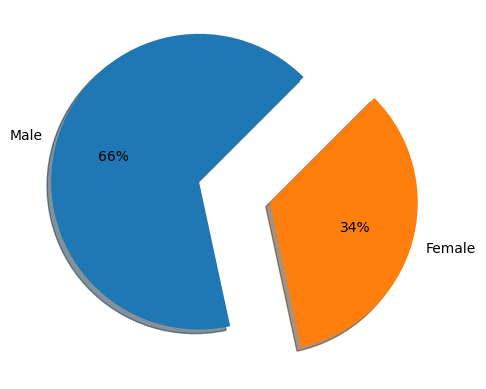

In [526]:
plt.pie(x=counts_gender.values,
        labels=counts_gender.index,
        autopct='%1.0f%%',
        startangle=45,
        shadow=True,
        explode = [0.3,0.2]
       )
plt.show()

In [528]:
type_counts = marathon_df_2022["Race Type"].value_counts()
type_counts

Race Type
10KM RUN               2381
4KM FUN RUN            2277
HALF MARATHON          1176
MARATHON                557
MARATHON ELITE           22
HALF MARATHON ELITE       6
Name: count, dtype: int64

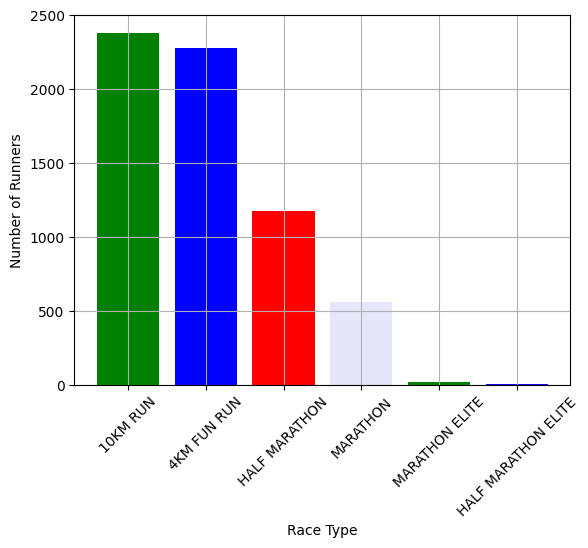

In [535]:
plt.bar(type_counts.index,
        type_counts.values,
        color=['green', 'blue', 'red', 'lavender']
       );
plt.ylabel("Number of Runners")
plt.xlabel("Race Type")
plt.grid()
plt.xticks(rotation=45)
plt.show();

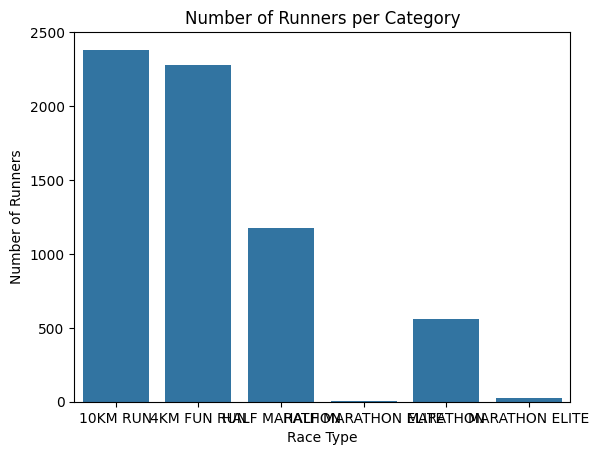

In [536]:
# plt.figure(figsize=(11,8))
sns.countplot(data=marathon_df_2022,
              x="Race Type")
plt.title("Number of Runners per Category")
plt.ylabel("Number of Runners")
plt.show()

In [537]:
type_counts

Race Type
10KM RUN               2381
4KM FUN RUN            2277
HALF MARATHON          1176
MARATHON                557
MARATHON ELITE           22
HALF MARATHON ELITE       6
Name: count, dtype: int64

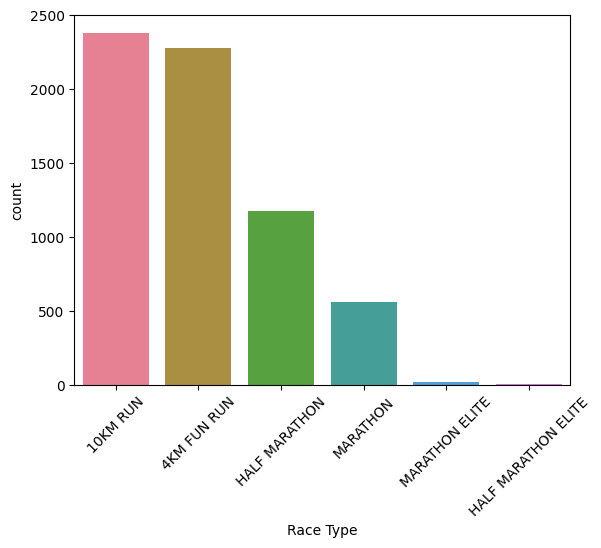

In [541]:
sns.barplot(x="Race Type",
            y="count",
            data=type_counts.to_frame(),
            palette="husl",
            hue="Race Type"
           );
plt.xticks(rotation=45);

<Figure size 1800x1200 with 0 Axes>

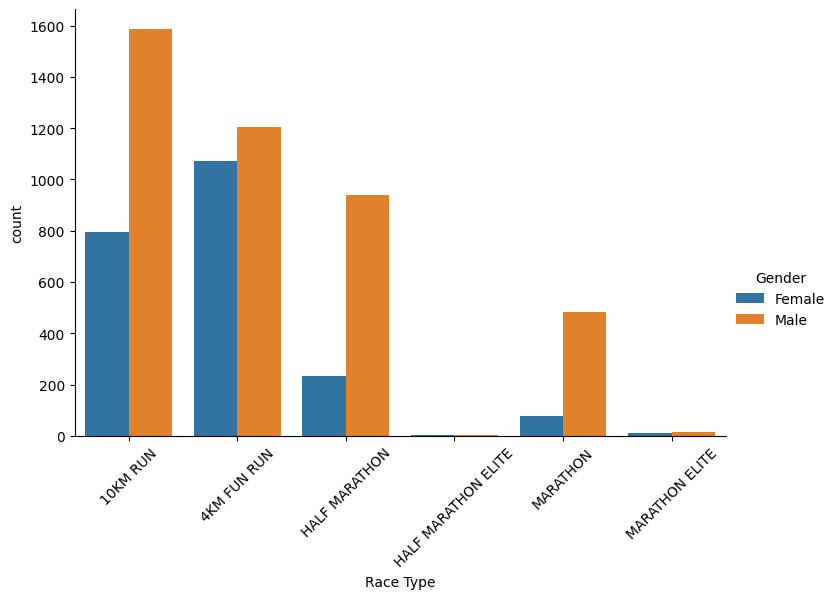

In [545]:
plt.figure(figsize=(18,12))
sns.catplot(
    data=marathon_df_2022,
    x="Race Type",       # Groups on x-axis
    hue="Gender",  # Categories to differentiate bars
    kind="count",    # Use count to calculate frequencies
    height=5,        # Height of the figure
    aspect=1.5       # Aspect ratio
)
plt.xticks(rotation=45);

<Figure size 1800x1200 with 0 Axes>

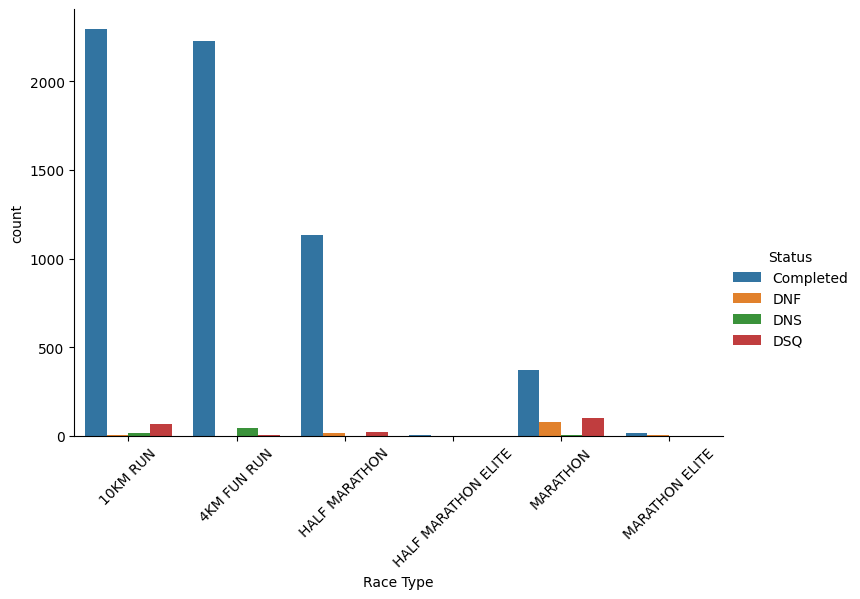

In [546]:
plt.figure(figsize=(18,12))
sns.catplot(
    data=marathon_df_2022,
    x="Race Type",       # Groups on x-axis
    hue="Status",  # Categories to differentiate bars
    kind="count",    # Use count to calculate frequencies
    height=5,        # Height of the figure
    aspect=1.5       # Aspect ratio
)
plt.xticks(rotation=45);

In [549]:
top_nat_counts = marathon_df_2022["Nationality Flag"].value_counts().head(10)
top_nat_counts

Nationality Flag
SA          3453
PH           466
Unknown!     311
IN           243
EG           214
GB           211
PK           160
JO           125
LB           125
MY            84
Name: count, dtype: int64

In [ ]:
type(top_nat_counts)

In [ ]:
marathon_df_2022.shape

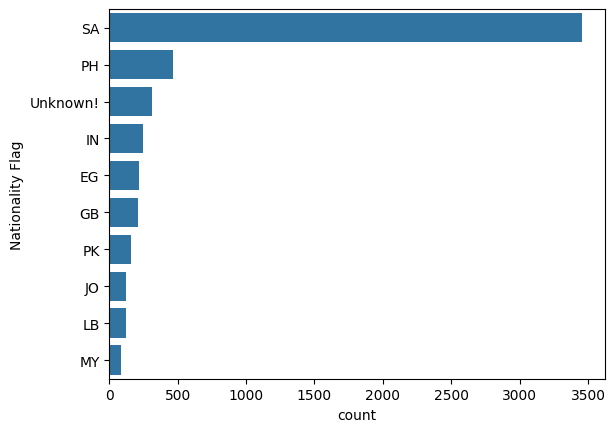

In [550]:
sns.barplot(y="Nationality Flag",
            x="count",
            data=top_nat_counts.to_frame());

##### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

In [551]:
marathon_df_2022.head(2)

Race Type  Gender   Bib                                  Name  \
0  10KM RUN  Female  6081  91fc9155-bcbf-4ea9-b2e3-e52f43b7d74b   
1  10KM RUN  Female  5134  3f5d289c-52df-4d0a-a9f6-3748ca45772a   

  Nationality Flag               Gun Time  Rank  Gender Rank  \
0               SA 0 days 00:42:59.556000    46            1   
1               CZ 0 days 00:43:28.175000    53            2   

               Chip Time  Speed (Km/Hr)  Pace (min/km)  Distance Covered (Km)  \
0 0 days 00:42:57.505000           13.9           4.28                   10.0   
1 0 days 00:43:24.774000           13.8           4.33                   10.0   

      Status  Rank_total  Gender Rank_total  
0  Completed        2293                762  
1  Completed        2293                762

In [580]:
print(temp.shape)
temp = marathon_df_2022[marathon_df_2022['Speed (Km/Hr)']<15]
temp.shape

(6407, 15)


(6294, 15)

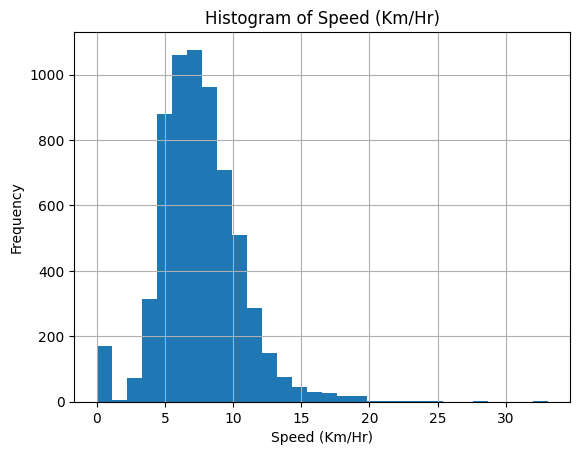

In [569]:
#plt.figure(figsize=(18,12))
plt.hist(temp['Speed (Km/Hr)'],
         #,facecolor = 'b', edgecolor = 'red',
          bins = 30
        ) # bins = 6 means 6 bars
plt.xlabel('Speed (Km/Hr)')
plt.ylabel('Frequency')
plt.grid()
plt.title(f'Histogram of Speed (Km/Hr)')
plt.show()

In [571]:
marathon_df_2022['Race Type'].value_counts()

Race Type
10KM RUN               2381
4KM FUN RUN            2277
HALF MARATHON          1176
MARATHON                557
MARATHON ELITE           22
HALF MARATHON ELITE       6
Name: count, dtype: int64

In [ ]:
## Note: The insights would be taking for each race individually 
# marathon_2022_4KM_df = marathon_df_2022[marathon_df_2022["Race Type"]=='4KM FUN RUN']
# marathon_2022_10KM_df = marathon_df_2022[marathon_df_2022["Race Type"]=='10KM RUN']
# marathon_2022_21KM_df = marathon_df_2022[marathon_df_2022["Race Type"]=='HALF MARATHON']
# marathon_2022_21KM_e_df = marathon_df_2022[marathon_df_2022["Race Type"]=='HALF MARATHON ELITE']
# marathon_2022_42KM_df = marathon_df_2022[marathon_df_2022["Race Type"]=='MARATHON']
# marathon_2022_42KM_e_df = marathon_df_2022[marathon_df_2022["Race Type"]=='MARATHON ELITE']

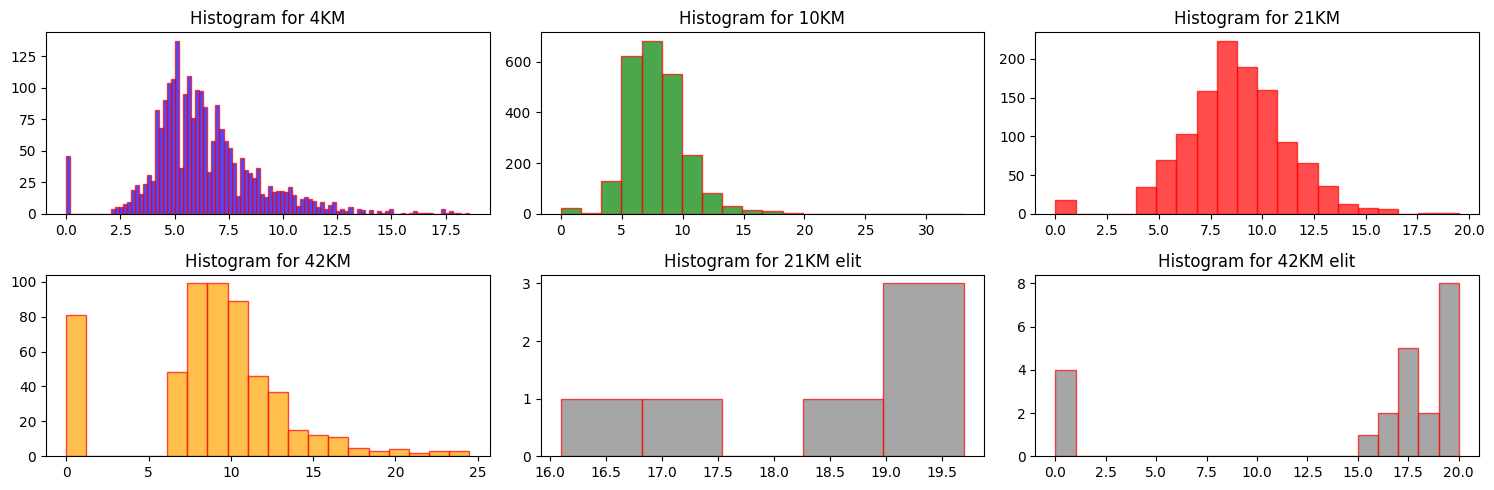

In [573]:
# Create a figure and an array of axes with a subplot for each histogram
fig, axes = plt.subplots(2, 3, figsize=(15, 5))

# Plot a histogram for each dataset using plt.hist
temp_df = marathon_df_2022[marathon_df_2022["Race Type"]=='4KM FUN RUN']
axes[0][0].hist(temp_df['Speed (Km/Hr)'],edgecolor = 'red', bins=100, alpha=0.7, color='blue')
axes[0][0].set_title('Histogram for 4KM')


temp_df = marathon_df_2022[marathon_df_2022["Race Type"]=='10KM RUN']
axes[0][1].hist(temp_df['Speed (Km/Hr)'], edgecolor = 'red', bins=20, alpha=0.7, color='green')
axes[0][1].set_title('Histogram for 10KM')

temp_df = marathon_df_2022[marathon_df_2022["Race Type"]=='HALF MARATHON']
axes[0][2].hist(temp_df['Speed (Km/Hr)'], edgecolor = 'red', bins=20, alpha=0.7, color='red')
axes[0][2].set_title('Histogram for 21KM')

temp_df = marathon_df_2022[marathon_df_2022["Race Type"]=='MARATHON']
axes[1][0].hist(temp_df['Speed (Km/Hr)'], edgecolor = 'red', bins=20, alpha=0.7, color='orange')
axes[1][0].set_title('Histogram for 42KM')

temp_df = marathon_df_2022[marathon_df_2022["Race Type"]=='HALF MARATHON ELITE']
axes[1][1].hist(temp_df['Speed (Km/Hr)'],edgecolor = 'red', bins=5, alpha=0.7, color='grey')
axes[1][1].set_title('Histogram for 21KM elit')

temp_df = marathon_df_2022[marathon_df_2022["Race Type"]=='MARATHON ELITE']
axes[1][2].hist(temp_df['Speed (Km/Hr)'],edgecolor = 'red', bins=20, alpha=0.7, color='grey')
axes[1][2].set_title('Histogram for 42KM elit')

# Display the plots
plt.tight_layout()
plt.show()

<Axes: xlabel='Speed (Km/Hr)', ylabel='Count'>

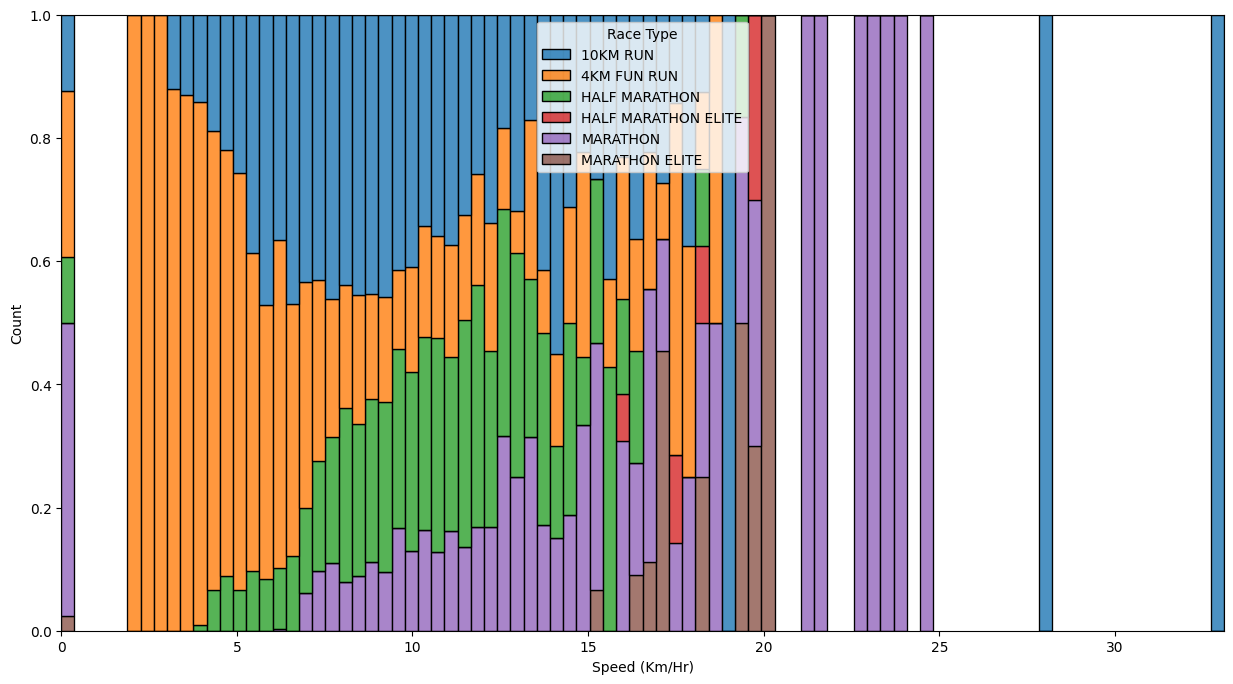

In [577]:
# Stacked Histogram separated by origin
plt.figure(figsize=(15,8))
sns.histplot(
    marathon_df_2022,
    x="Speed (Km/Hr)",
    hue="Race Type", # color of plot elements
    multiple="fill", # also can be layer or dodge or fill
    alpha=0.8)
#{"layer", "dodge", "stack", "fill"}

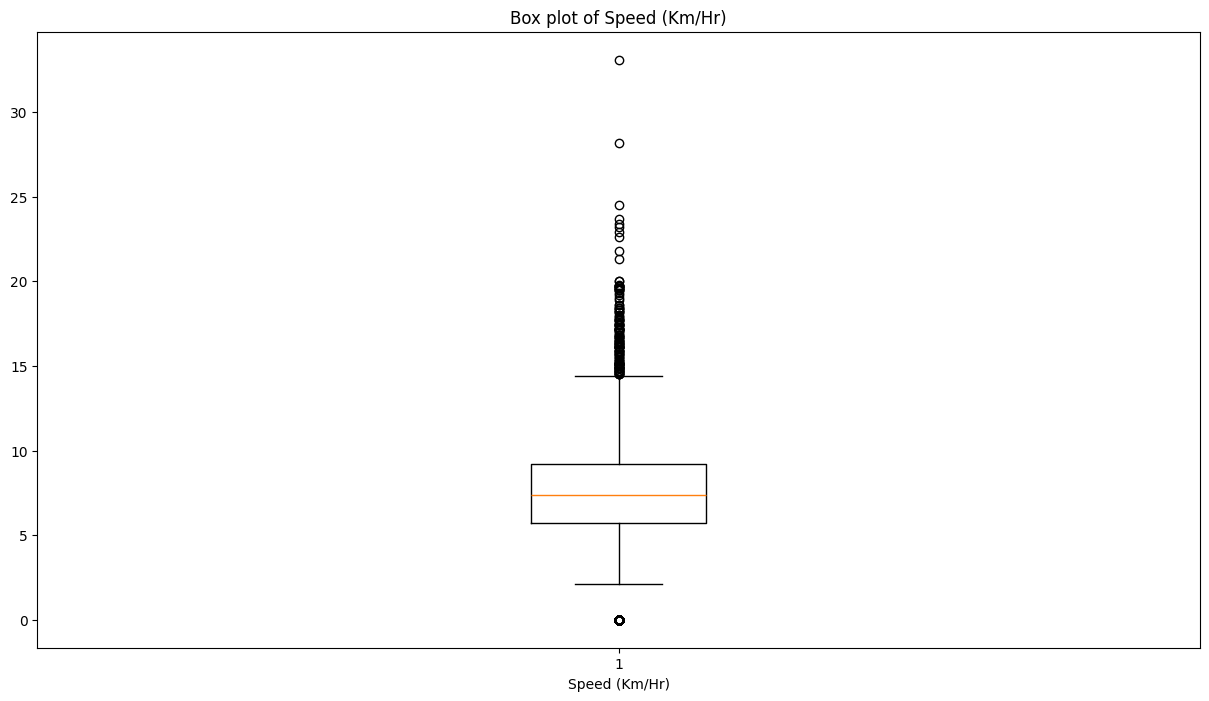

In [578]:
plt.figure(figsize=(15,8))
plt.boxplot(marathon_df_2022['Speed (Km/Hr)'])
plt.xlabel('Speed (Km/Hr)')

plt.title(f'Box plot of Speed (Km/Hr)')
plt.show()

<Axes: ylabel='Speed (Km/Hr)'>

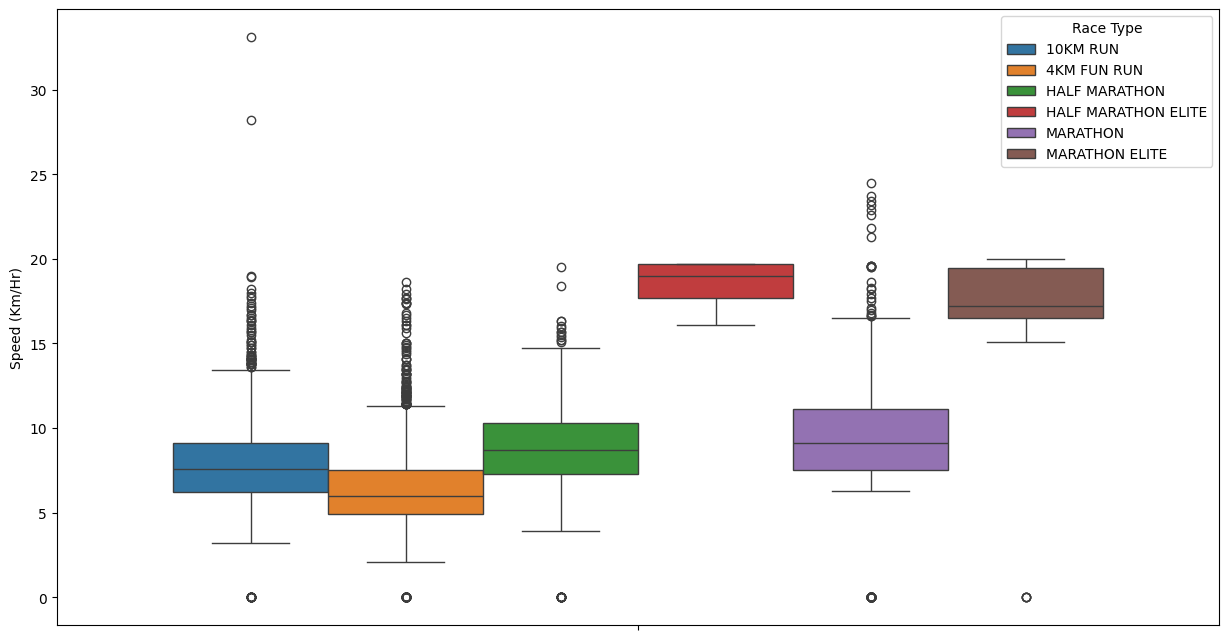

In [579]:
plt.figure(figsize=(15,8))

sns.boxplot(
    marathon_df_2022,
    y="Speed (Km/Hr)",
    hue="Race Type")

<Axes: xlabel='Pace (min/km)', ylabel='Count'>

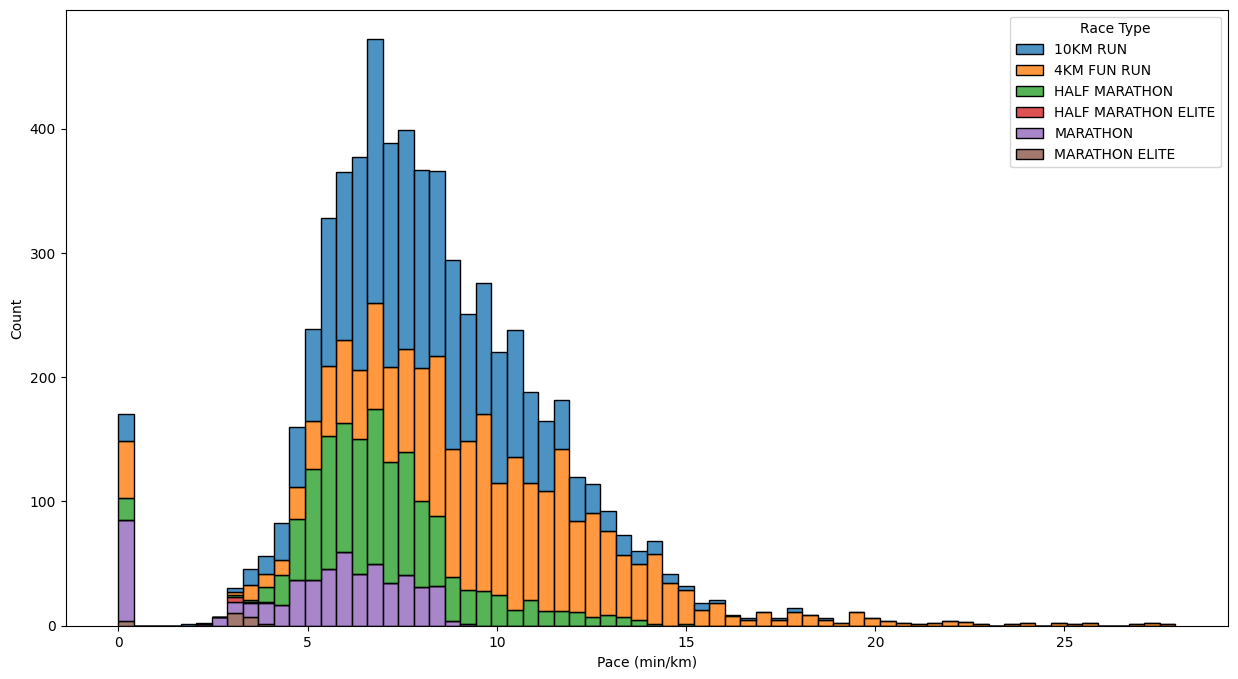

In [583]:
plt.figure(figsize=(15,8))
sns.histplot(
    marathon_df_2022,
    x="Pace (min/km)",
    hue="Race Type", # color of plot elements
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8)
#

<Axes: ylabel='Pace (min/km)'>

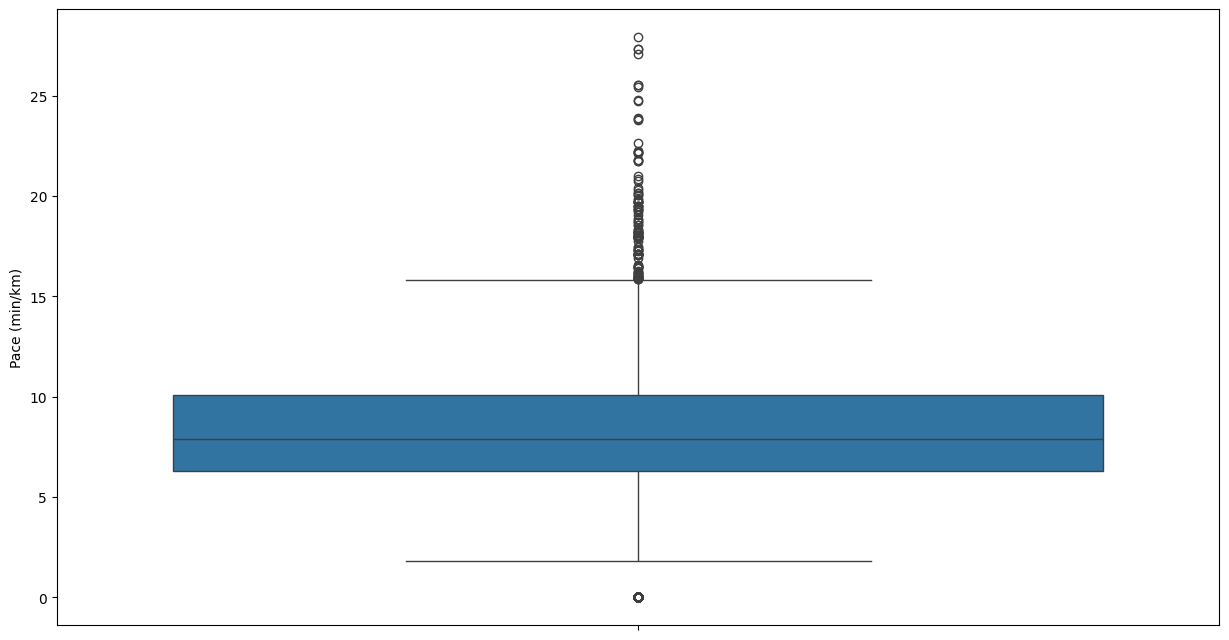

In [584]:
plt.figure(figsize=(15,8))

sns.boxplot(
    marathon_df_2022,
    y="Pace (min/km)",
    #hue="Race Type"
)

In [585]:
marathon_df_2022.head(2)

Race Type  Gender   Bib                                  Name  \
0  10KM RUN  Female  6081  91fc9155-bcbf-4ea9-b2e3-e52f43b7d74b   
1  10KM RUN  Female  5134  3f5d289c-52df-4d0a-a9f6-3748ca45772a   

  Nationality Flag               Gun Time  Rank  Gender Rank  \
0               SA 0 days 00:42:59.556000    46            1   
1               CZ 0 days 00:43:28.175000    53            2   

               Chip Time  Speed (Km/Hr)  Pace (min/km)  Distance Covered (Km)  \
0 0 days 00:42:57.505000           13.9           4.28                   10.0   
1 0 days 00:43:24.774000           13.8           4.33                   10.0   

      Status  Rank_total  Gender Rank_total  
0  Completed        2293                762  
1  Completed        2293                762

In [586]:
# called feature engineering
marathon_df_2022['Chip Time duration-min'] = marathon_df_2022['Chip Time'].dt.total_seconds()/60
marathon_df_2022['Chip Time duration-min'] = marathon_df_2022['Chip Time duration-min'].apply(lambda x: np.round(x, 2))
marathon_df_2022['Gun Time duration-min'] = marathon_df_2022['Gun Time'].dt.total_seconds()/60
marathon_df_2022['Gun Time duration-min'] = marathon_df_2022['Gun Time duration-min'].apply(lambda x: np.round(x, 2))

In [ ]:
marathon_df_2022.head(2)

<Axes: xlabel='Chip Time duration-min', ylabel='Count'>

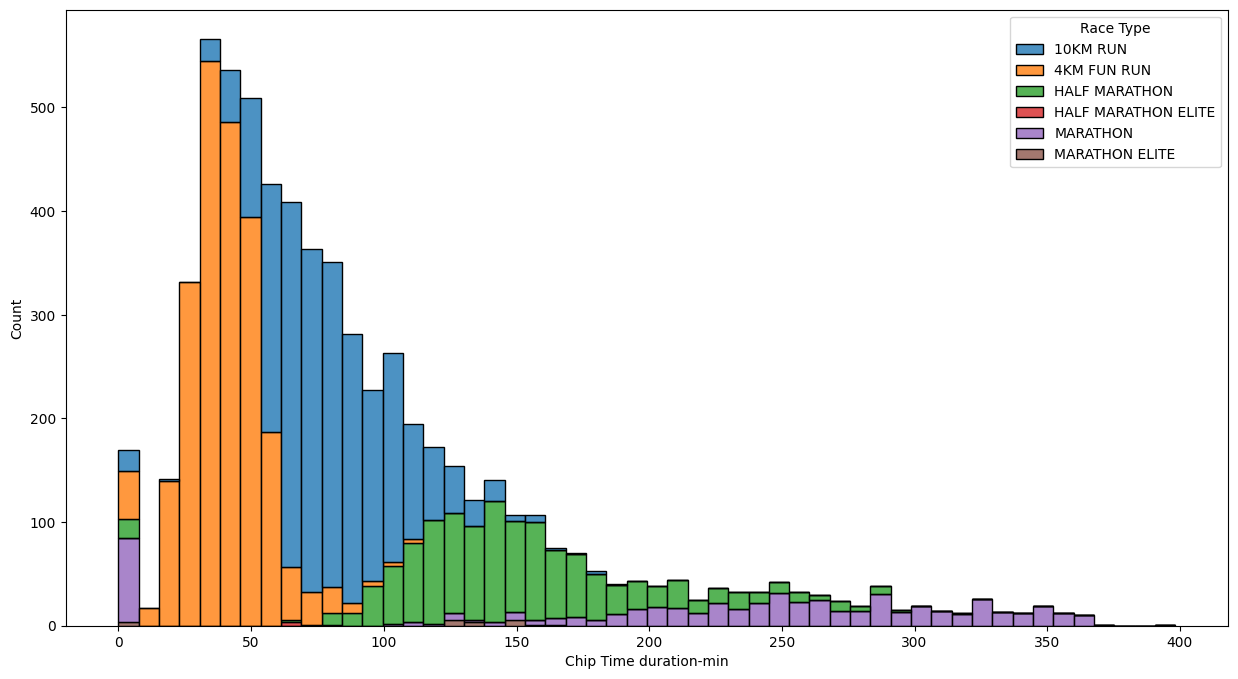

In [587]:
plt.figure(figsize=(15,8))
sns.histplot(
    marathon_df_2022,
    x='Chip Time duration-min',
    hue="Race Type", # color of plot elements
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8)

<Axes: xlabel='Gun Time duration-min', ylabel='Count'>

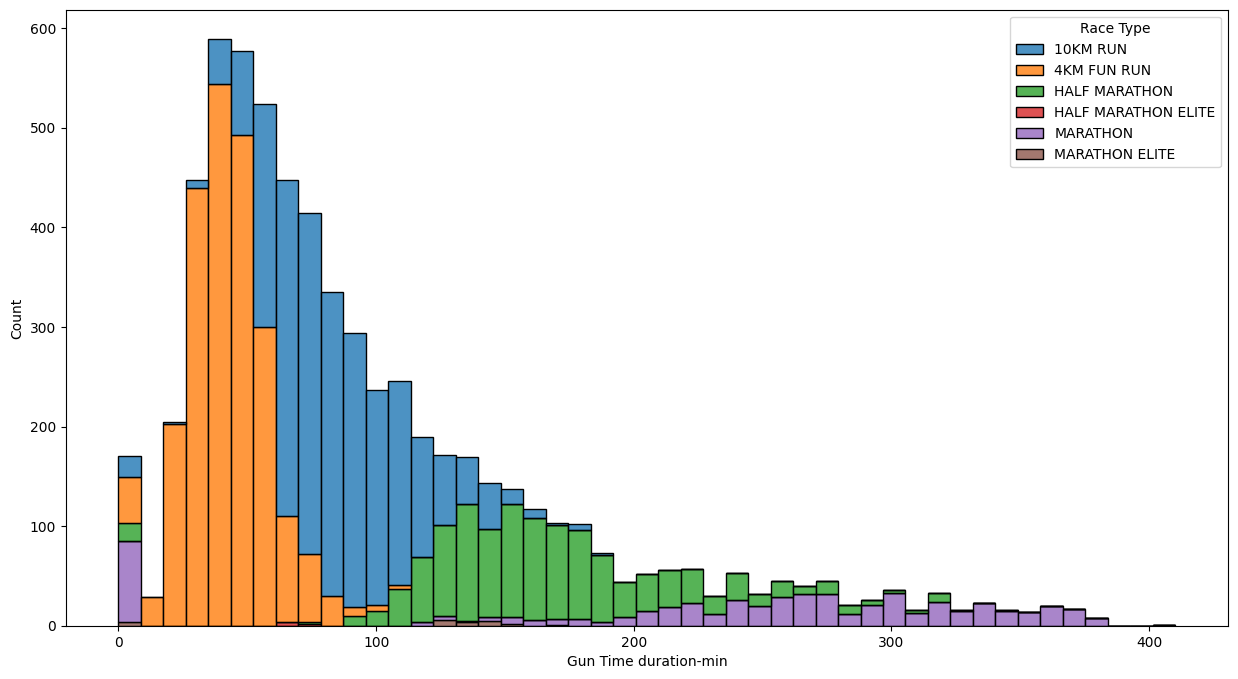

In [588]:
plt.figure(figsize=(15,8))
sns.histplot(
    marathon_df_2022,
    x='Gun Time duration-min',
    hue="Race Type", # color of plot elements
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8)

In [589]:
marathon_df_2022.head(2)

Race Type  Gender   Bib                                  Name  \
0  10KM RUN  Female  6081  91fc9155-bcbf-4ea9-b2e3-e52f43b7d74b   
1  10KM RUN  Female  5134  3f5d289c-52df-4d0a-a9f6-3748ca45772a   

  Nationality Flag               Gun Time  Rank  Gender Rank  \
0               SA 0 days 00:42:59.556000    46            1   
1               CZ 0 days 00:43:28.175000    53            2   

               Chip Time  Speed (Km/Hr)  Pace (min/km)  Distance Covered (Km)  \
0 0 days 00:42:57.505000           13.9           4.28                   10.0   
1 0 days 00:43:24.774000           13.8           4.33                   10.0   

      Status  Rank_total  Gender Rank_total  Chip Time duration-min  \
0  Completed        2293                762                   42.96   
1  Completed        2293                762                   43.41   

   Gun Time duration-min  
0                  42.99  
1                  43.47

<Axes: ylabel='Chip Time duration-min'>

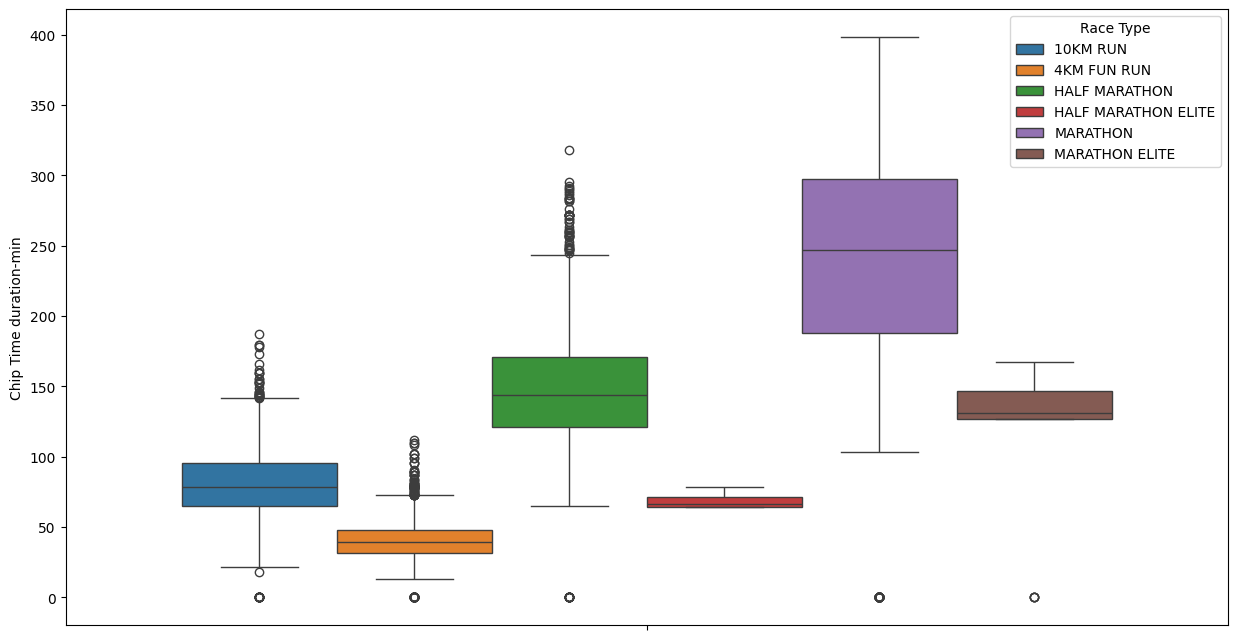

In [590]:
plt.figure(figsize=(15,8))

sns.boxplot(
    marathon_df_2022,
    y='Chip Time duration-min',
    hue="Race Type")

In [591]:
marathon_df_2022.head(2)

Race Type  Gender   Bib                                  Name  \
0  10KM RUN  Female  6081  91fc9155-bcbf-4ea9-b2e3-e52f43b7d74b   
1  10KM RUN  Female  5134  3f5d289c-52df-4d0a-a9f6-3748ca45772a   

  Nationality Flag               Gun Time  Rank  Gender Rank  \
0               SA 0 days 00:42:59.556000    46            1   
1               CZ 0 days 00:43:28.175000    53            2   

               Chip Time  Speed (Km/Hr)  Pace (min/km)  Distance Covered (Km)  \
0 0 days 00:42:57.505000           13.9           4.28                   10.0   
1 0 days 00:43:24.774000           13.8           4.33                   10.0   

      Status  Rank_total  Gender Rank_total  Chip Time duration-min  \
0  Completed        2293                762                   42.96   
1  Completed        2293                762                   43.41   

   Gun Time duration-min  
0                  42.99  
1                  43.47

#### 2023

In [642]:
marathon_df_2023['Gender']

0        Female
1        Female
2        Female
3        Female
4        Female
          ...  
11366      Male
11367      Male
11368      Male
11369      Male
11370      Male
Name: Gender, Length: 11371, dtype: object

In [643]:
counts_gender = marathon_df_2023['Gender'].value_counts()
counts_gender

Gender
Male      7419
Female    3952
Name: count, dtype: int64

In [644]:
counts_gender.index

Index(['Male', 'Female'], dtype='object', name='Gender')

In [645]:
counts_gender.values

array([7419, 3952])

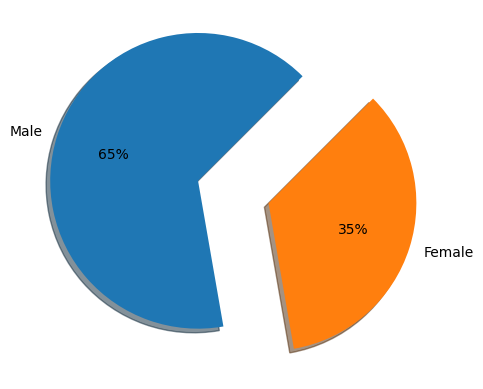

In [646]:
plt.pie(x=counts_gender.values,
        labels=counts_gender.index,
        autopct='%1.0f%%',
        startangle=45,
        shadow=True,
        explode = [0.3,0.2]
       )
plt.show()

In [647]:
type_counts = marathon_df_2023["Race Type"].value_counts()
type_counts

Race Type
4 km                   4498
10 km                  4486
Half Marathon          1919
Marathon                427
Marathon Elite           29
Half Marathon Elite      12
Name: count, dtype: int64

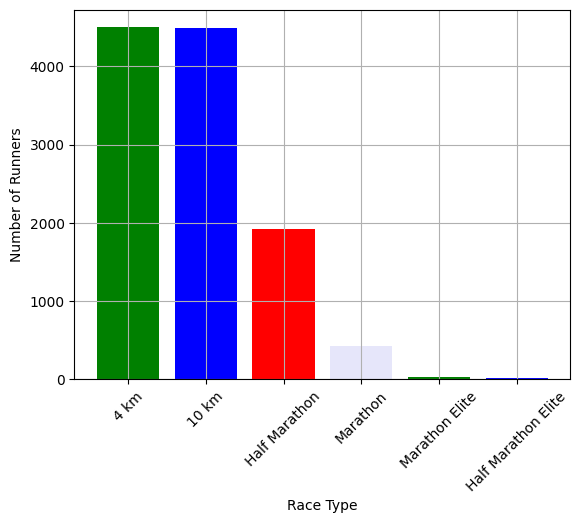

In [648]:
plt.bar(type_counts.index,
        type_counts.values,
        color=['green', 'blue', 'red', 'lavender']
       );
plt.ylabel("Number of Runners")
plt.xlabel("Race Type")
plt.grid()
plt.xticks(rotation=45)
plt.show();

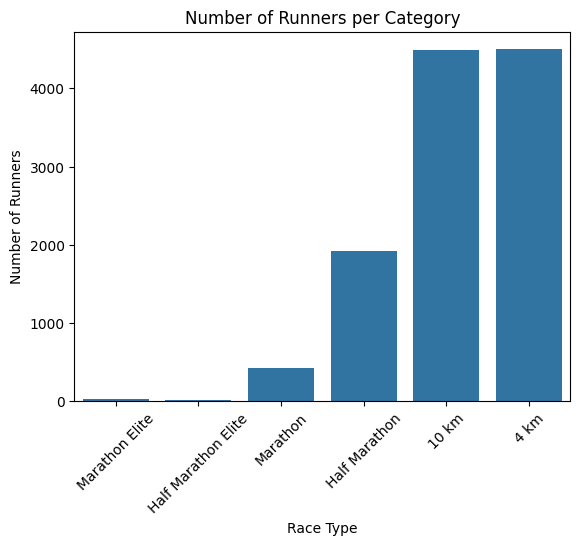

In [650]:
# plt.figure(figsize=(11,8))
sns.countplot(data=marathon_df_2023,
              x="Race Type")
plt.title("Number of Runners per Category")
plt.ylabel("Number of Runners")
plt.xticks(rotation=45)
plt.show()

In [651]:
type_counts

Race Type
4 km                   4498
10 km                  4486
Half Marathon          1919
Marathon                427
Marathon Elite           29
Half Marathon Elite      12
Name: count, dtype: int64

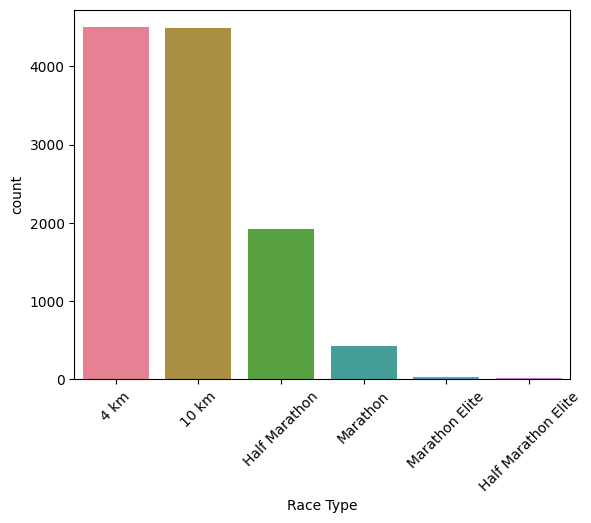

In [652]:
sns.barplot(x="Race Type",
            y="count",
            data=type_counts.to_frame(),
            palette="husl",
            hue="Race Type"
           );
plt.xticks(rotation=45);

<Figure size 1800x1200 with 0 Axes>

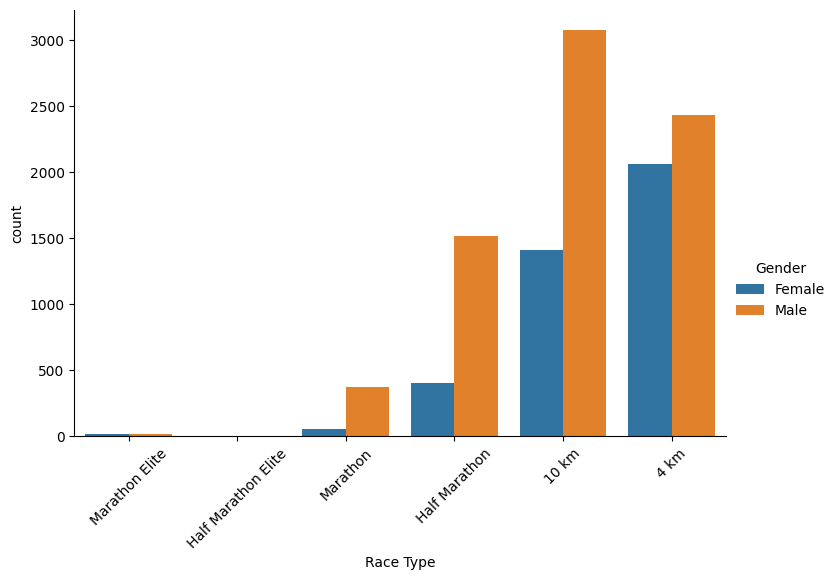

In [653]:
plt.figure(figsize=(18,12))
sns.catplot(
    data=marathon_df_2023,
    x="Race Type",       # Groups on x-axis
    hue="Gender",  # Categories to differentiate bars
    kind="count",    # Use count to calculate frequencies
    height=5,        # Height of the figure
    aspect=1.5       # Aspect ratio
)
plt.xticks(rotation=45);

<Figure size 1800x1200 with 0 Axes>

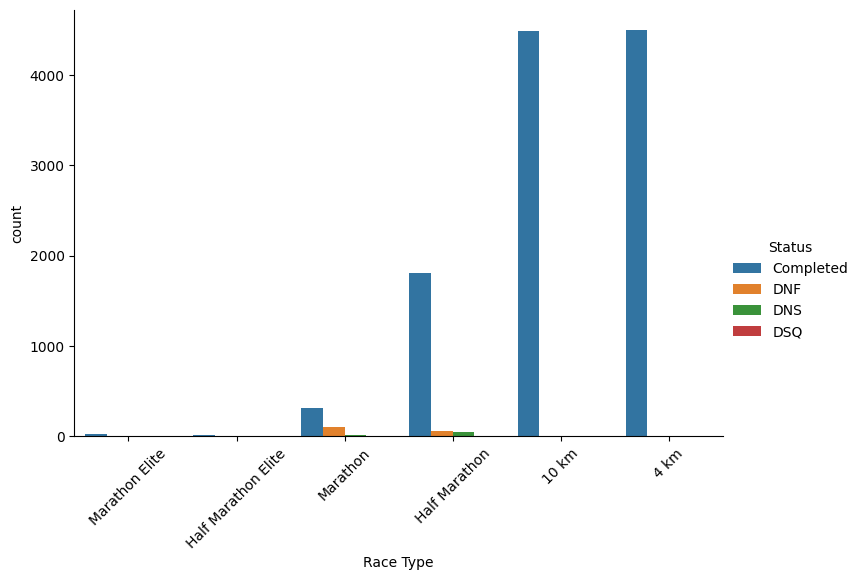

In [655]:
plt.figure(figsize=(18,12))
sns.catplot(
    data=marathon_df_2023,
    x="Race Type",       # Groups on x-axis
    hue="Status",  # Categories to differentiate bars
    kind="count",    # Use count to calculate frequencies
    height=5,        # Height of the figure
    aspect=1.5       # Aspect ratio
)
plt.xticks(rotation=45);

In [656]:
top_nat_counts = marathon_df_2023["Nationality Flag"].value_counts().head(10)
top_nat_counts

Nationality Flag
sa    6693
ph     576
in     564
eg     467
jo     304
pk     255
gb     221
sy     191
lb     186
ye     149
Name: count, dtype: int64

In [657]:
type(top_nat_counts)

pandas.core.series.Series

In [658]:
marathon_df_2023.shape

(11371, 14)

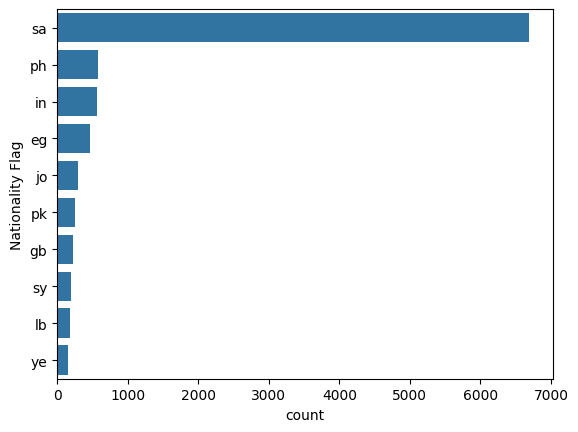

In [659]:
sns.barplot(y="Nationality Flag",
            x="count",
            data=top_nat_counts.to_frame());

##### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

In [593]:
marathon_df_2023.head(2)

Race Type  Gender  Bib                                  Name  \
0  Marathon Elite  Female   26  0cefd5b0-94be-40ee-85c5-7b0868e17dcc   
1  Marathon Elite  Female   27  f9a7159b-e872-4c4f-a898-afeb4c7653af   

  Nationality Flag Nationality Code  Rank        Gun Time       Chip Time  \
0               et              ETH     1 0 days 02:24:30 0 days 02:24:29   
1               et              ETH     2 0 days 02:24:59 0 days 02:24:58   

   Pace min/km  Speed Km/hr     Status  
0         3.40         17.6  Completed  
1         3.43         17.5  Completed

In [597]:
print(temp.shape)
temp = marathon_df_2023#[marathon_df_2023['Speed Km/hr']<15]
temp.shape

(11277, 12)


(11371, 12)

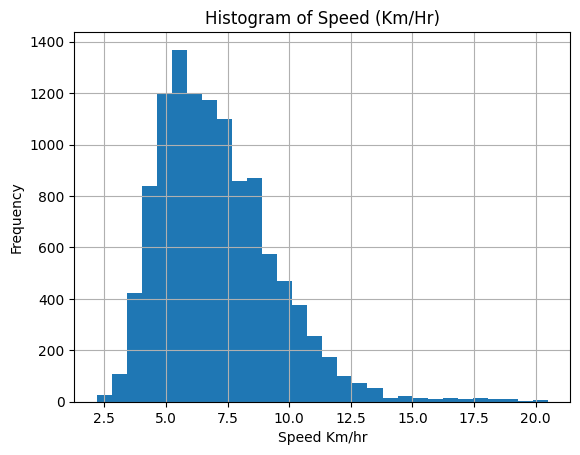

In [599]:
#plt.figure(figsize=(18,12))
plt.hist(temp['Speed Km/hr'],
         #,facecolor = 'b', edgecolor = 'red',
          bins = 30
        ) # bins = 6 means 6 bars
plt.xlabel('Speed Km/hr')
plt.ylabel('Frequency')
plt.grid()
plt.title(f'Histogram of Speed (Km/Hr)')
plt.show()

In [600]:
marathon_df_2023['Race Type'].value_counts()

Race Type
4 km                   4498
10 km                  4486
Half Marathon          1919
Marathon                427
Marathon Elite           29
Half Marathon Elite      12
Name: count, dtype: int64

In [ ]:
## Note: The insights would be taking for each race individually 
# marathon_2022_4KM_df = marathon_df_2022[marathon_df_2022["Race Type"]=='4KM FUN RUN']
# marathon_2022_10KM_df = marathon_df_2022[marathon_df_2022["Race Type"]=='10KM RUN']
# marathon_2022_21KM_df = marathon_df_2022[marathon_df_2022["Race Type"]=='HALF MARATHON']
# marathon_2022_21KM_e_df = marathon_df_2022[marathon_df_2022["Race Type"]=='HALF MARATHON ELITE']
# marathon_2022_42KM_df = marathon_df_2022[marathon_df_2022["Race Type"]=='MARATHON']
# marathon_2022_42KM_e_df = marathon_df_2022[marathon_df_2022["Race Type"]=='MARATHON ELITE']

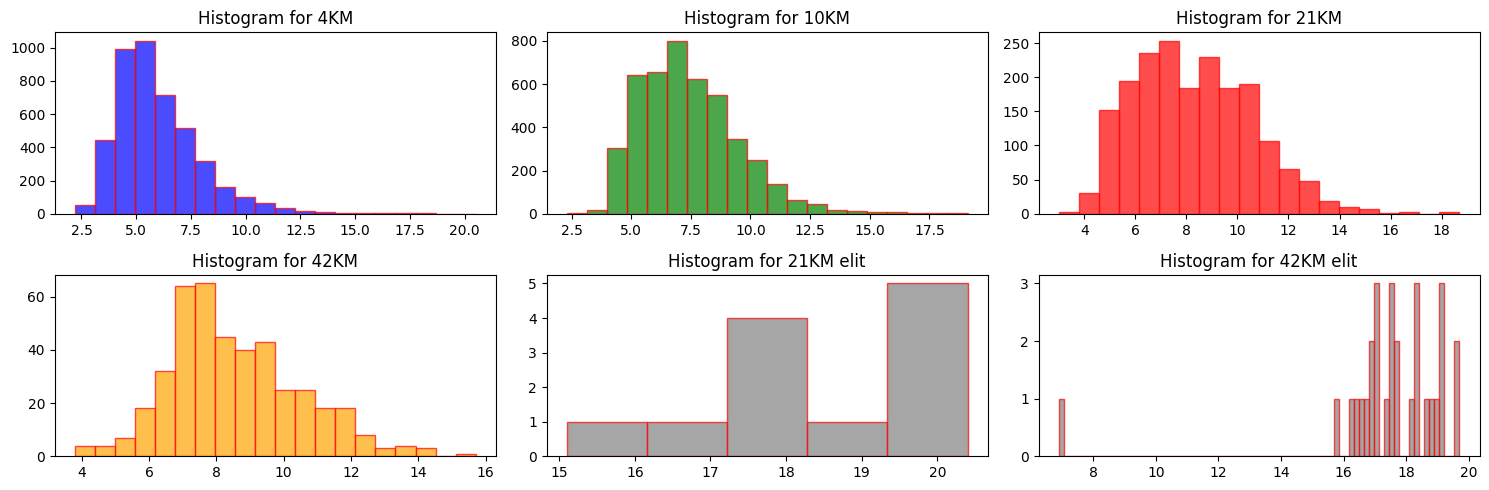

In [605]:
# Create a figure and an array of axes with a subplot for each histogram
fig, axes = plt.subplots(2, 3, figsize=(15, 5))

# Plot a histogram for each dataset using plt.hist
temp_df = marathon_df_2023[marathon_df_2023["Race Type"]=='4 km']
axes[0][0].hist(temp_df['Speed Km/hr'],edgecolor = 'red', bins=20, alpha=0.7, color='blue')
axes[0][0].set_title('Histogram for 4KM')


temp_df = marathon_df_2023[marathon_df_2023["Race Type"]=='10 km']
axes[0][1].hist(temp_df['Speed Km/hr'], edgecolor = 'red', bins=20, alpha=0.7, color='green')
axes[0][1].set_title('Histogram for 10KM')

temp_df = marathon_df_2023[marathon_df_2023["Race Type"]=='Half Marathon']
axes[0][2].hist(temp_df['Speed Km/hr'], edgecolor = 'red', bins=20, alpha=0.7, color='red')
axes[0][2].set_title('Histogram for 21KM')

temp_df = marathon_df_2023[marathon_df_2023["Race Type"]=='Marathon']
axes[1][0].hist(temp_df['Speed Km/hr'], edgecolor = 'red', bins=20, alpha=0.7, color='orange')
axes[1][0].set_title('Histogram for 42KM')

temp_df = marathon_df_2023[marathon_df_2023["Race Type"]=='Half Marathon Elite']
axes[1][1].hist(temp_df['Speed Km/hr'],edgecolor = 'red', bins=5, alpha=0.7, color='grey')
axes[1][1].set_title('Histogram for 21KM elit')

temp_df = marathon_df_2023[marathon_df_2023["Race Type"]=='Marathon Elite']
axes[1][2].hist(temp_df['Speed Km/hr'],edgecolor = 'red', bins=80, alpha=0.7, color='grey')
axes[1][2].set_title('Histogram for 42KM elit')

# Display the plots
plt.tight_layout()
plt.show()

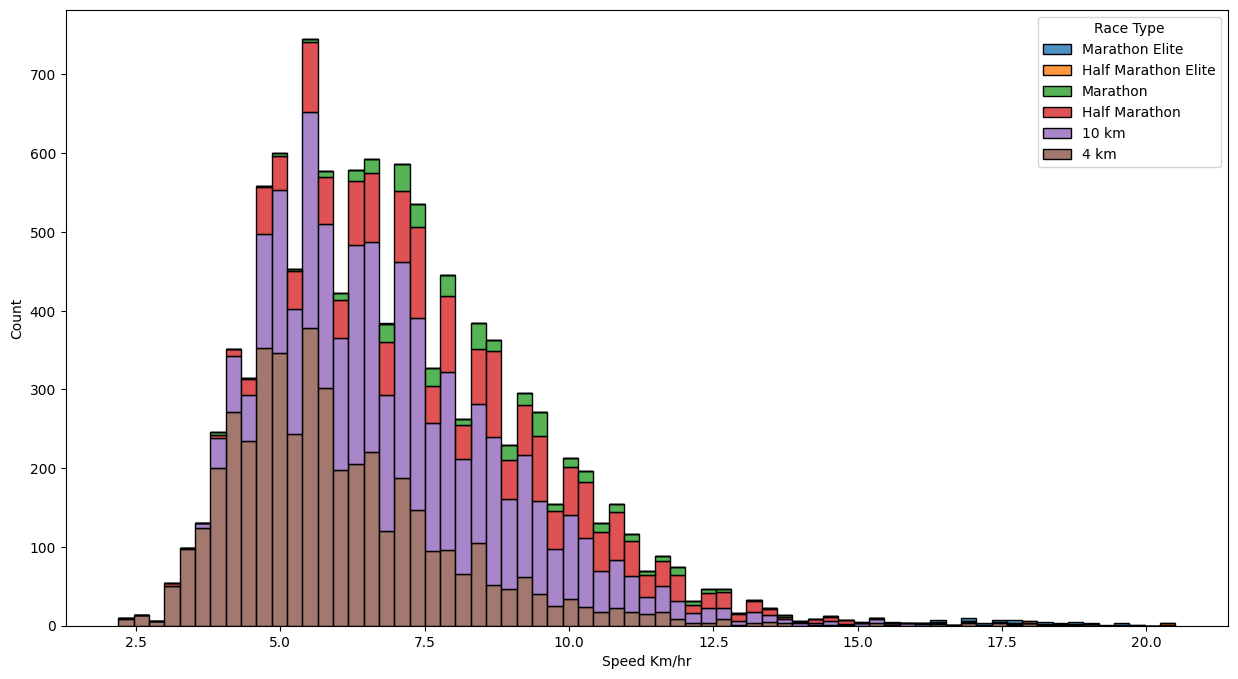

In [610]:
# Stacked Histogram separated by origin
plt.figure(figsize=(15,8))
sns.histplot(
    marathon_df_2023,
    x="Speed Km/hr",
    hue="Race Type", # color of plot elements
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8);
#{"layer", "dodge", "stack", "fill"}

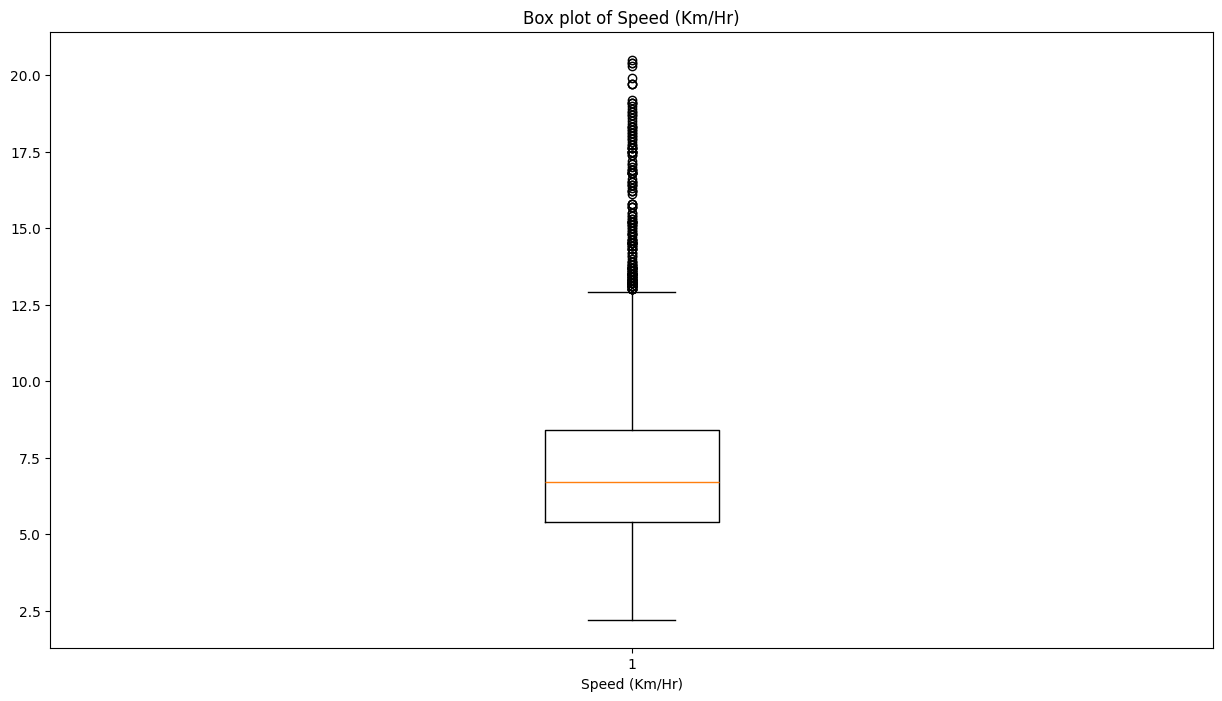

In [611]:
plt.figure(figsize=(15,8))
plt.boxplot(marathon_df_2023['Speed Km/hr'])
plt.xlabel('Speed (Km/Hr)')

plt.title(f'Box plot of Speed (Km/Hr)')
plt.show()

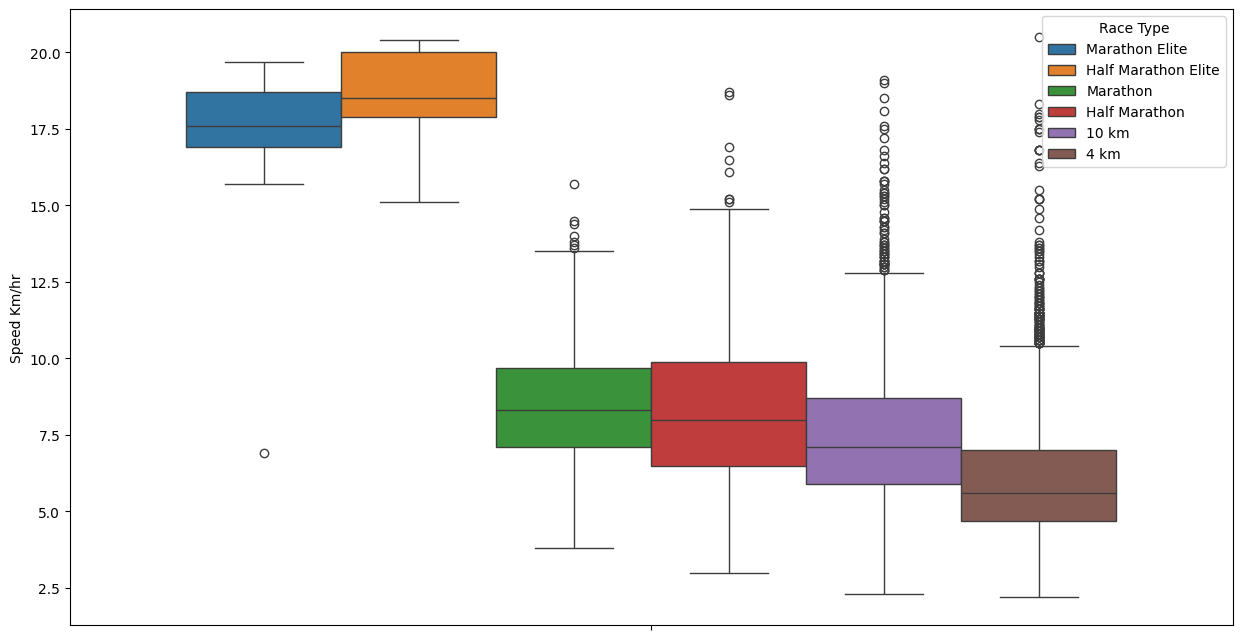

In [613]:
plt.figure(figsize=(15,8))

sns.boxplot(
    marathon_df_2023,
    y="Speed Km/hr",
    hue="Race Type");

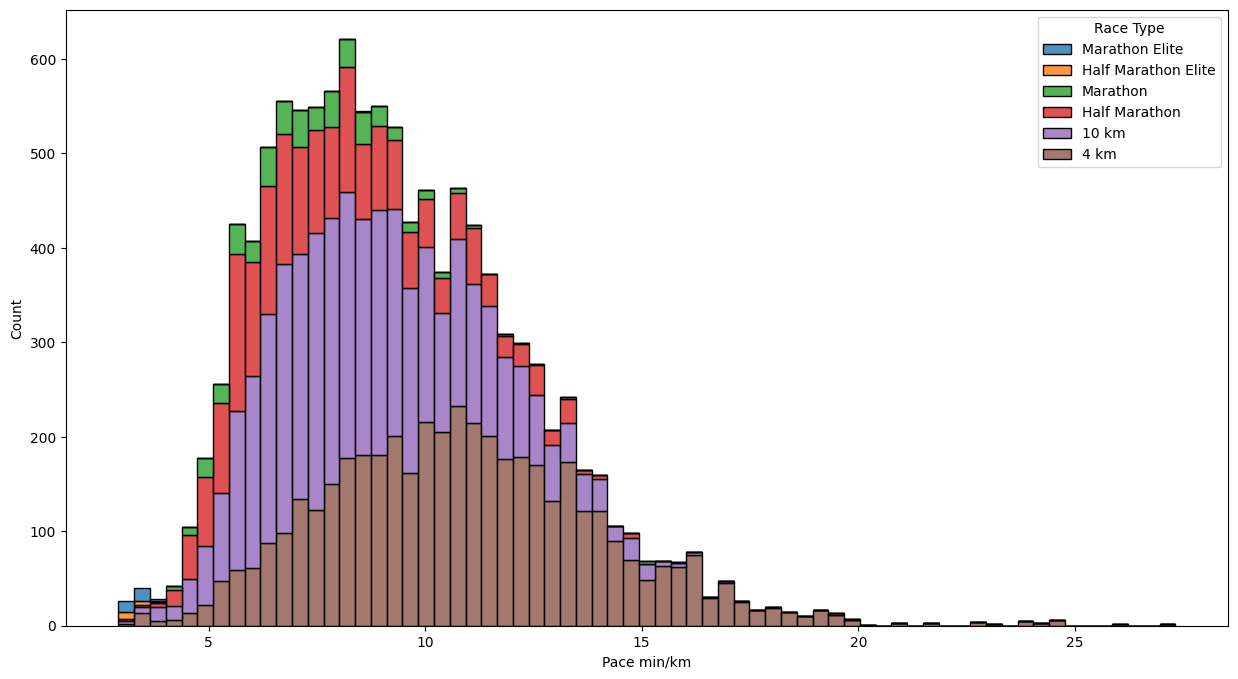

In [615]:
plt.figure(figsize=(15,8))
sns.histplot(
    marathon_df_2023,
    x="Pace min/km",
    hue="Race Type", # color of plot elements
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8);
#

<Axes: ylabel='Pace min/km'>

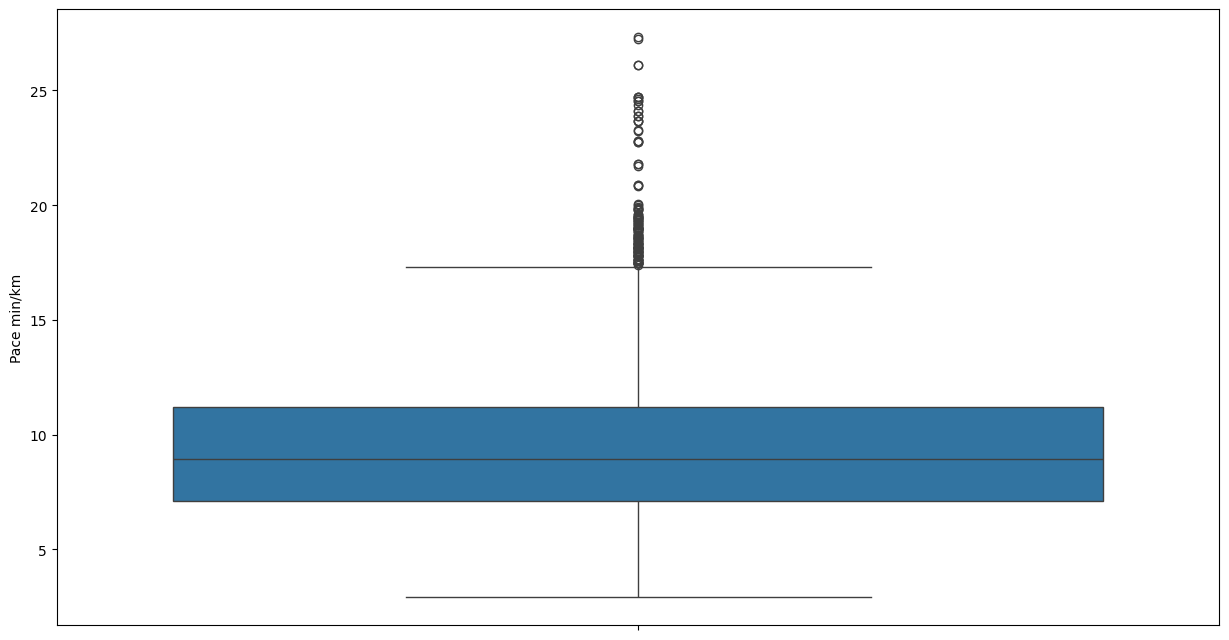

In [616]:
plt.figure(figsize=(15,8))

sns.boxplot(
    marathon_df_2023,
    y="Pace min/km",
    #hue="Race Type"
)

In [617]:
marathon_df_2023.head(2)

Race Type  Gender  Bib                                  Name  \
0  Marathon Elite  Female   26  0cefd5b0-94be-40ee-85c5-7b0868e17dcc   
1  Marathon Elite  Female   27  f9a7159b-e872-4c4f-a898-afeb4c7653af   

  Nationality Flag Nationality Code  Rank        Gun Time       Chip Time  \
0               et              ETH     1 0 days 02:24:30 0 days 02:24:29   
1               et              ETH     2 0 days 02:24:59 0 days 02:24:58   

   Pace min/km  Speed Km/hr     Status  
0         3.40         17.6  Completed  
1         3.43         17.5  Completed

In [618]:
# called feature engineering
marathon_df_2023['Chip Time duration-min'] = marathon_df_2023['Chip Time'].dt.total_seconds()/60
marathon_df_2023['Chip Time duration-min'] = marathon_df_2023['Chip Time duration-min'].apply(lambda x: np.round(x, 2))
marathon_df_2023['Gun Time duration-min'] = marathon_df_2023['Gun Time'].dt.total_seconds()/60
marathon_df_2023['Gun Time duration-min'] = marathon_df_2023['Gun Time duration-min'].apply(lambda x: np.round(x, 2))

In [619]:
marathon_df_2023.head(2)

Race Type  Gender  Bib                                  Name  \
0  Marathon Elite  Female   26  0cefd5b0-94be-40ee-85c5-7b0868e17dcc   
1  Marathon Elite  Female   27  f9a7159b-e872-4c4f-a898-afeb4c7653af   

  Nationality Flag Nationality Code  Rank        Gun Time       Chip Time  \
0               et              ETH     1 0 days 02:24:30 0 days 02:24:29   
1               et              ETH     2 0 days 02:24:59 0 days 02:24:58   

   Pace min/km  Speed Km/hr     Status  Chip Time duration-min  \
0         3.40         17.6  Completed                  144.48   
1         3.43         17.5  Completed                  144.97   

   Gun Time duration-min  
0                 144.50  
1                 144.98

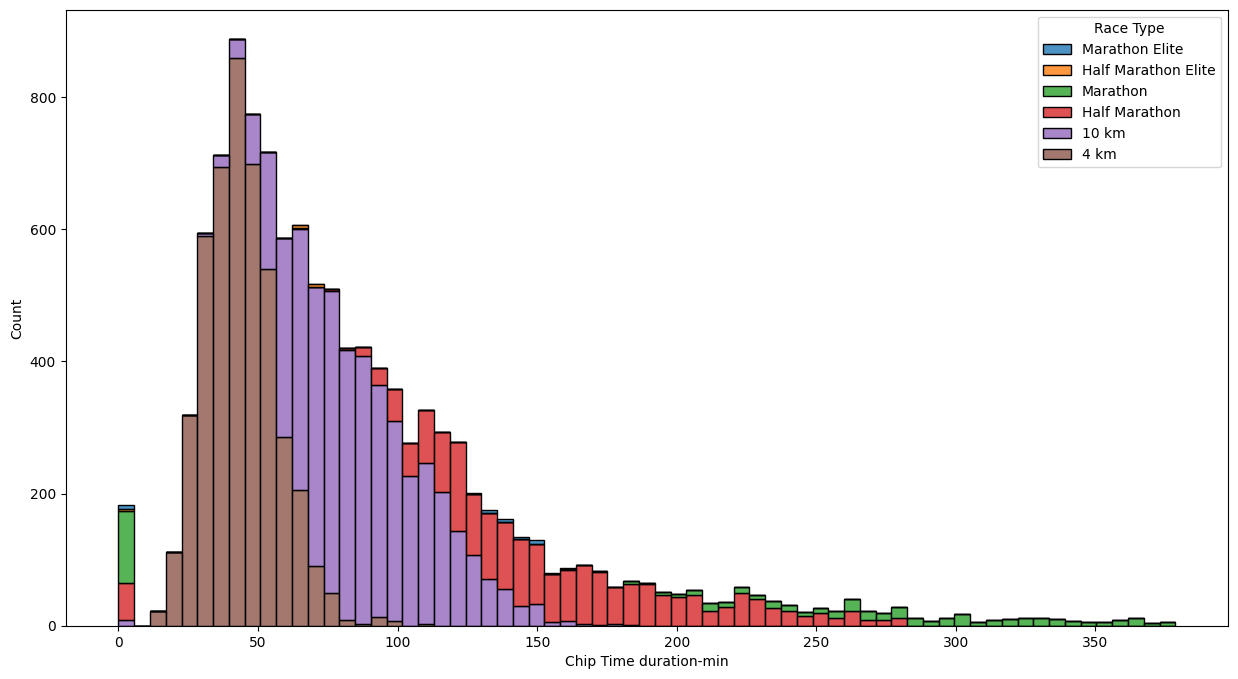

In [621]:
plt.figure(figsize=(15,8))
sns.histplot(
    marathon_df_2023,
    x='Chip Time duration-min',
    hue="Race Type", # color of plot elements
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8);

<Axes: xlabel='Gun Time duration-min', ylabel='Count'>

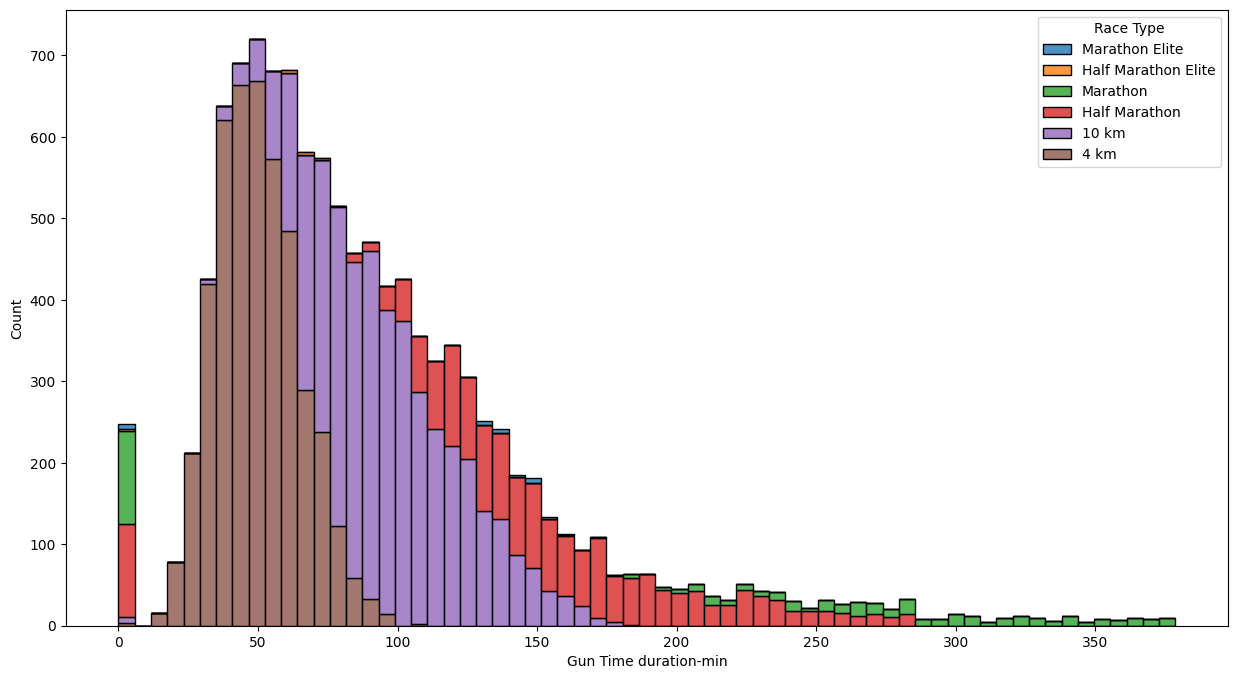

In [622]:
plt.figure(figsize=(15,8))
sns.histplot(
    marathon_df_2023,
    x='Gun Time duration-min',
    hue="Race Type", # color of plot elements
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8)

In [623]:
marathon_df_2023.head(2)

Race Type  Gender  Bib                                  Name  \
0  Marathon Elite  Female   26  0cefd5b0-94be-40ee-85c5-7b0868e17dcc   
1  Marathon Elite  Female   27  f9a7159b-e872-4c4f-a898-afeb4c7653af   

  Nationality Flag Nationality Code  Rank        Gun Time       Chip Time  \
0               et              ETH     1 0 days 02:24:30 0 days 02:24:29   
1               et              ETH     2 0 days 02:24:59 0 days 02:24:58   

   Pace min/km  Speed Km/hr     Status  Chip Time duration-min  \
0         3.40         17.6  Completed                  144.48   
1         3.43         17.5  Completed                  144.97   

   Gun Time duration-min  
0                 144.50  
1                 144.98

<Axes: ylabel='Chip Time duration-min'>

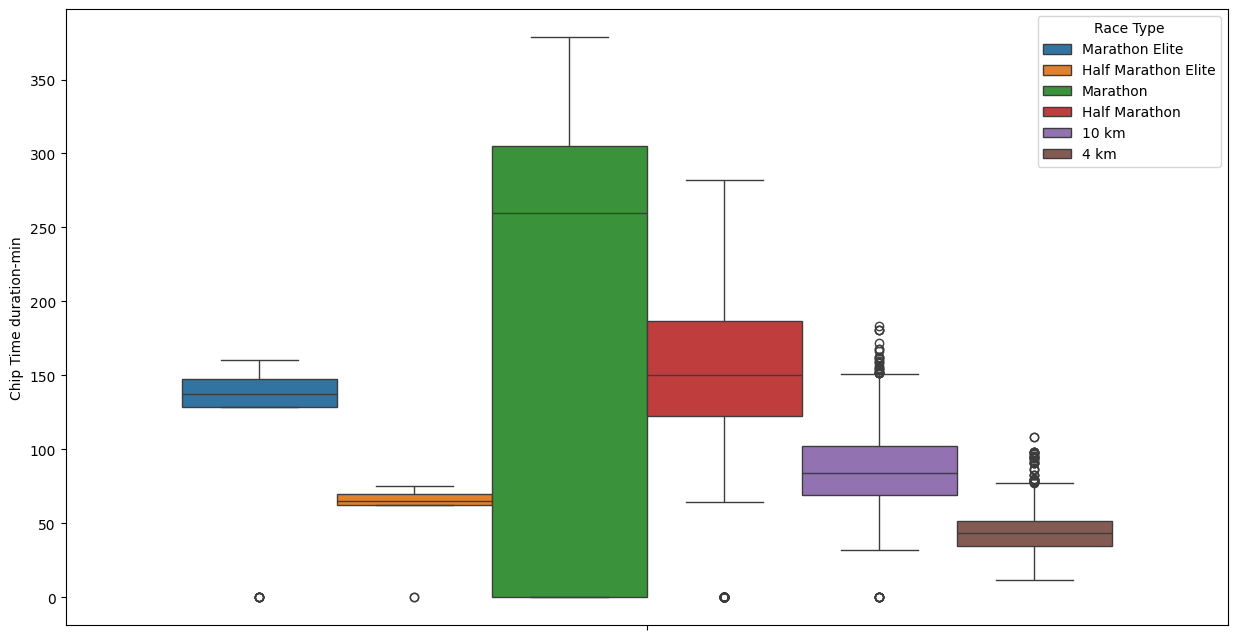

In [624]:
plt.figure(figsize=(15,8))

sns.boxplot(
    marathon_df_2023,
    y='Chip Time duration-min',
    hue="Race Type")

In [625]:
marathon_df_2023.head(2)

Race Type  Gender  Bib                                  Name  \
0  Marathon Elite  Female   26  0cefd5b0-94be-40ee-85c5-7b0868e17dcc   
1  Marathon Elite  Female   27  f9a7159b-e872-4c4f-a898-afeb4c7653af   

  Nationality Flag Nationality Code  Rank        Gun Time       Chip Time  \
0               et              ETH     1 0 days 02:24:30 0 days 02:24:29   
1               et              ETH     2 0 days 02:24:59 0 days 02:24:58   

   Pace min/km  Speed Km/hr     Status  Chip Time duration-min  \
0         3.40         17.6  Completed                  144.48   
1         3.43         17.5  Completed                  144.97   

   Gun Time duration-min  
0                 144.50  
1                 144.98

#### 2024

In [660]:
marathon_df_2024['Gender']

0        Female
1        Female
2        Female
3        Female
4        Female
          ...  
15292      Male
15293      Male
15294      Male
15295      Male
15296      Male
Name: Gender, Length: 15297, dtype: object

In [661]:
counts_gender = marathon_df_2024['Gender'].value_counts()
counts_gender

Gender
Male      9686
Female    5611
Name: count, dtype: int64

In [662]:
counts_gender.index

Index(['Male', 'Female'], dtype='object', name='Gender')

In [663]:
counts_gender.values

array([9686, 5611])

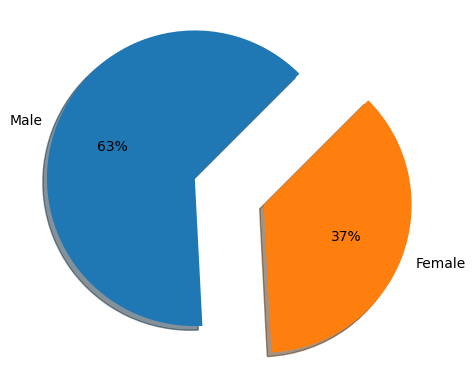

In [664]:
plt.pie(x=counts_gender.values,
        labels=counts_gender.index,
        autopct='%1.0f%%',
        startangle=45,
        shadow=True,
        explode = [0.3,0.2]
       )
plt.show()

In [665]:
type_counts = marathon_df_2024["Race Type"].value_counts()
type_counts

Race Type
4KM FUN RUN            6155
10KM RUN               6118
HALF MARATHON          2470
MARATHON                514
MARATHON ELITE           29
HALF MARATHON ELITE      11
Name: count, dtype: int64

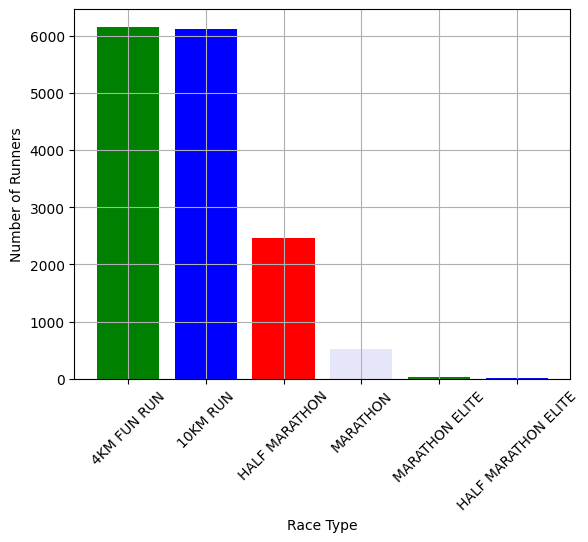

In [666]:
plt.bar(type_counts.index,
        type_counts.values,
        color=['green', 'blue', 'red', 'lavender']
       );
plt.ylabel("Number of Runners")
plt.xlabel("Race Type")
plt.grid()
plt.xticks(rotation=45)
plt.show();

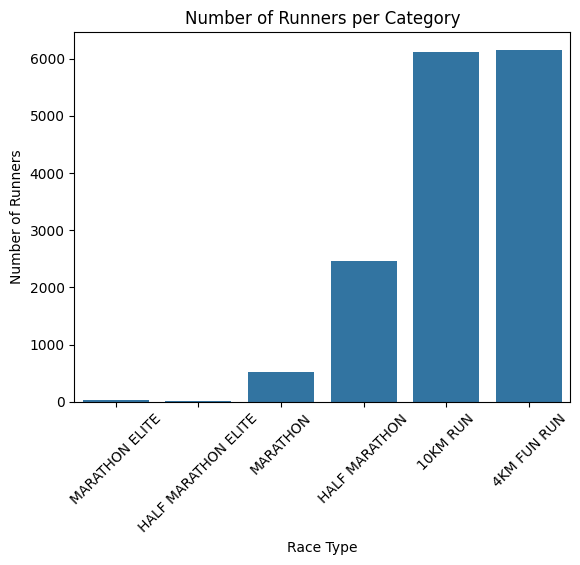

In [667]:
# plt.figure(figsize=(11,8))
sns.countplot(data=marathon_df_2024,
              x="Race Type")
plt.title("Number of Runners per Category")
plt.ylabel("Number of Runners")
plt.xticks(rotation=45)
plt.show()

In [668]:
type_counts

Race Type
4KM FUN RUN            6155
10KM RUN               6118
HALF MARATHON          2470
MARATHON                514
MARATHON ELITE           29
HALF MARATHON ELITE      11
Name: count, dtype: int64

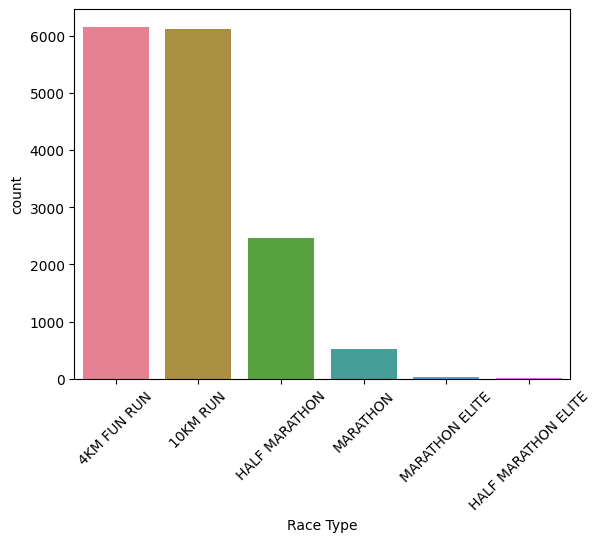

In [669]:
sns.barplot(x="Race Type",
            y="count",
            data=type_counts.to_frame(),
            palette="husl",
            hue="Race Type"
           );
plt.xticks(rotation=45);

<Figure size 1800x1200 with 0 Axes>

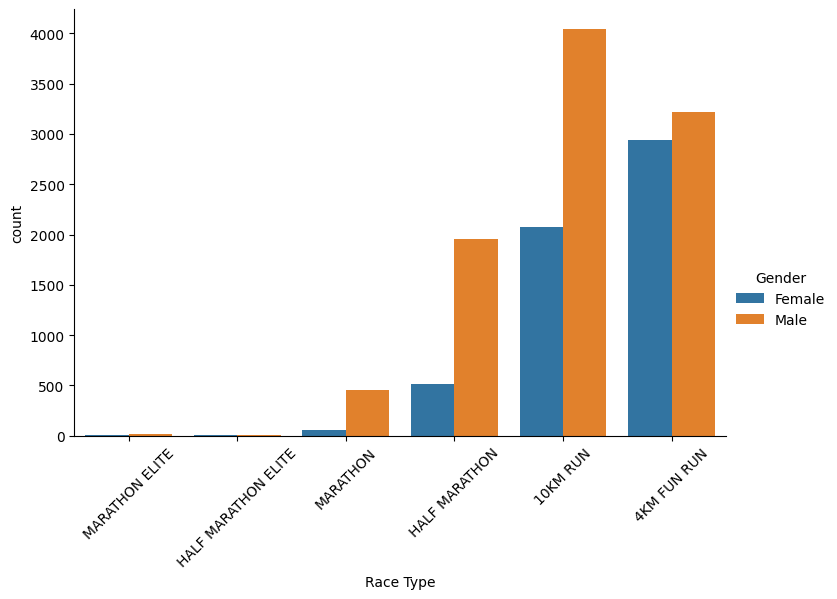

In [670]:
plt.figure(figsize=(18,12))
sns.catplot(
    data=marathon_df_2024,
    x="Race Type",       # Groups on x-axis
    hue="Gender",  # Categories to differentiate bars
    kind="count",    # Use count to calculate frequencies
    height=5,        # Height of the figure
    aspect=1.5       # Aspect ratio
)
plt.xticks(rotation=45);

<Figure size 1800x1200 with 0 Axes>

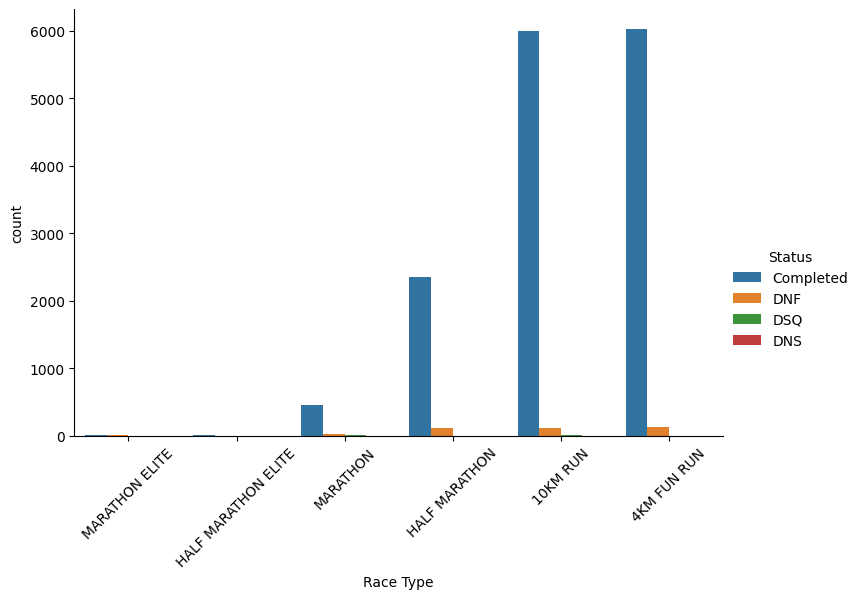

In [671]:
plt.figure(figsize=(18,12))
sns.catplot(
    data=marathon_df_2024,
    x="Race Type",       # Groups on x-axis
    hue="Status",  # Categories to differentiate bars
    kind="count",    # Use count to calculate frequencies
    height=5,        # Height of the figure
    aspect=1.5       # Aspect ratio
)
plt.xticks(rotation=45);

In [672]:
top_nat_counts = marathon_df_2024["Nationality Flag"].value_counts().head(10)
top_nat_counts

Nationality Flag
SA          8927
PH           841
IN           781
Unknown!     640
EG           534
PK           351
GB           334
JO           306
LB           280
ZA           232
Name: count, dtype: int64

In [673]:
type(top_nat_counts)

pandas.core.series.Series

In [674]:
marathon_df_2024.shape

(15297, 14)

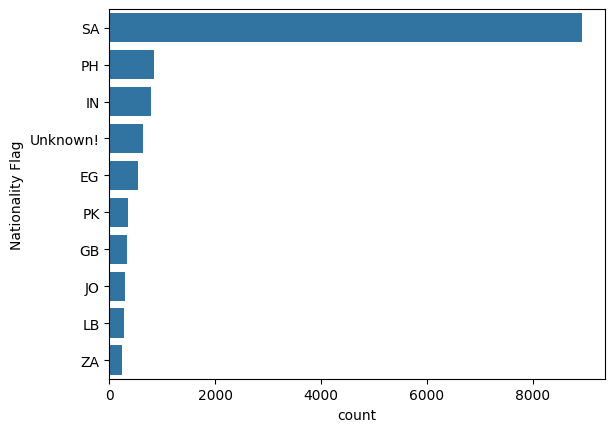

In [675]:
sns.barplot(y="Nationality Flag",
            x="count",
            data=top_nat_counts.to_frame());

##### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

In [676]:
marathon_df_2024.head(2)

Race Type  Gender  Bib                                  Name  \
0  MARATHON ELITE  Female   51  00ae6b0d-017d-4497-803f-92378d801c62   
1  MARATHON ELITE  Female   59  81b83bbc-7e22-4219-a351-5b1ed8b19609   

  Nationality Flag               Gun Time  Rank  Gender Rank  \
0               ET 0 days 02:27:19.582000    10            1   
1               ET 0 days 02:27:48.422000    11            2   

               Chip Time  Speed (Km/Hr)  Pace (min/km)     Status  Rank_total  \
0 0 days 02:27:19.582000           17.1           3.48  Completed          18   
1 0 days 02:27:48.022000           17.1           3.50  Completed          18   

   Gender Rank_total  
0                  9  
1                  9

In [681]:
print(temp.shape)
temp = marathon_df_2024[marathon_df_2024['Speed (Km/Hr)']<15]
temp.shape

(15297, 14)


(15199, 14)

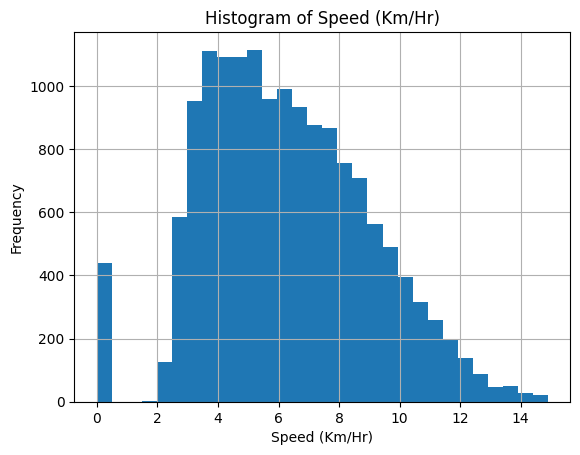

In [682]:
#plt.figure(figsize=(18,12))
plt.hist(temp['Speed (Km/Hr)'],
         #,facecolor = 'b', edgecolor = 'red',
          bins = 30
        ) # bins = 6 means 6 bars
plt.xlabel('Speed (Km/Hr)')
plt.ylabel('Frequency')
plt.grid()
plt.title(f'Histogram of Speed (Km/Hr)')
plt.show()

In [683]:
marathon_df_2022['Race Type'].value_counts()

Race Type
10KM RUN               2381
4KM FUN RUN            2277
HALF MARATHON          1176
MARATHON                557
MARATHON ELITE           22
HALF MARATHON ELITE       6
Name: count, dtype: int64

In [ ]:
## Note: The insights would be taking for each race individually 
# marathon_2022_4KM_df = marathon_df_2022[marathon_df_2022["Race Type"]=='4KM FUN RUN']
# marathon_2022_10KM_df = marathon_df_2022[marathon_df_2022["Race Type"]=='10KM RUN']
# marathon_2022_21KM_df = marathon_df_2022[marathon_df_2022["Race Type"]=='HALF MARATHON']
# marathon_2022_21KM_e_df = marathon_df_2022[marathon_df_2022["Race Type"]=='HALF MARATHON ELITE']
# marathon_2022_42KM_df = marathon_df_2022[marathon_df_2022["Race Type"]=='MARATHON']
# marathon_2022_42KM_e_df = marathon_df_2022[marathon_df_2022["Race Type"]=='MARATHON ELITE']

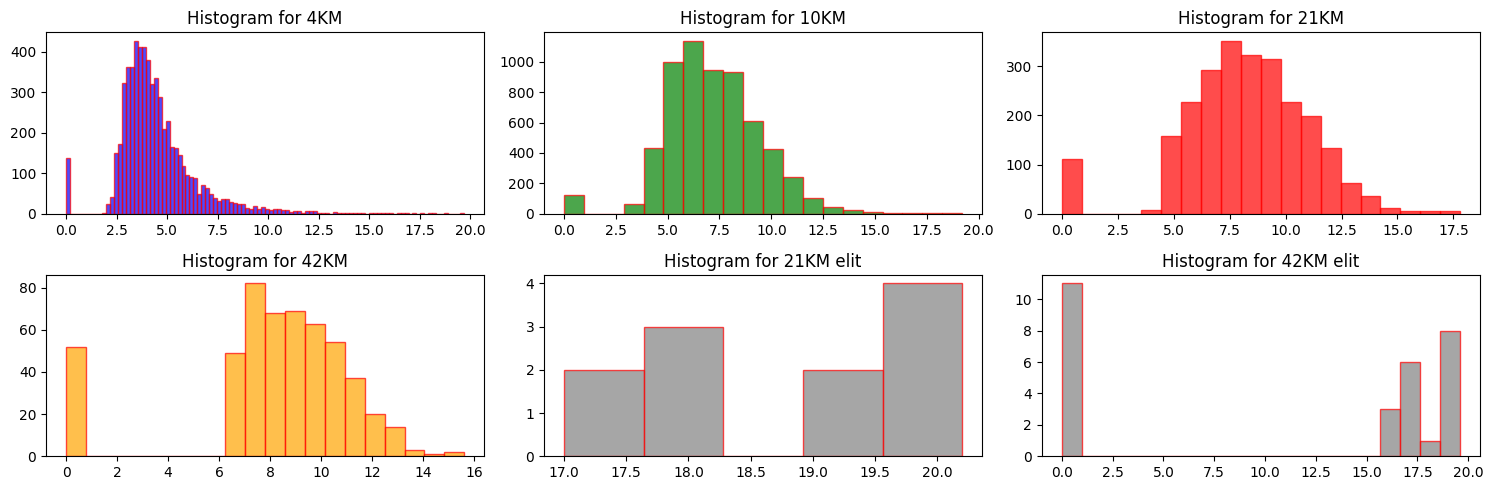

In [684]:
# Create a figure and an array of axes with a subplot for each histogram
fig, axes = plt.subplots(2, 3, figsize=(15, 5))

# Plot a histogram for each dataset using plt.hist
temp_df = marathon_df_2024[marathon_df_2024["Race Type"]=='4KM FUN RUN']
axes[0][0].hist(temp_df['Speed (Km/Hr)'],edgecolor = 'red', bins=100, alpha=0.7, color='blue')
axes[0][0].set_title('Histogram for 4KM')


temp_df = marathon_df_2024[marathon_df_2024["Race Type"]=='10KM RUN']
axes[0][1].hist(temp_df['Speed (Km/Hr)'], edgecolor = 'red', bins=20, alpha=0.7, color='green')
axes[0][1].set_title('Histogram for 10KM')

temp_df = marathon_df_2024[marathon_df_2024["Race Type"]=='HALF MARATHON']
axes[0][2].hist(temp_df['Speed (Km/Hr)'], edgecolor = 'red', bins=20, alpha=0.7, color='red')
axes[0][2].set_title('Histogram for 21KM')

temp_df = marathon_df_2024[marathon_df_2024["Race Type"]=='MARATHON']
axes[1][0].hist(temp_df['Speed (Km/Hr)'], edgecolor = 'red', bins=20, alpha=0.7, color='orange')
axes[1][0].set_title('Histogram for 42KM')

temp_df = marathon_df_2024[marathon_df_2024["Race Type"]=='HALF MARATHON ELITE']
axes[1][1].hist(temp_df['Speed (Km/Hr)'],edgecolor = 'red', bins=5, alpha=0.7, color='grey')
axes[1][1].set_title('Histogram for 21KM elit')

temp_df = marathon_df_2024[marathon_df_2024["Race Type"]=='MARATHON ELITE']
axes[1][2].hist(temp_df['Speed (Km/Hr)'],edgecolor = 'red', bins=20, alpha=0.7, color='grey')
axes[1][2].set_title('Histogram for 42KM elit')

# Display the plots
plt.tight_layout()
plt.show()

<Axes: xlabel='Speed (Km/Hr)', ylabel='Count'>

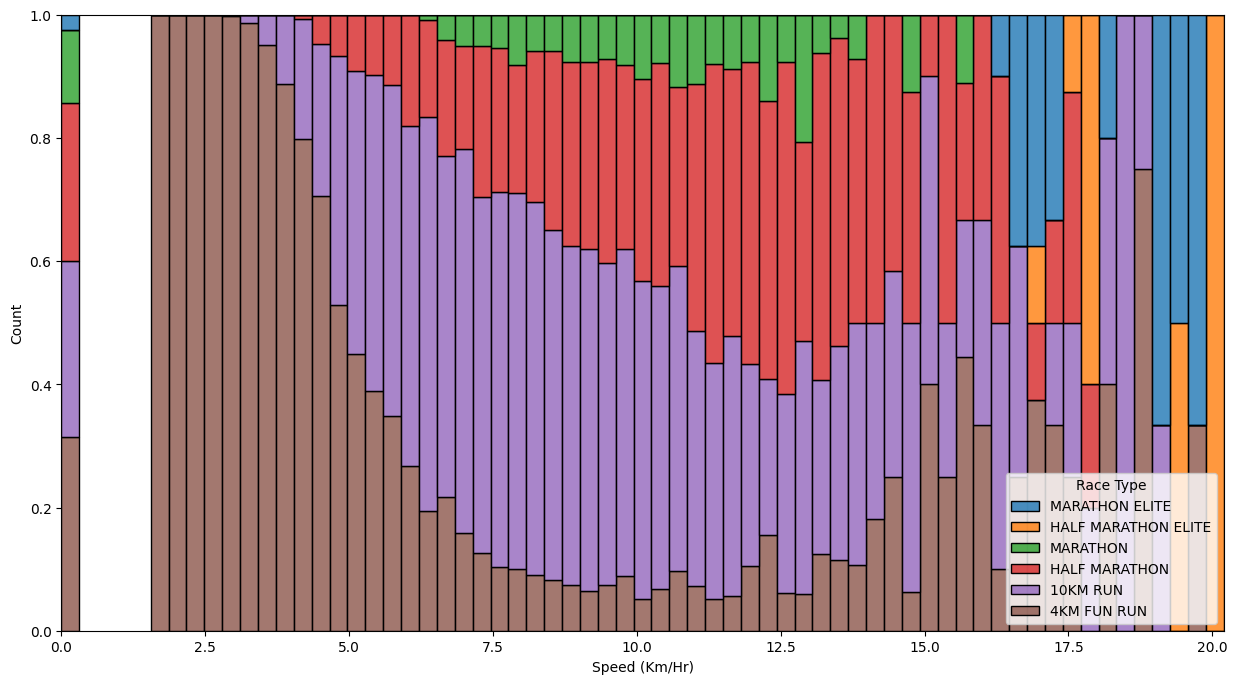

In [685]:
# Stacked Histogram separated by origin
plt.figure(figsize=(15,8))
sns.histplot(
    marathon_df_2024,
    x="Speed (Km/Hr)",
    hue="Race Type", # color of plot elements
    multiple="fill", # also can be layer or dodge or fill
    alpha=0.8)
#{"layer", "dodge", "stack", "fill"}

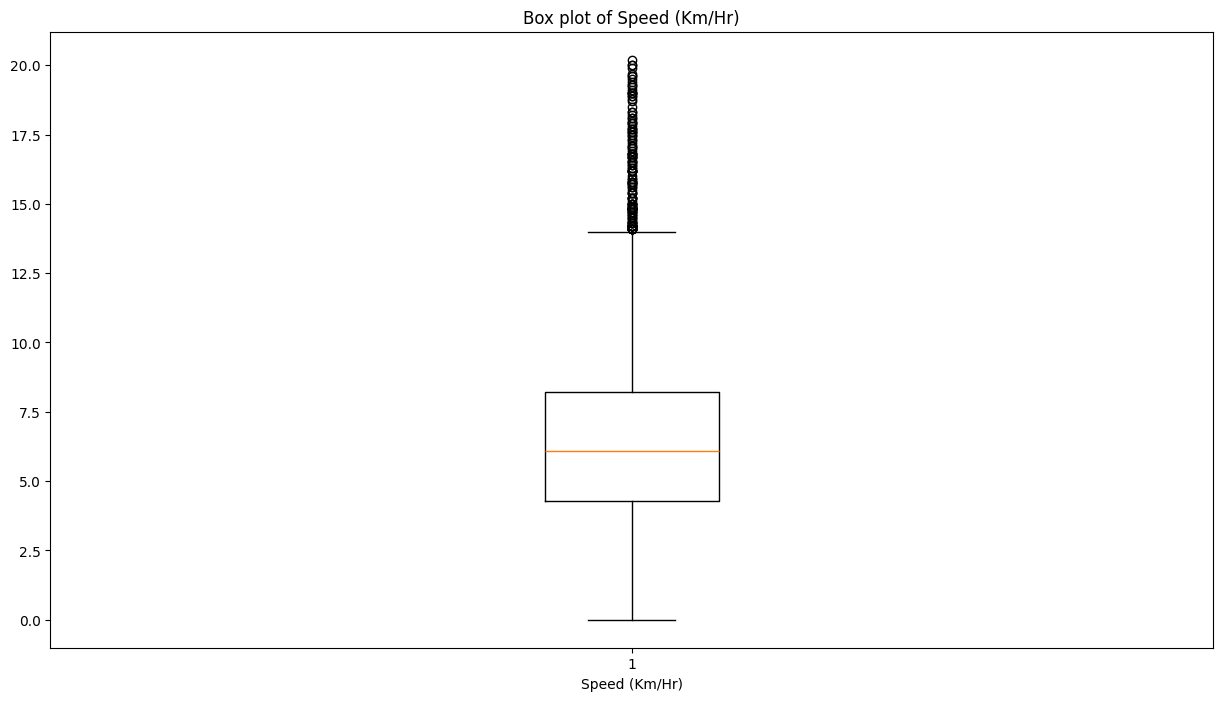

In [687]:
plt.figure(figsize=(15,8))
plt.boxplot(marathon_df_2024['Speed (Km/Hr)'])
plt.xlabel('Speed (Km/Hr)')

plt.title(f'Box plot of Speed (Km/Hr)')
plt.show()

<Axes: ylabel='Speed (Km/Hr)'>

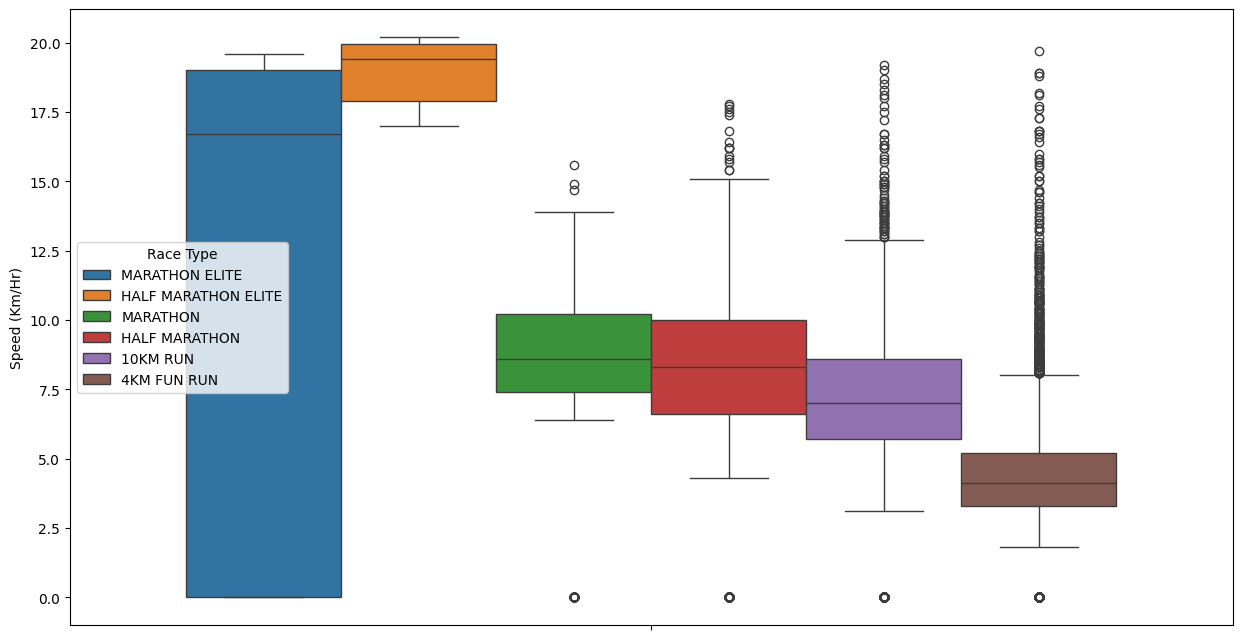

In [688]:
plt.figure(figsize=(15,8))

sns.boxplot(
    marathon_df_2024,
    y="Speed (Km/Hr)",
    hue="Race Type")

<Axes: xlabel='Pace (min/km)', ylabel='Count'>

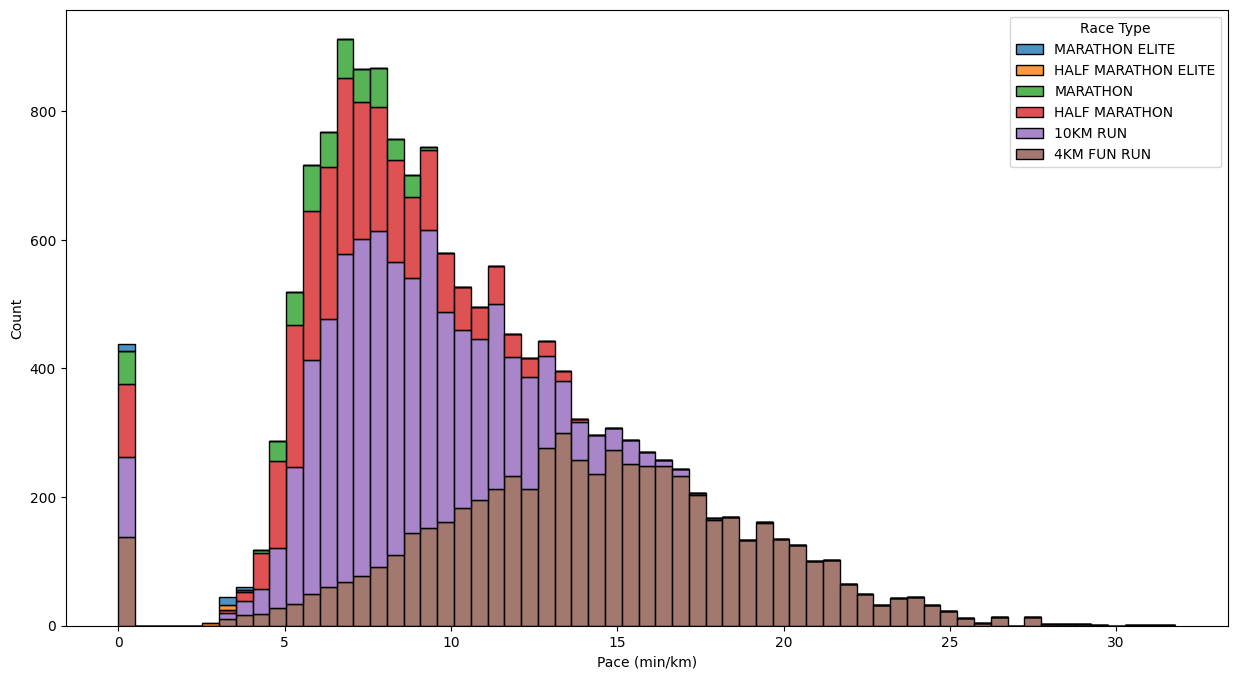

In [690]:
plt.figure(figsize=(15,8))
sns.histplot(
    marathon_df_2024,
    x="Pace (min/km)",
    hue="Race Type", # color of plot elements
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8)
#

<Axes: ylabel='Pace (min/km)'>

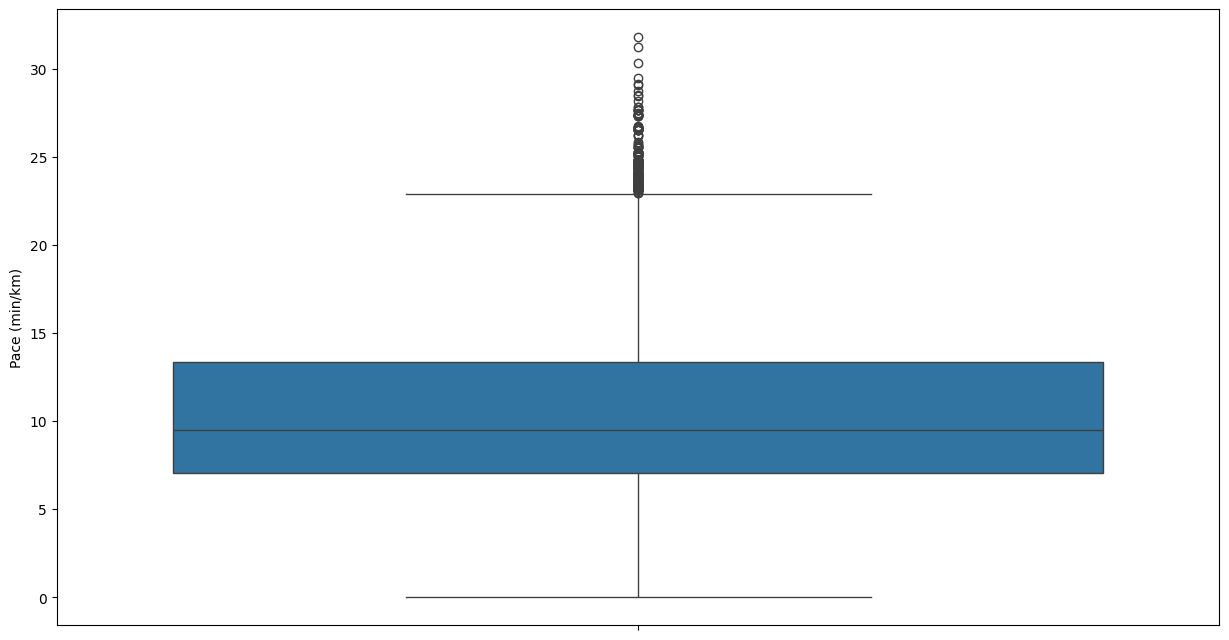

In [691]:
plt.figure(figsize=(15,8))

sns.boxplot(
    marathon_df_2024,
    y="Pace (min/km)",
    #hue="Race Type"
)

In [692]:
marathon_df_2024.head(2)

Race Type  Gender  Bib                                  Name  \
0  MARATHON ELITE  Female   51  00ae6b0d-017d-4497-803f-92378d801c62   
1  MARATHON ELITE  Female   59  81b83bbc-7e22-4219-a351-5b1ed8b19609   

  Nationality Flag               Gun Time  Rank  Gender Rank  \
0               ET 0 days 02:27:19.582000    10            1   
1               ET 0 days 02:27:48.422000    11            2   

               Chip Time  Speed (Km/Hr)  Pace (min/km)     Status  Rank_total  \
0 0 days 02:27:19.582000           17.1           3.48  Completed          18   
1 0 days 02:27:48.022000           17.1           3.50  Completed          18   

   Gender Rank_total  
0                  9  
1                  9

In [693]:
# called feature engineering
marathon_df_2024['Chip Time duration-min'] = marathon_df_2024['Chip Time'].dt.total_seconds()/60
marathon_df_2024['Chip Time duration-min'] = marathon_df_2024['Chip Time duration-min'].apply(lambda x: np.round(x, 2))
marathon_df_2024['Gun Time duration-min'] = marathon_df_2024['Gun Time'].dt.total_seconds()/60
marathon_df_2024['Gun Time duration-min'] = marathon_df_2024['Gun Time duration-min'].apply(lambda x: np.round(x, 2))

In [694]:
marathon_df_2024.head(2)

Race Type  Gender  Bib                                  Name  \
0  MARATHON ELITE  Female   51  00ae6b0d-017d-4497-803f-92378d801c62   
1  MARATHON ELITE  Female   59  81b83bbc-7e22-4219-a351-5b1ed8b19609   

  Nationality Flag               Gun Time  Rank  Gender Rank  \
0               ET 0 days 02:27:19.582000    10            1   
1               ET 0 days 02:27:48.422000    11            2   

               Chip Time  Speed (Km/Hr)  Pace (min/km)     Status  Rank_total  \
0 0 days 02:27:19.582000           17.1           3.48  Completed          18   
1 0 days 02:27:48.022000           17.1           3.50  Completed          18   

   Gender Rank_total  Chip Time duration-min  Gun Time duration-min  
0                  9                  147.33                 147.33  
1                  9                  147.80                 147.81

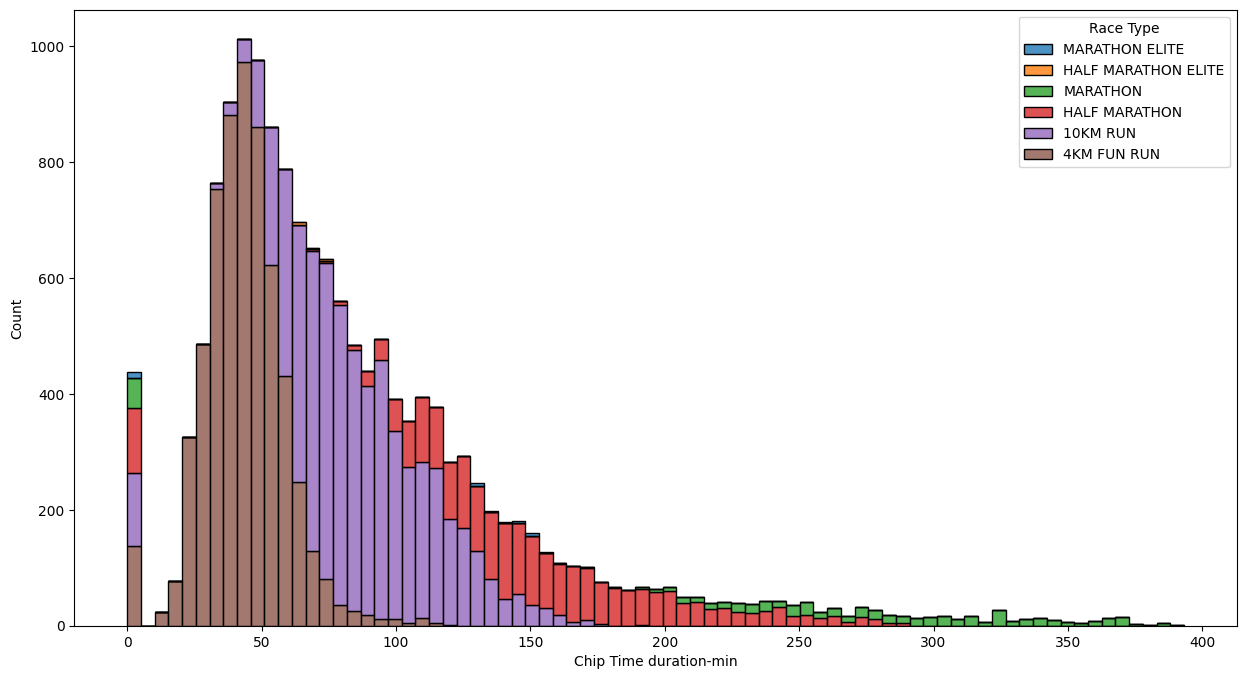

In [696]:
plt.figure(figsize=(15,8))
sns.histplot(
    marathon_df_2024,
    x='Chip Time duration-min',
    hue="Race Type", # color of plot elements
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8);

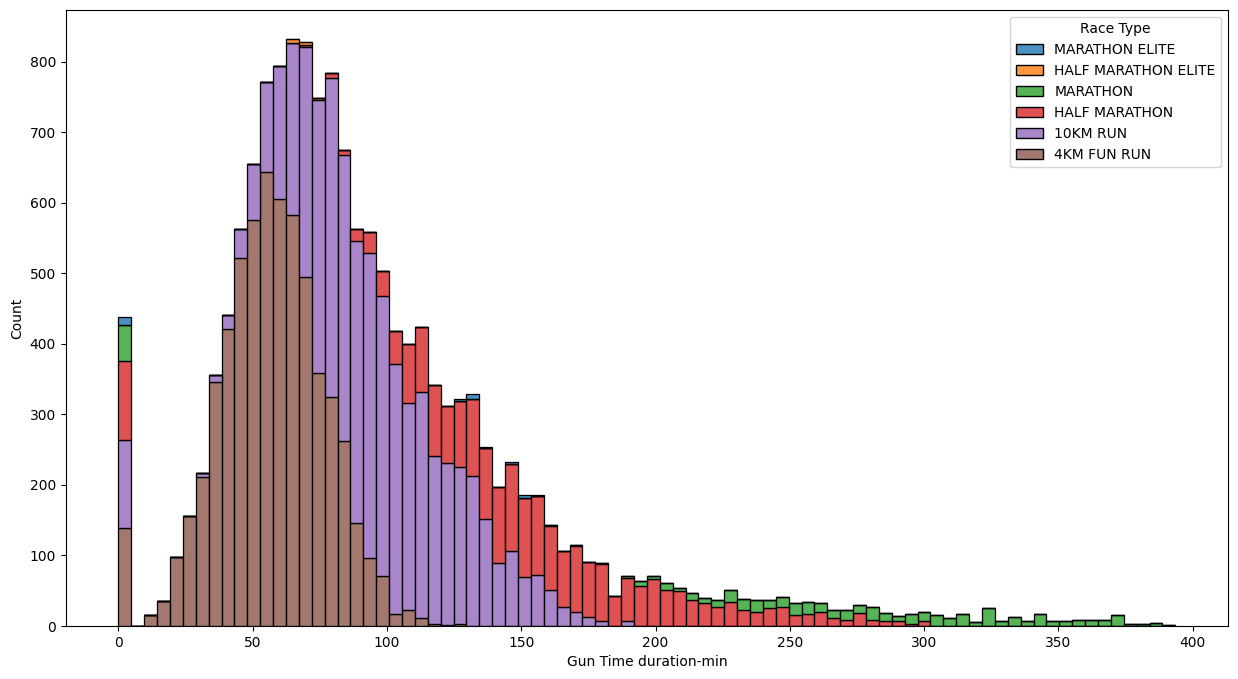

In [697]:
plt.figure(figsize=(15,8))
sns.histplot(
    marathon_df_2024,
    x='Gun Time duration-min',
    hue="Race Type", # color of plot elements
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8);

In [698]:
marathon_df_2024.head(2)

Race Type  Gender  Bib                                  Name  \
0  MARATHON ELITE  Female   51  00ae6b0d-017d-4497-803f-92378d801c62   
1  MARATHON ELITE  Female   59  81b83bbc-7e22-4219-a351-5b1ed8b19609   

  Nationality Flag               Gun Time  Rank  Gender Rank  \
0               ET 0 days 02:27:19.582000    10            1   
1               ET 0 days 02:27:48.422000    11            2   

               Chip Time  Speed (Km/Hr)  Pace (min/km)     Status  Rank_total  \
0 0 days 02:27:19.582000           17.1           3.48  Completed          18   
1 0 days 02:27:48.022000           17.1           3.50  Completed          18   

   Gender Rank_total  Chip Time duration-min  Gun Time duration-min  
0                  9                  147.33                 147.33  
1                  9                  147.80                 147.81

<Axes: ylabel='Chip Time duration-min'>

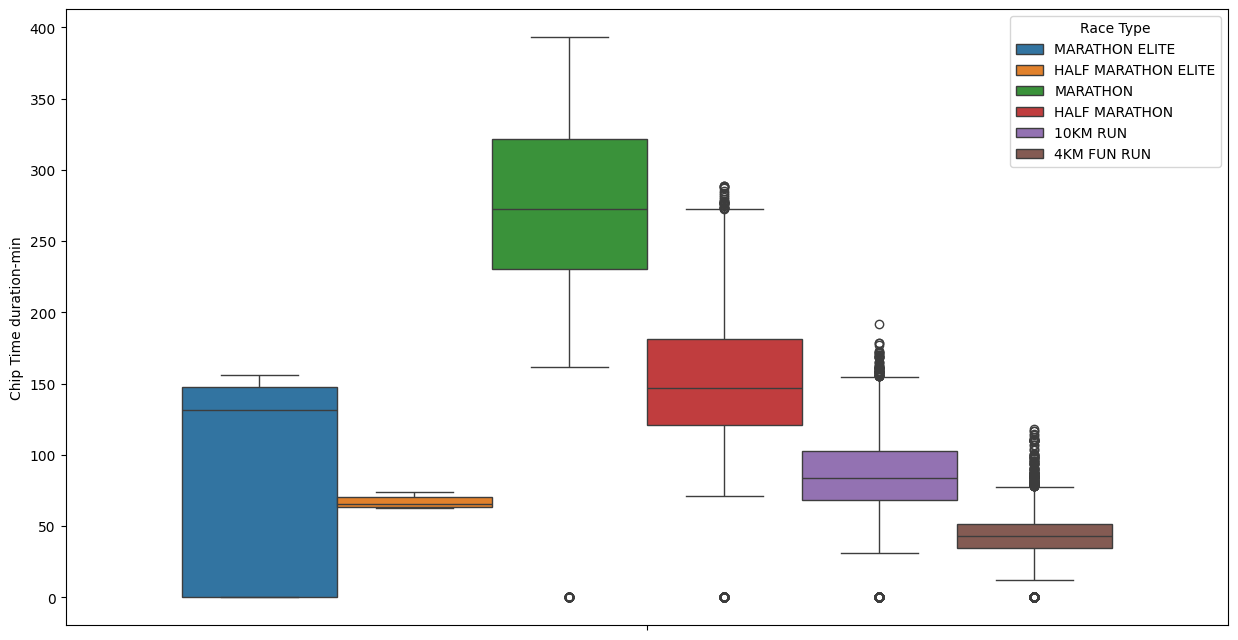

In [699]:
plt.figure(figsize=(15,8))

sns.boxplot(
    marathon_df_2024,
    y='Chip Time duration-min',
    hue="Race Type")

In [700]:
marathon_df_2024.head(2)

Race Type  Gender  Bib                                  Name  \
0  MARATHON ELITE  Female   51  00ae6b0d-017d-4497-803f-92378d801c62   
1  MARATHON ELITE  Female   59  81b83bbc-7e22-4219-a351-5b1ed8b19609   

  Nationality Flag               Gun Time  Rank  Gender Rank  \
0               ET 0 days 02:27:19.582000    10            1   
1               ET 0 days 02:27:48.422000    11            2   

               Chip Time  Speed (Km/Hr)  Pace (min/km)     Status  Rank_total  \
0 0 days 02:27:19.582000           17.1           3.48  Completed          18   
1 0 days 02:27:48.022000           17.1           3.50  Completed          18   

   Gender Rank_total  Chip Time duration-min  Gun Time duration-min  
0                  9                  147.33                 147.33  
1                  9                  147.80                 147.81

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [704]:
marathon_df_2022.describe().T

count                       mean  \
Bib                     6419.0                7398.201589   
Gun Time                  6419  0 days 01:37:50.939050163   
Rank                    6419.0                 907.085839   
Gender Rank             6419.0                 499.193177   
Chip Time                 6419  0 days 01:31:12.571497585   
Speed (Km/Hr)           6419.0                   7.617028   
Pace (min/km)           6419.0                   8.295393   
Distance Covered (Km)   6419.0                  12.576133   
Rank_total              6419.0                1813.229008   
Gender Rank_total       6419.0                 997.443683   
Chip Time duration-min  6419.0                  91.209509   
Gun Time duration-min   6419.0                  97.849012   

                                              std              min  \
Bib                                   4002.726108              1.0   
Gun Time                0 days 01:14:03.685357368  0 days 00:00:00   
Rank                                    674.88258              0.0   
Gender Rank                            384.010491              0.0   
Chip Time               0 days 01:08:58.437854035  0 days 00:00:00   
Speed (Km/Hr)                            2.983049              0.0   
Pace (min/km)                             3.23275              0.0   
Distance Covered (Km)                   10.750557              0.0   
Rank_total                             737.675949              0.0   
Gender Rank_total                      439.936757              0.0   
Chip Time duration-min                  68.973904              0.0   
Gun Time duration-min                   74.061381              0.0   

                                           25%                     50%  \
Bib                                     3664.5                  7308.0   
Gun Time                0 days 00:46:04.369000  0 days 01:14:22.379000   
Rank                                     304.0                   815.0   
Gender Rank                              167.0                   445.0   
Chip Time               0 days 00:43:30.471000  0 days 01:10:48.160000   
Speed (Km/Hr)                              5.7                     7.4   
Pace (min/km)                             6.28                     7.9   
Distance Covered (Km)                      4.0                    10.0   
Rank_total                              1134.0                  2226.0   
Gender Rank_total                        762.0                  1040.0   
Chip Time duration-min                   43.51                    70.8   
Gun Time duration-min                    46.07                   74.37   

                                           75%                     max  
Bib                                    11142.5                 14400.0  
Gun Time                0 days 02:07:51.076000  0 days 06:50:12.067000  
Rank                                    1457.5                  2293.0  
Gender Rank                              766.5                  1531.0  
Chip Time               0 days 01:55:56.043000  0 days 06:38:17.377000  
Speed (Km/Hr)                              9.2                    33.1  
Pace (min/km)                             10.1                   27.93  
Distance Covered (Km)                     21.1                    42.2  
Rank_total                              2293.0                  2293.0  
Gender Rank_total                       1186.0                  1531.0  
Chip Time duration-min                 115.935                  398.29  
Gun Time duration-min                   127.85                   410.2

In [705]:
marathon_df_2023.describe().T

count                       mean  \
Bib                     11371.0               15073.563979   
Rank                    11371.0                1050.248703   
Gun Time                  11371  0 days 01:31:18.940110808   
Chip Time                 11371  0 days 01:26:03.543048104   
Pace min/km             11371.0                   9.365027   
Speed Km/hr             11371.0                    7.08687   
Chip Time duration-min  11371.0                  86.059076   
Gun Time duration-min   11371.0                  91.315691   

                                              std              min  \
Bib                                   7580.794108              1.0   
Rank                                    773.33443              0.0   
Gun Time                0 days 00:58:22.099322664  0 days 00:00:00   
Chip Time               0 days 00:58:58.422305631  0 days 00:00:00   
Pace min/km                              3.005987             2.92   
Speed Km/hr                              2.353911              2.2   
Chip Time duration-min                  58.973716              0.0   
Gun Time duration-min                   58.368267              0.0   

                                    25%              50%  \
Bib                             10705.0          14529.0   
Rank                              378.0            947.0   
Gun Time                0 days 00:51:05  0 days 01:17:12   
Chip Time               0 days 00:45:17  0 days 01:09:24   
Pace min/km                         7.1             8.92   
Speed Km/hr                         5.4              6.7   
Chip Time duration-min            45.28             69.4   
Gun Time duration-min             51.08             77.2   

                                           75%              max  
Bib                                    22291.5          26244.0  
Rank                                    1575.0           3071.0  
Gun Time                0 days 01:56:49.500000  0 days 06:18:43  
Chip Time                      0 days 01:49:30  0 days 06:18:39  
Pace min/km                               11.2            27.32  
Speed Km/hr                                8.4             20.5  
Chip Time duration-min                   109.5           378.65  
Gun Time duration-min                  116.825           378.72

In [706]:
marathon_df_2024.describe().T

count                       mean  \
Bib                     15297.0                16682.11231   
Gun Time                  15297  0 days 01:34:53.937185461   
Rank                    15297.0                2546.553246   
Gender Rank             15297.0                1369.390076   
Chip Time                 15297  0 days 01:24:49.190894162   
Speed (Km/Hr)           15297.0                   6.329725   
Pace (min/km)           15297.0                  10.494883   
Rank_total              15297.0                5092.135125   
Gender Rank_total       15297.0                2737.808786   
Chip Time duration-min  15297.0                  84.819831   
Gun Time duration-min   15297.0                  94.898917   

                                              std              min  \
Bib                                   7474.143758              1.0   
Gun Time                0 days 00:58:08.612524620  0 days 00:00:00   
Rank                                  1800.818367              0.0   
Gender Rank                           1003.079355              0.0   
Chip Time               0 days 00:59:34.832519820  0 days 00:00:00   
Speed (Km/Hr)                            2.859638              0.0   
Pace (min/km)                            4.868166              0.0   
Rank_total                            1801.593197              0.0   
Gender Rank_total                     1069.750185              0.0   
Chip Time duration-min                  59.580578              0.0   
Gun Time duration-min                   58.143529              0.0   

                                           25%                     50%  \
Bib                                    11067.0                 16316.0   
Gun Time                0 days 00:58:11.962000  0 days 01:21:04.899000   
Rank                                     966.0                  2240.0   
Gender Rank                              483.0                  1247.0   
Chip Time               0 days 00:44:48.170000  0 days 01:08:44.698000   
Speed (Km/Hr)                              4.3                     6.1   
Pace (min/km)                             7.03                    9.48   
Rank_total                              5993.0                  5993.0   
Gender Rank_total                       2032.0                  2857.0   
Chip Time duration-min                    44.8                   68.74   
Gun Time duration-min                     58.2                   81.08   

                                           75%                     max  
Bib                                    23606.0                 29000.0  
Gun Time                0 days 01:58:00.111000  0 days 06:33:31.988000  
Rank                                    4093.0                  6017.0  
Gender Rank                             2052.0                  3961.0  
Chip Time               0 days 01:48:53.290000  0 days 06:33:12.698000  
Speed (Km/Hr)                              8.2                    20.2  
Pace (min/km)                            13.37                   31.78  
Rank_total                              6017.0                  6017.0  
Gender Rank_total                       3961.0                  3961.0  
Chip Time duration-min                  108.89                  393.21  
Gun Time duration-min                    118.0                  393.53

In [707]:
# describe(include=’all’) provides a statistics summary of all data, include object, category etc
marathon_df_2022.describe(include='object').T

count unique                                   top  freq
Race Type         6419      6                              10KM RUN  2381
Gender            6419      2                                  Male  4229
Name              6419   6419  91fc9155-bcbf-4ea9-b2e3-e52f43b7d74b     1
Nationality Flag  6419     86                                    SA  3453
Status            6419      4                             Completed  6051

In [708]:
marathon_df_2023.describe(include='object').T

count unique                                   top   freq
Race Type         11371      6                                  4 km   4498
Gender            11371      2                                  Male   7419
Name              11371  11371  0cefd5b0-94be-40ee-85c5-7b0868e17dcc      1
Nationality Flag  11371    104                                    sa   6693
Nationality Code  11371    104                                   KSA   6693
Status            11371      4                             Completed  11123

In [709]:
marathon_df_2024.describe(include='object').T

count unique                                   top   freq
Race Type         15297      6                           4KM FUN RUN   6155
Gender            15297      2                                  Male   9686
Name              15297  15297  00ae6b0d-017d-4497-803f-92378d801c62      1
Nationality Flag  15297    109                                    SA   8927
Status            15297      4                             Completed  14859

In [715]:
print("Average mins needed to run 1 kilo in",
      "2022:",marathon_df_2022['Pace (min/km)'].mean(),
      "2023:", marathon_df_2023['Pace min/km'].mean(),
      "2024:", marathon_df_2024['Pace (min/km)'].mean())
print("The average distance by which the runners' pace deviates from the mean in",
      "2022:", marathon_df_2022['Pace (min/km)'].std(),
      "2023:", marathon_df_2023['Pace min/km'].std(), 
      "2024:", marathon_df_2024['Pace (min/km)'].std())

Average mins needed to run 1 kilo in 2022: 8.29539336345225 2023: 9.365026822618942 2024: 10.494883310453028
The average distance by which the runners' pace deviates from the mean in 2022: 3.2327497487836445 2023: 3.00598697628037 2024: 4.868166462395292


In [ ]:
print(np.mean(marathon_df_2022['Pace (min/km)']))
print(np.std(marathon_df_2022['Pace (min/km)']))

In [717]:
np.quantile(marathon_df_2022['Pace (min/km)'],0.80), np.quantile(marathon_df_2023['Pace min/km'],0.80), np.quantile(marathon_df_2024['Pace (min/km)'],0.80)

(10.674000000000005, 11.8, 14.55)

In [718]:
marathon_df_2022['Pace (min/km)'].quantile(0.25), marathon_df_2023['Pace min/km'].quantile(0.25), marathon_df_2024['Pace (min/km)'].quantile(0.25)

(6.28, 7.1, 7.03)

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

In [ ]:
# above is example of negative correlation

In [ ]:
marathon_df_2022.head(2)

In [ ]:
sns.boxplot(
    marathon_df_2022,
    y="Speed (Km/Hr)",
    hue="Race Type")

In [ ]:
sns.boxplot(
    marathon_df_2022,
    y='Pace (min/km)',
    hue="Race Type")

In [ ]:
# Create a scatter plot
sns.scatterplot(y='Pace (min/km)', x='Speed (Km/Hr)',
                #hue='Race Type',
                data=marathon_df_2022)



# Show the plot
plt.show()

In [ ]:
#Create a correlation matrix to show relationship between select variables
corr_matrix = marathon_df_2022.corr()
corr_matrix

In [ ]:
corr_matrix = marathon_df_2022.select_dtypes(include=np.number).corr()
corr_matrix

In [ ]:
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot=True, 
            cmap='coolwarm',
            fmt=".1f"
           )

# Show the plot
plt.show()

In [ ]:
marathon_df_2022.columns

In [ ]:
# Q1

In [ ]:
# counts_gender = marathon_df_2022['Gender'].value_counts()
counts_gender

In [ ]:
plt.pie(counts_gender,
        labels=counts_gender.index,
        normalize=True,
        autopct="%.2f",
        # textprops = {'color':'white'},
        # color=['red', 'blue']
       )
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'Race Type', hue = 'Gender', data = marathon_df_2022);

In [ ]:
df_category_pro = marathon_df_2022['Race Type'].value_counts().reset_index()
df_category_pro.columns = ['Race Type', 'total_count']
df_category_pro

In [ ]:
df_gender_track_pro = marathon_df_2022[['Race Type','Gender']].value_counts().reset_index()
df_gender_track_pro

In [ ]:
final_prop = df_gender_track_pro.merge(df_category_pro, on='Race Type')
final_prop['percentage'] = final_prop[['count', 'total_count']].apply(lambda x: round((x[0]/x[1])*100,2), axis=1)
final_prop

In [ ]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=final_prop,
                       x='Race Type',
                       y='percentage',
                       hue='Gender')
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f') + '%', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

plt.title('Percentage Distribution of Gender by Category')
plt.ylabel('Percentage (%)')
plt.xlabel('Race Type')
plt.xticks(rotation=45)
plt.show()

In [ ]:
top_runner_df = marathon_df_2022[marathon_df_2022['Rank'].apply(lambda x: True if x in range(1, 11) else False)]
top_runner_df 

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'Race Type', hue = 'Gender', data = top_runner_df);

In [ ]:
#Q:2

In [ ]:
marathon_df_2022.head(2)

In [ ]:
plt.figure(figsize=(15,8))

sns.boxplot(
    marathon_df_2022,
    y='Chip Time',
    hue="Race Type")

In [ ]:
fastest_time = marathon_df_2022.groupby('Race Type')['Chip Time'].min()
fastest_time

In [ ]:
plt.bar(fastest_time.index,
        fastest_time.values
       )
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Q3

In [ ]:
top_nat_counts

In [ ]:
top_nat_counts_per = (top_nat_counts / marathon_df_2022.shape[0])*100
top_nat_counts_per

In [ ]:
sns.barplot(y="Nationality", x="count",data=top_nat_counts_per.to_frame());
plt.grid()

In [ ]:
(marathon_df_2022[marathon_df_2022["Nationality"]!= 'SA'].shape[0]/ marathon_df_2022.shape[0])*100